# Wasserstein Generative Adversarial Network (WGAN)

Modified from code at: https://machinelearningmastery.com/how-to-code-a-wasserstein-generative-adversarial-network-wgan-from-scratch/

In [1]:
from keras.datasets import fashion_mnist
import numpy as np
import pandas as pd

Using TensorFlow backend.


## Load Dataset
Define class labels

In [2]:
# classes dictionary
label_dict = {0: 'tshirt',
             1: 'trouser',
             2: 'pullover',
             3: 'dress',
             4: 'coat',
             5: 'sandal',
             6: 'shirt',
             7: 'sneaker',
             8: 'bag',
             9: 'boot'}

In [3]:
def load_fashion_minst_data():
    # load the data
    (x_train, y_train), (_, _) = fashion_mnist.load_data()

    # expand to 3d, e.g. add channels dimension
    x_train = np.expand_dims(x_train, axis=-1)
    
    # normalize our inputs to be in the range[-1, 1] 
    x_train = (x_train.astype(np.float32) - 127.5)/127.5

    return x_train, y_train

 
x_train, y_train = load_fashion_minst_data()
input_classes =pd.Series(y_train).nunique()
print("x_train shape: {}".format(x_train.shape))
print("y_train.shape:{}".format(y_train.shape))
print("Input classes:{}".format(input_classes))

x_train shape: (60000, 28, 28, 1)
y_train.shape:(60000,)
Input classes:10


## Define the model

In [4]:
%load_ext autoreload
%autoreload 2
from models.wgan import WGAN

In [5]:
X, y = load_fashion_minst_data()

print("Input shape:", X[0].shape)

fashion_wgan = WGAN(in_shape=X[0].shape, n_classes=10, latent_dim=100)

W0804 14:08:30.452483 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 14:08:30.453478 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 14:08:30.454450 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0804 14:08:30.469477 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0

Input shape: (28, 28, 1)


W0804 14:08:31.464747 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0804 14:08:31.567738 11992 deprecation_wrapper.py:119] From C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



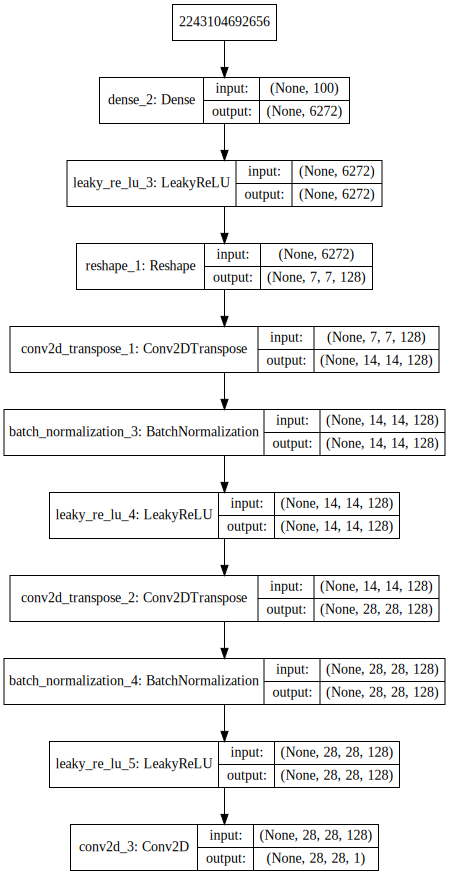

In [6]:
fashion_wgan.plot_generator()

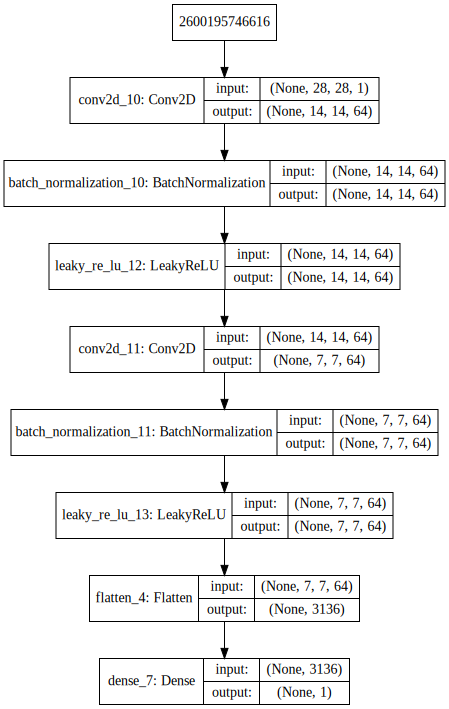

In [27]:
fashion_wgan.plot_discriminator()

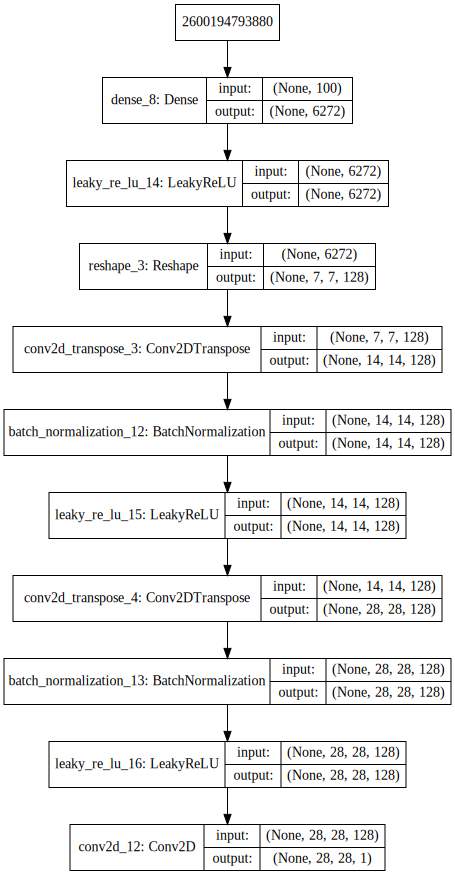

In [28]:
fashion_wgan.plot_gan()

## Train the model

C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 1/468, d1=-2.031, d2=0.072 g=-0.760
>1, 2/468, d1=-5.178, d2=1.874 g=-0.909
>1, 3/468, d1=-6.762, d2=1.829 g=-1.101


C:\applications\Miniconda3\envs\tf-gpu\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, 4/468, d1=-7.852, d2=1.669 g=-1.426
>1, 5/468, d1=-8.953, d2=1.785 g=-1.741
>1, 6/468, d1=-9.514, d2=1.913 g=-2.223
>1, 7/468, d1=-10.185, d2=2.503 g=-2.799
>1, 8/468, d1=-10.624, d2=2.549 g=-3.256
>1, 9/468, d1=-11.190, d2=2.578 g=-3.489
>1, 10/468, d1=-11.690, d2=2.667 g=-3.690
>1, 11/468, d1=-11.809, d2=2.761 g=-4.161
>1, 12/468, d1=-12.414, d2=3.069 g=-4.641
>1, 13/468, d1=-12.927, d2=3.366 g=-5.064
>1, 14/468, d1=-12.824, d2=3.630 g=-5.229
>1, 15/468, d1=-13.105, d2=3.595 g=-5.268
>1, 16/468, d1=-13.457, d2=3.429 g=-5.025
>1, 17/468, d1=-13.322, d2=3.407 g=-4.356
>1, 18/468, d1=-13.468, d2=2.783 g=-3.407
>1, 19/468, d1=-13.912, d2=2.079 g=-2.140
>1, 20/468, d1=-13.879, d2=1.138 g=-0.367
>1, 21/468, d1=-13.955, d2=0.010 g=1.436
>1, 22/468, d1=-14.064, d2=-1.161 g=3.195
>1, 23/468, d1=-13.757, d2=-2.144 g=4.803
>1, 24/468, d1=-14.379, d2=-2.596 g=6.020
>1, 25/468, d1=-14.090, d2=-2.720 g=6.883
>1, 26/468, d1=-14.211, d2=-2.591 g=7.471
>1, 27/468, d1=-14.162, d2=-1.591 g=7.484
>1

>1, 192/468, d1=-46.377, d2=36.313 g=-33.998
>1, 193/468, d1=-43.702, d2=36.098 g=-32.793
>1, 194/468, d1=-44.015, d2=30.773 g=-34.882
>1, 195/468, d1=-40.010, d2=29.892 g=-34.356
>1, 196/468, d1=-42.009, d2=31.565 g=-35.443
>1, 197/468, d1=-41.285, d2=26.373 g=-33.310
>1, 198/468, d1=-39.009, d2=24.044 g=-32.355
>1, 199/468, d1=-37.535, d2=29.377 g=-29.230
>1, 200/468, d1=-35.280, d2=30.618 g=-27.348
>1, 201/468, d1=-33.838, d2=30.904 g=-25.065
>1, 202/468, d1=-36.534, d2=30.493 g=-25.594
>1, 203/468, d1=-36.776, d2=30.886 g=-23.733
>1, 204/468, d1=-36.816, d2=30.707 g=-24.140
>1, 205/468, d1=-38.351, d2=29.959 g=-23.952
>1, 206/468, d1=-38.931, d2=29.593 g=-23.799
>1, 207/468, d1=-38.939, d2=29.440 g=-23.686
>1, 208/468, d1=-38.513, d2=29.306 g=-22.739
>1, 209/468, d1=-37.898, d2=29.630 g=-24.042
>1, 210/468, d1=-37.421, d2=30.120 g=-23.828
>1, 211/468, d1=-38.435, d2=28.938 g=-23.485
>1, 212/468, d1=-38.301, d2=27.652 g=-22.452
>1, 213/468, d1=-35.925, d2=24.874 g=-20.791
>1, 214/46

>1, 378/468, d1=-26.554, d2=-15.768 g=36.774
>1, 379/468, d1=-28.991, d2=-24.159 g=35.855
>1, 380/468, d1=-25.947, d2=-12.071 g=31.322
>1, 381/468, d1=-35.621, d2=-17.071 g=35.353
>1, 382/468, d1=-29.770, d2=-19.453 g=35.011
>1, 383/468, d1=-33.547, d2=-16.489 g=31.064
>1, 384/468, d1=-24.121, d2=-31.345 g=41.038
>1, 385/468, d1=-31.200, d2=-13.309 g=26.200
>1, 386/468, d1=-32.419, d2=-17.855 g=30.331
>1, 387/468, d1=-29.777, d2=-24.427 g=41.780
>1, 388/468, d1=-31.639, d2=-14.720 g=28.461
>1, 389/468, d1=-29.171, d2=-35.160 g=38.912
>1, 390/468, d1=-30.136, d2=-17.049 g=33.649
>1, 391/468, d1=-31.494, d2=-10.886 g=27.931
>1, 392/468, d1=-31.375, d2=-15.942 g=24.246
>1, 393/468, d1=-21.931, d2=-28.883 g=31.161
>1, 394/468, d1=-25.310, d2=-14.658 g=21.927
>1, 395/468, d1=-22.312, d2=-18.384 g=24.330
>1, 396/468, d1=-22.122, d2=-31.733 g=26.765
>1, 397/468, d1=-26.237, d2=-12.143 g=15.734
>1, 398/468, d1=-25.540, d2=-12.335 g=9.803
>1, 399/468, d1=-22.190, d2=-18.187 g=11.319
>1, 400/468

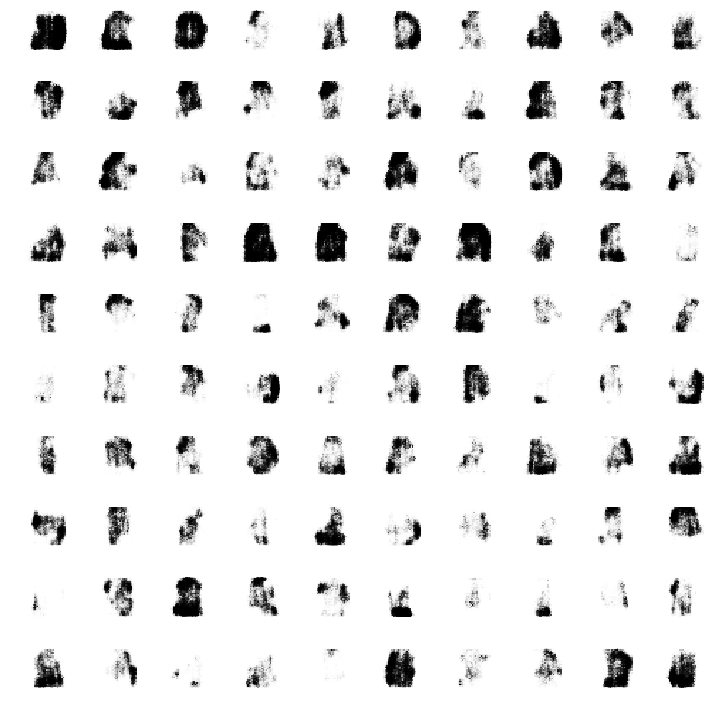

>Saved: wgan_generated_plot_0001.png and wgan_model_0001.h5
>2, 1/468, d1=-40.275, d2=-39.758 g=45.054
>2, 2/468, d1=-42.095, d2=-29.376 g=40.044
>2, 3/468, d1=-40.376, d2=-35.130 g=49.937
>2, 4/468, d1=-36.217, d2=-45.290 g=49.259
>2, 5/468, d1=-43.237, d2=-29.144 g=42.280
>2, 6/468, d1=-42.706, d2=-45.387 g=52.402
>2, 7/468, d1=-42.414, d2=-34.852 g=49.849
>2, 8/468, d1=-44.260, d2=-34.674 g=49.957
>2, 9/468, d1=-40.899, d2=-34.228 g=43.379
>2, 10/468, d1=-39.150, d2=-28.765 g=48.346
>2, 11/468, d1=-39.796, d2=-41.265 g=46.617
>2, 12/468, d1=-42.171, d2=-28.400 g=49.340
>2, 13/468, d1=-29.839, d2=-33.656 g=39.342
>2, 14/468, d1=-28.114, d2=-31.769 g=41.707
>2, 15/468, d1=-34.079, d2=-21.685 g=37.357
>2, 16/468, d1=-27.911, d2=-23.390 g=42.527
>2, 17/468, d1=-26.002, d2=-44.575 g=38.393
>2, 18/468, d1=-29.650, d2=-16.132 g=25.853
>2, 19/468, d1=-22.200, d2=-40.534 g=43.649
>2, 20/468, d1=-30.527, d2=-26.142 g=43.727
>2, 21/468, d1=-25.874, d2=-18.348 g=18.084
>2, 22/468, d1=-22.326, d

>2, 187/468, d1=-27.946, d2=-44.123 g=51.521
>2, 188/468, d1=-26.700, d2=-33.359 g=43.046
>2, 189/468, d1=-31.324, d2=-56.243 g=68.203
>2, 190/468, d1=-31.239, d2=-16.184 g=31.551
>2, 191/468, d1=-31.628, d2=-56.180 g=52.490
>2, 192/468, d1=-31.305, d2=-21.979 g=35.779
>2, 193/468, d1=-29.993, d2=-55.444 g=64.469
>2, 194/468, d1=-34.282, d2=-12.624 g=27.151
>2, 195/468, d1=-34.719, d2=-46.472 g=53.425
>2, 196/468, d1=-30.639, d2=-22.128 g=39.849
>2, 197/468, d1=-35.452, d2=-63.390 g=69.147
>2, 198/468, d1=-36.588, d2=-39.839 g=53.836
>2, 199/468, d1=-33.263, d2=-41.426 g=54.182
>2, 200/468, d1=-33.764, d2=-35.591 g=48.995
>2, 201/468, d1=-35.248, d2=-44.922 g=61.056
>2, 202/468, d1=-31.031, d2=-23.162 g=35.075
>2, 203/468, d1=-31.355, d2=-50.897 g=65.047
>2, 204/468, d1=-28.898, d2=-15.570 g=30.036
>2, 205/468, d1=-27.556, d2=-42.263 g=58.216
>2, 206/468, d1=-29.972, d2=-48.764 g=58.044
>2, 207/468, d1=-30.153, d2=-34.118 g=50.239
>2, 208/468, d1=-31.759, d2=-54.687 g=60.227
>2, 209/46

>2, 370/468, d1=-32.355, d2=-28.968 g=47.546
>2, 371/468, d1=-36.978, d2=-51.898 g=70.304
>2, 372/468, d1=-25.361, d2=-33.123 g=61.935
>2, 373/468, d1=-26.961, d2=-46.129 g=62.690
>2, 374/468, d1=-28.282, d2=-47.052 g=59.913
>2, 375/468, d1=-29.076, d2=-42.906 g=60.605
>2, 376/468, d1=-28.863, d2=-53.019 g=66.630
>2, 377/468, d1=-27.779, d2=-32.376 g=49.677
>2, 378/468, d1=-38.768, d2=-55.581 g=72.950
>2, 379/468, d1=-29.793, d2=-42.974 g=58.510
>2, 380/468, d1=-31.164, d2=-63.219 g=77.466
>2, 381/468, d1=-31.867, d2=-35.353 g=51.196
>2, 382/468, d1=-28.625, d2=-53.161 g=76.412
>2, 383/468, d1=-26.467, d2=-33.489 g=58.871
>2, 384/468, d1=-29.576, d2=-58.679 g=77.346
>2, 385/468, d1=-21.751, d2=-42.430 g=64.076
>2, 386/468, d1=-26.391, d2=-57.038 g=74.321
>2, 387/468, d1=-19.368, d2=-42.083 g=42.767
>2, 388/468, d1=-27.729, d2=-49.526 g=73.646
>2, 389/468, d1=-23.579, d2=-51.663 g=58.844
>2, 390/468, d1=-29.147, d2=-56.053 g=76.318
>2, 391/468, d1=-24.082, d2=-47.053 g=64.498
>2, 392/46

>3, 88/468, d1=-24.549, d2=-54.163 g=67.039
>3, 89/468, d1=-18.859, d2=-70.877 g=91.808
>3, 90/468, d1=-20.823, d2=-50.378 g=66.726
>3, 91/468, d1=-19.209, d2=-66.144 g=78.184
>3, 92/468, d1=-22.408, d2=-56.998 g=84.015
>3, 93/468, d1=-22.654, d2=-68.196 g=91.488
>3, 94/468, d1=-19.471, d2=-67.255 g=86.680
>3, 95/468, d1=-20.824, d2=-67.927 g=87.766
>3, 96/468, d1=-19.006, d2=-66.833 g=80.577
>3, 97/468, d1=-17.805, d2=-65.982 g=88.413
>3, 98/468, d1=-20.206, d2=-60.193 g=71.939
>3, 99/468, d1=-21.041, d2=-66.283 g=85.852
>3, 100/468, d1=-26.846, d2=-63.431 g=87.601
>3, 101/468, d1=-25.492, d2=-68.491 g=82.687
>3, 102/468, d1=-24.910, d2=-62.766 g=86.559
>3, 103/468, d1=-22.310, d2=-74.856 g=92.635
>3, 104/468, d1=-19.897, d2=-64.280 g=83.428
>3, 105/468, d1=-21.809, d2=-69.218 g=88.765
>3, 106/468, d1=-20.522, d2=-56.021 g=80.787
>3, 107/468, d1=-24.238, d2=-66.348 g=91.066
>3, 108/468, d1=-25.040, d2=-51.704 g=78.005
>3, 109/468, d1=-25.427, d2=-71.685 g=90.876
>3, 110/468, d1=-25.17

>3, 271/468, d1=-34.536, d2=-73.529 g=92.564
>3, 272/468, d1=-31.456, d2=-62.688 g=80.713
>3, 273/468, d1=-40.649, d2=-70.337 g=80.258
>3, 274/468, d1=-37.467, d2=-66.620 g=89.605
>3, 275/468, d1=-39.449, d2=-75.060 g=93.361
>3, 276/468, d1=-32.963, d2=-61.842 g=79.580
>3, 277/468, d1=-42.533, d2=-73.139 g=94.929
>3, 278/468, d1=-43.937, d2=-61.245 g=85.223
>3, 279/468, d1=-38.730, d2=-80.281 g=91.959
>3, 280/468, d1=-48.570, d2=-55.986 g=85.121
>3, 281/468, d1=-42.552, d2=-75.452 g=95.628
>3, 282/468, d1=-39.715, d2=-54.638 g=86.466
>3, 283/468, d1=-34.652, d2=-82.349 g=96.612
>3, 284/468, d1=-39.970, d2=-55.704 g=80.308
>3, 285/468, d1=-35.815, d2=-67.777 g=85.646
>3, 286/468, d1=-38.928, d2=-56.486 g=85.134
>3, 287/468, d1=-34.134, d2=-70.066 g=89.713
>3, 288/468, d1=-38.566, d2=-67.481 g=95.027
>3, 289/468, d1=-40.290, d2=-64.510 g=74.513
>3, 290/468, d1=-37.025, d2=-70.507 g=94.697
>3, 291/468, d1=-30.818, d2=-67.458 g=90.774
>3, 292/468, d1=-37.620, d2=-75.762 g=103.526
>3, 293/4

>3, 454/468, d1=-45.784, d2=-90.002 g=113.865
>3, 455/468, d1=-50.884, d2=-73.191 g=87.046
>3, 456/468, d1=-56.296, d2=-100.372 g=115.907
>3, 457/468, d1=-53.011, d2=-62.824 g=95.986
>3, 458/468, d1=-54.536, d2=-84.302 g=112.914
>3, 459/468, d1=-45.603, d2=-81.666 g=99.577
>3, 460/468, d1=-47.003, d2=-73.731 g=104.733
>3, 461/468, d1=-42.142, d2=-85.741 g=104.996
>3, 462/468, d1=-49.456, d2=-72.518 g=101.555
>3, 463/468, d1=-46.603, d2=-90.372 g=109.002
>3, 464/468, d1=-58.685, d2=-67.465 g=92.680
>3, 465/468, d1=-49.367, d2=-101.115 g=109.818
>3, 466/468, d1=-51.225, d2=-61.050 g=97.810
>3, 467/468, d1=-41.789, d2=-92.699 g=113.017
>3, 468/468, d1=-44.328, d2=-71.409 g=98.089
>4, 1/468, d1=-44.966, d2=-89.328 g=113.045
>4, 2/468, d1=-42.220, d2=-79.716 g=106.021
>4, 3/468, d1=-47.746, d2=-84.068 g=98.371
>4, 4/468, d1=-47.716, d2=-85.596 g=115.530
>4, 5/468, d1=-39.535, d2=-72.762 g=99.150
>4, 6/468, d1=-35.922, d2=-92.913 g=115.258
>4, 7/468, d1=-40.321, d2=-73.032 g=100.188
>4, 8/46

>4, 169/468, d1=-43.897, d2=-96.328 g=124.648
>4, 170/468, d1=-46.528, d2=-88.390 g=122.637
>4, 171/468, d1=-43.580, d2=-102.390 g=125.708
>4, 172/468, d1=-51.429, d2=-91.697 g=119.513
>4, 173/468, d1=-46.887, d2=-101.317 g=115.600
>4, 174/468, d1=-49.422, d2=-91.449 g=121.870
>4, 175/468, d1=-46.730, d2=-101.234 g=119.936
>4, 176/468, d1=-36.487, d2=-95.559 g=122.273
>4, 177/468, d1=-42.541, d2=-95.290 g=129.692
>4, 178/468, d1=-39.749, d2=-94.515 g=129.651
>4, 179/468, d1=-39.870, d2=-96.024 g=127.189
>4, 180/468, d1=-42.313, d2=-107.222 g=128.163
>4, 181/468, d1=-41.986, d2=-93.148 g=115.972
>4, 182/468, d1=-41.595, d2=-90.463 g=129.554
>4, 183/468, d1=-45.495, d2=-105.422 g=132.870
>4, 184/468, d1=-42.429, d2=-96.184 g=123.016
>4, 185/468, d1=-43.748, d2=-103.328 g=129.298
>4, 186/468, d1=-43.973, d2=-96.508 g=130.761
>4, 187/468, d1=-44.840, d2=-103.676 g=125.617
>4, 188/468, d1=-39.736, d2=-94.030 g=131.492
>4, 189/468, d1=-43.925, d2=-91.848 g=113.698
>4, 190/468, d1=-45.823, d2

>4, 346/468, d1=-51.131, d2=-110.475 g=148.595
>4, 347/468, d1=-41.257, d2=-108.321 g=136.974
>4, 348/468, d1=-48.575, d2=-110.009 g=148.143
>4, 349/468, d1=-39.393, d2=-117.940 g=147.234
>4, 350/468, d1=-38.781, d2=-119.403 g=159.163
>4, 351/468, d1=-35.824, d2=-118.797 g=155.411
>4, 352/468, d1=-38.970, d2=-122.042 g=161.038
>4, 353/468, d1=-36.576, d2=-124.784 g=151.882
>4, 354/468, d1=-43.646, d2=-121.643 g=157.497
>4, 355/468, d1=-48.499, d2=-120.532 g=157.682
>4, 356/468, d1=-50.671, d2=-115.862 g=136.301
>4, 357/468, d1=-49.252, d2=-120.794 g=154.189
>4, 358/468, d1=-41.177, d2=-121.931 g=149.077
>4, 359/468, d1=-46.448, d2=-117.907 g=152.496
>4, 360/468, d1=-40.460, d2=-124.067 g=158.422
>4, 361/468, d1=-45.202, d2=-121.075 g=163.744
>4, 362/468, d1=-49.861, d2=-113.350 g=141.748
>4, 363/468, d1=-44.981, d2=-121.615 g=141.243
>4, 364/468, d1=-49.124, d2=-113.891 g=137.608
>4, 365/468, d1=-46.099, d2=-113.634 g=146.098
>4, 366/468, d1=-41.286, d2=-120.535 g=153.305
>4, 367/468, 

>5, 55/468, d1=-51.409, d2=-123.128 g=173.378
>5, 56/468, d1=-53.211, d2=-128.094 g=154.552
>5, 57/468, d1=-51.046, d2=-137.994 g=188.893
>5, 58/468, d1=-49.492, d2=-138.264 g=174.543
>5, 59/468, d1=-49.088, d2=-133.187 g=170.159
>5, 60/468, d1=-44.904, d2=-138.832 g=162.848
>5, 61/468, d1=-50.674, d2=-140.171 g=191.300
>5, 62/468, d1=-45.958, d2=-144.308 g=170.535
>5, 63/468, d1=-43.753, d2=-133.369 g=183.898
>5, 64/468, d1=-48.018, d2=-135.541 g=173.328
>5, 65/468, d1=-45.103, d2=-131.415 g=182.438
>5, 66/468, d1=-45.559, d2=-134.686 g=159.325
>5, 67/468, d1=-52.162, d2=-126.950 g=172.338
>5, 68/468, d1=-50.058, d2=-131.464 g=170.363
>5, 69/468, d1=-49.527, d2=-128.927 g=162.006
>5, 70/468, d1=-52.368, d2=-128.659 g=179.949
>5, 71/468, d1=-41.298, d2=-135.361 g=175.519
>5, 72/468, d1=-46.309, d2=-134.395 g=173.625
>5, 73/468, d1=-54.481, d2=-140.775 g=153.296
>5, 74/468, d1=-47.724, d2=-139.845 g=179.453
>5, 75/468, d1=-43.528, d2=-152.389 g=198.176
>5, 76/468, d1=-41.661, d2=-141.15

>5, 232/468, d1=-54.121, d2=-132.760 g=172.906
>5, 233/468, d1=-59.216, d2=-138.448 g=183.980
>5, 234/468, d1=-59.848, d2=-141.763 g=186.852
>5, 235/468, d1=-48.450, d2=-142.942 g=186.231
>5, 236/468, d1=-54.110, d2=-133.400 g=182.693
>5, 237/468, d1=-58.308, d2=-143.744 g=194.424
>5, 238/468, d1=-62.277, d2=-145.149 g=174.825
>5, 239/468, d1=-53.182, d2=-139.243 g=188.237
>5, 240/468, d1=-60.717, d2=-140.694 g=166.470
>5, 241/468, d1=-53.247, d2=-137.849 g=192.666
>5, 242/468, d1=-61.750, d2=-140.538 g=186.868
>5, 243/468, d1=-53.781, d2=-139.501 g=178.437
>5, 244/468, d1=-58.990, d2=-135.268 g=179.278
>5, 245/468, d1=-63.760, d2=-138.121 g=175.361
>5, 246/468, d1=-62.544, d2=-131.375 g=170.846
>5, 247/468, d1=-60.027, d2=-137.581 g=178.349
>5, 248/468, d1=-65.678, d2=-138.054 g=186.171
>5, 249/468, d1=-63.660, d2=-134.348 g=167.756
>5, 250/468, d1=-69.535, d2=-125.285 g=171.254
>5, 251/468, d1=-61.592, d2=-137.474 g=173.209
>5, 252/468, d1=-58.034, d2=-135.493 g=189.064
>5, 253/468, 

>5, 408/468, d1=-52.917, d2=-148.124 g=201.711
>5, 409/468, d1=-53.951, d2=-141.220 g=203.046
>5, 410/468, d1=-57.601, d2=-152.166 g=190.710
>5, 411/468, d1=-57.543, d2=-146.331 g=201.031
>5, 412/468, d1=-64.742, d2=-141.311 g=182.938
>5, 413/468, d1=-54.170, d2=-152.671 g=199.062
>5, 414/468, d1=-67.719, d2=-143.237 g=196.202
>5, 415/468, d1=-59.344, d2=-137.611 g=180.346
>5, 416/468, d1=-63.115, d2=-158.577 g=198.576
>5, 417/468, d1=-57.318, d2=-142.237 g=193.156
>5, 418/468, d1=-71.471, d2=-145.560 g=180.680
>5, 419/468, d1=-65.200, d2=-157.127 g=197.401
>5, 420/468, d1=-48.396, d2=-147.814 g=188.621
>5, 421/468, d1=-58.985, d2=-145.867 g=189.745
>5, 422/468, d1=-60.646, d2=-152.447 g=200.120
>5, 423/468, d1=-67.995, d2=-154.845 g=193.790
>5, 424/468, d1=-59.554, d2=-157.853 g=201.839
>5, 425/468, d1=-68.786, d2=-150.905 g=193.507
>5, 426/468, d1=-66.144, d2=-150.720 g=202.722
>5, 427/468, d1=-61.390, d2=-160.223 g=209.813
>5, 428/468, d1=-65.815, d2=-154.674 g=208.689
>5, 429/468, 

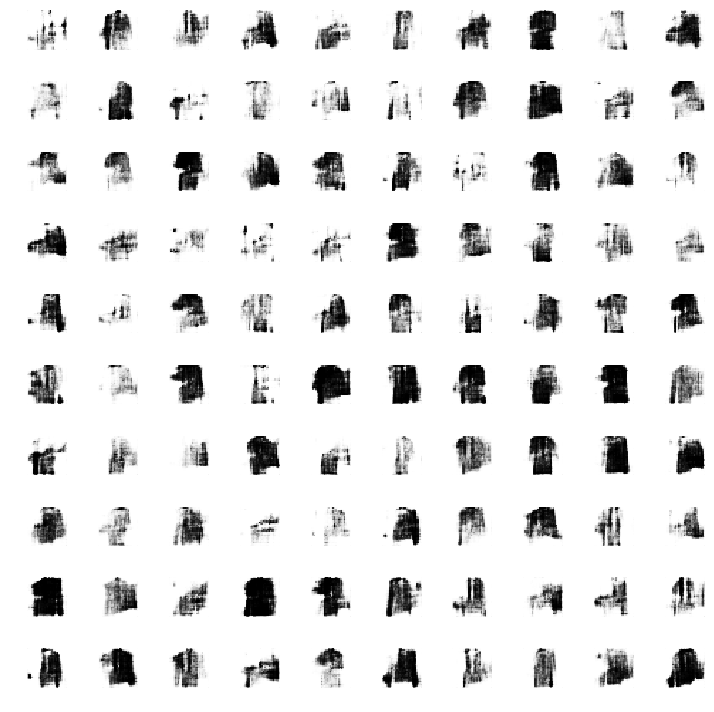

>Saved: wgan_generated_plot_0005.png and wgan_model_0005.h5
>6, 1/468, d1=-60.734, d2=-153.811 g=201.935
>6, 2/468, d1=-52.629, d2=-165.522 g=221.048
>6, 3/468, d1=-40.439, d2=-160.037 g=209.559
>6, 4/468, d1=-47.573, d2=-153.022 g=191.366
>6, 5/468, d1=-55.252, d2=-162.936 g=202.997
>6, 6/468, d1=-51.181, d2=-169.140 g=208.552
>6, 7/468, d1=-45.309, d2=-157.910 g=213.976
>6, 8/468, d1=-42.512, d2=-157.395 g=215.577
>6, 9/468, d1=-42.366, d2=-155.278 g=193.770
>6, 10/468, d1=-45.963, d2=-164.762 g=205.743
>6, 11/468, d1=-49.316, d2=-157.058 g=223.911
>6, 12/468, d1=-45.012, d2=-165.623 g=212.153
>6, 13/468, d1=-46.931, d2=-165.136 g=209.776
>6, 14/468, d1=-40.356, d2=-163.376 g=200.681
>6, 15/468, d1=-56.012, d2=-158.188 g=208.329
>6, 16/468, d1=-55.484, d2=-154.169 g=213.365
>6, 17/468, d1=-54.579, d2=-151.804 g=206.761
>6, 18/468, d1=-68.425, d2=-151.850 g=205.996
>6, 19/468, d1=-54.297, d2=-159.063 g=203.244
>6, 20/468, d1=-67.024, d2=-147.972 g=215.405
>6, 21/468, d1=-54.890, d2=-1

>6, 179/468, d1=-65.285, d2=-160.141 g=210.086
>6, 180/468, d1=-54.342, d2=-162.425 g=237.837
>6, 181/468, d1=-52.432, d2=-173.741 g=228.696
>6, 182/468, d1=-59.298, d2=-166.224 g=214.558
>6, 183/468, d1=-60.601, d2=-164.799 g=208.059
>6, 184/468, d1=-68.408, d2=-163.732 g=229.137
>6, 185/468, d1=-72.064, d2=-170.715 g=236.136
>6, 186/468, d1=-62.884, d2=-163.666 g=211.143
>6, 187/468, d1=-66.980, d2=-154.812 g=203.206
>6, 188/468, d1=-65.054, d2=-159.472 g=218.650
>6, 189/468, d1=-66.278, d2=-156.624 g=215.609
>6, 190/468, d1=-60.894, d2=-152.136 g=208.265
>6, 191/468, d1=-70.376, d2=-157.767 g=209.375
>6, 192/468, d1=-71.757, d2=-151.170 g=221.621
>6, 193/468, d1=-60.126, d2=-159.127 g=225.165
>6, 194/468, d1=-57.978, d2=-169.539 g=222.997
>6, 195/468, d1=-64.294, d2=-168.789 g=226.791
>6, 196/468, d1=-60.776, d2=-159.923 g=226.235
>6, 197/468, d1=-67.501, d2=-155.228 g=231.038
>6, 198/468, d1=-68.904, d2=-159.043 g=223.777
>6, 199/468, d1=-62.082, d2=-161.372 g=215.279
>6, 200/468, 

>6, 356/468, d1=-50.399, d2=-169.466 g=224.668
>6, 357/468, d1=-63.101, d2=-175.170 g=240.076
>6, 358/468, d1=-58.044, d2=-172.855 g=228.367
>6, 359/468, d1=-62.564, d2=-173.148 g=232.497
>6, 360/468, d1=-56.271, d2=-169.046 g=230.147
>6, 361/468, d1=-67.923, d2=-170.294 g=220.237
>6, 362/468, d1=-67.134, d2=-159.526 g=230.159
>6, 363/468, d1=-69.832, d2=-163.339 g=225.766
>6, 364/468, d1=-71.469, d2=-162.255 g=230.340
>6, 365/468, d1=-69.147, d2=-166.710 g=222.181
>6, 366/468, d1=-68.357, d2=-157.866 g=235.745
>6, 367/468, d1=-61.000, d2=-173.077 g=227.026
>6, 368/468, d1=-71.276, d2=-177.156 g=242.385
>6, 369/468, d1=-59.387, d2=-168.149 g=228.746
>6, 370/468, d1=-56.803, d2=-165.024 g=226.508
>6, 371/468, d1=-64.531, d2=-167.591 g=229.076
>6, 372/468, d1=-63.190, d2=-164.437 g=224.143
>6, 373/468, d1=-63.660, d2=-162.179 g=235.507
>6, 374/468, d1=-65.355, d2=-165.214 g=244.215
>6, 375/468, d1=-50.698, d2=-159.157 g=229.113
>6, 376/468, d1=-61.469, d2=-163.548 g=232.494
>6, 377/468, 

>7, 65/468, d1=-85.603, d2=-159.235 g=219.880
>7, 66/468, d1=-74.002, d2=-167.541 g=226.585
>7, 67/468, d1=-56.150, d2=-155.834 g=204.005
>7, 68/468, d1=-60.092, d2=-141.225 g=219.018
>7, 69/468, d1=-74.691, d2=-167.422 g=231.063
>7, 70/468, d1=-71.247, d2=-145.439 g=210.531
>7, 71/468, d1=-64.503, d2=-147.500 g=231.223
>7, 72/468, d1=-68.451, d2=-149.136 g=210.000
>7, 73/468, d1=-73.981, d2=-146.416 g=212.326
>7, 74/468, d1=-61.884, d2=-145.387 g=215.898
>7, 75/468, d1=-65.067, d2=-156.488 g=239.989
>7, 76/468, d1=-62.900, d2=-156.465 g=218.335
>7, 77/468, d1=-65.641, d2=-158.493 g=222.152
>7, 78/468, d1=-59.172, d2=-162.274 g=228.731
>7, 79/468, d1=-64.354, d2=-166.822 g=240.845
>7, 80/468, d1=-60.814, d2=-152.366 g=224.341
>7, 81/468, d1=-59.938, d2=-166.592 g=226.359
>7, 82/468, d1=-66.390, d2=-163.031 g=232.400
>7, 83/468, d1=-60.213, d2=-159.280 g=229.391
>7, 84/468, d1=-55.710, d2=-154.571 g=225.740
>7, 85/468, d1=-66.169, d2=-179.506 g=239.576
>7, 86/468, d1=-63.419, d2=-151.54

>7, 242/468, d1=-65.653, d2=-141.506 g=189.207
>7, 243/468, d1=-67.111, d2=-132.080 g=222.050
>7, 244/468, d1=-61.102, d2=-142.994 g=203.592
>7, 245/468, d1=-50.342, d2=-141.201 g=208.497
>7, 246/468, d1=-66.145, d2=-156.348 g=223.061
>7, 247/468, d1=-55.754, d2=-128.984 g=187.406
>7, 248/468, d1=-64.773, d2=-150.673 g=222.628
>7, 249/468, d1=-55.531, d2=-134.093 g=213.772
>7, 250/468, d1=-61.034, d2=-141.696 g=215.170
>7, 251/468, d1=-54.895, d2=-144.000 g=221.637
>7, 252/468, d1=-64.216, d2=-146.265 g=223.681
>7, 253/468, d1=-45.140, d2=-157.293 g=219.203
>7, 254/468, d1=-62.575, d2=-147.957 g=212.425
>7, 255/468, d1=-62.036, d2=-131.610 g=224.064
>7, 256/468, d1=-59.285, d2=-157.418 g=219.529
>7, 257/468, d1=-54.264, d2=-156.086 g=218.380
>7, 258/468, d1=-67.476, d2=-143.478 g=208.089
>7, 259/468, d1=-60.344, d2=-155.931 g=211.487
>7, 260/468, d1=-67.185, d2=-136.680 g=213.897
>7, 261/468, d1=-63.278, d2=-150.817 g=211.931
>7, 262/468, d1=-60.638, d2=-146.265 g=229.412
>7, 263/468, 

>7, 419/468, d1=-57.606, d2=-135.650 g=201.395
>7, 420/468, d1=-49.621, d2=-127.904 g=220.284
>7, 421/468, d1=-55.796, d2=-118.194 g=191.910
>7, 422/468, d1=-49.821, d2=-122.965 g=201.553
>7, 423/468, d1=-53.573, d2=-123.245 g=218.540
>7, 424/468, d1=-49.157, d2=-139.011 g=214.922
>7, 425/468, d1=-45.588, d2=-129.517 g=208.917
>7, 426/468, d1=-59.111, d2=-130.414 g=218.306
>7, 427/468, d1=-53.571, d2=-129.100 g=206.025
>7, 428/468, d1=-61.064, d2=-123.323 g=195.879
>7, 429/468, d1=-62.132, d2=-127.417 g=198.562
>7, 430/468, d1=-54.291, d2=-122.576 g=187.349
>7, 431/468, d1=-50.562, d2=-122.210 g=198.179
>7, 432/468, d1=-69.186, d2=-124.812 g=203.949
>7, 433/468, d1=-50.793, d2=-136.213 g=213.816
>7, 434/468, d1=-53.140, d2=-131.754 g=207.597
>7, 435/468, d1=-54.045, d2=-146.032 g=214.483
>7, 436/468, d1=-52.990, d2=-127.053 g=219.935
>7, 437/468, d1=-38.843, d2=-138.649 g=207.257
>7, 438/468, d1=-50.158, d2=-132.002 g=209.475
>7, 439/468, d1=-50.684, d2=-130.936 g=200.351
>7, 440/468, 

>8, 128/468, d1=-47.030, d2=-103.096 g=185.718
>8, 129/468, d1=-53.936, d2=-111.677 g=204.668
>8, 130/468, d1=-50.631, d2=-121.427 g=195.363
>8, 131/468, d1=-50.323, d2=-129.988 g=188.315
>8, 132/468, d1=-44.422, d2=-110.218 g=182.899
>8, 133/468, d1=-53.352, d2=-117.259 g=197.530
>8, 134/468, d1=-49.985, d2=-99.696 g=178.811
>8, 135/468, d1=-50.541, d2=-112.085 g=175.428
>8, 136/468, d1=-44.506, d2=-111.240 g=191.169
>8, 137/468, d1=-51.436, d2=-125.353 g=175.945
>8, 138/468, d1=-56.970, d2=-105.241 g=176.967
>8, 139/468, d1=-61.586, d2=-113.280 g=186.445
>8, 140/468, d1=-59.025, d2=-112.953 g=192.724
>8, 141/468, d1=-54.778, d2=-104.914 g=189.031
>8, 142/468, d1=-54.216, d2=-114.295 g=199.629
>8, 143/468, d1=-61.775, d2=-113.435 g=192.195
>8, 144/468, d1=-53.072, d2=-124.117 g=175.672
>8, 145/468, d1=-57.150, d2=-112.822 g=181.679
>8, 146/468, d1=-46.541, d2=-108.064 g=196.502
>8, 147/468, d1=-48.678, d2=-107.215 g=176.085
>8, 148/468, d1=-50.684, d2=-115.404 g=200.441
>8, 149/468, d

>8, 305/468, d1=-45.046, d2=-96.695 g=180.191
>8, 306/468, d1=-46.544, d2=-96.809 g=175.471
>8, 307/468, d1=-46.595, d2=-106.387 g=192.892
>8, 308/468, d1=-38.325, d2=-105.136 g=174.409
>8, 309/468, d1=-39.586, d2=-105.141 g=200.739
>8, 310/468, d1=-31.342, d2=-105.597 g=178.629
>8, 311/468, d1=-37.955, d2=-107.928 g=169.810
>8, 312/468, d1=-45.935, d2=-109.862 g=169.360
>8, 313/468, d1=-52.685, d2=-94.605 g=172.696
>8, 314/468, d1=-44.479, d2=-102.278 g=172.731
>8, 315/468, d1=-40.054, d2=-90.621 g=161.797
>8, 316/468, d1=-42.712, d2=-102.778 g=167.857
>8, 317/468, d1=-46.852, d2=-107.134 g=178.671
>8, 318/468, d1=-53.158, d2=-103.384 g=181.339
>8, 319/468, d1=-58.648, d2=-93.232 g=165.007
>8, 320/468, d1=-43.012, d2=-97.261 g=187.170
>8, 321/468, d1=-41.162, d2=-102.328 g=170.032
>8, 322/468, d1=-39.279, d2=-109.785 g=183.527
>8, 323/468, d1=-39.341, d2=-96.404 g=166.988
>8, 324/468, d1=-47.939, d2=-97.804 g=166.410
>8, 325/468, d1=-52.691, d2=-104.954 g=191.298
>8, 326/468, d1=-53.1

>9, 16/468, d1=-60.849, d2=-69.601 g=151.442
>9, 17/468, d1=-42.744, d2=-83.515 g=151.548
>9, 18/468, d1=-46.285, d2=-86.744 g=160.365
>9, 19/468, d1=-52.170, d2=-90.147 g=159.702
>9, 20/468, d1=-42.397, d2=-90.597 g=147.792
>9, 21/468, d1=-64.564, d2=-80.308 g=156.158
>9, 22/468, d1=-39.776, d2=-80.988 g=148.320
>9, 23/468, d1=-37.139, d2=-71.692 g=143.656
>9, 24/468, d1=-45.900, d2=-92.580 g=151.171
>9, 25/468, d1=-36.053, d2=-86.367 g=167.652
>9, 26/468, d1=-48.335, d2=-91.234 g=162.826
>9, 27/468, d1=-49.700, d2=-89.325 g=171.412
>9, 28/468, d1=-44.421, d2=-88.254 g=154.222
>9, 29/468, d1=-42.873, d2=-90.040 g=150.588
>9, 30/468, d1=-49.362, d2=-89.764 g=159.957
>9, 31/468, d1=-32.879, d2=-101.698 g=170.320
>9, 32/468, d1=-36.333, d2=-96.813 g=171.080
>9, 33/468, d1=-32.881, d2=-90.254 g=167.942
>9, 34/468, d1=-31.484, d2=-99.210 g=165.565
>9, 35/468, d1=-35.053, d2=-92.261 g=163.389
>9, 36/468, d1=-39.387, d2=-93.463 g=161.589
>9, 37/468, d1=-40.829, d2=-83.187 g=158.957
>9, 38/46

>9, 196/468, d1=-41.837, d2=-77.750 g=150.994
>9, 197/468, d1=-46.931, d2=-63.850 g=123.387
>9, 198/468, d1=-41.028, d2=-62.306 g=142.101
>9, 199/468, d1=-48.264, d2=-69.665 g=125.735
>9, 200/468, d1=-41.132, d2=-76.552 g=154.853
>9, 201/468, d1=-51.529, d2=-63.407 g=119.999
>9, 202/468, d1=-62.053, d2=-60.449 g=138.853
>9, 203/468, d1=-53.365, d2=-70.043 g=133.054
>9, 204/468, d1=-36.853, d2=-64.623 g=139.862
>9, 205/468, d1=-53.790, d2=-62.089 g=120.437
>9, 206/468, d1=-42.063, d2=-68.213 g=154.237
>9, 207/468, d1=-49.002, d2=-63.647 g=144.374
>9, 208/468, d1=-44.654, d2=-61.745 g=136.417
>9, 209/468, d1=-47.082, d2=-63.424 g=131.349
>9, 210/468, d1=-45.431, d2=-57.573 g=135.105
>9, 211/468, d1=-53.446, d2=-62.331 g=141.200
>9, 212/468, d1=-50.982, d2=-62.969 g=139.851
>9, 213/468, d1=-49.578, d2=-61.040 g=136.698
>9, 214/468, d1=-55.084, d2=-69.098 g=148.378
>9, 215/468, d1=-56.599, d2=-62.845 g=135.143
>9, 216/468, d1=-48.493, d2=-60.535 g=138.386
>9, 217/468, d1=-51.131, d2=-75.69

>9, 376/468, d1=-53.185, d2=-50.624 g=126.518
>9, 377/468, d1=-54.289, d2=-54.694 g=121.057
>9, 378/468, d1=-66.189, d2=-41.891 g=112.779
>9, 379/468, d1=-73.343, d2=-47.801 g=115.617
>9, 380/468, d1=-70.111, d2=-38.839 g=100.841
>9, 381/468, d1=-69.611, d2=-31.383 g=86.154
>9, 382/468, d1=-71.304, d2=-36.830 g=85.994
>9, 383/468, d1=-78.011, d2=-30.980 g=107.893
>9, 384/468, d1=-69.525, d2=-39.180 g=88.744
>9, 385/468, d1=-73.369, d2=-30.321 g=90.173
>9, 386/468, d1=-71.868, d2=-40.606 g=90.794
>9, 387/468, d1=-73.136, d2=-42.377 g=115.713
>9, 388/468, d1=-61.768, d2=-40.995 g=96.951
>9, 389/468, d1=-59.987, d2=-29.508 g=95.008
>9, 390/468, d1=-73.640, d2=-33.432 g=92.861
>9, 391/468, d1=-64.235, d2=-35.050 g=101.813
>9, 392/468, d1=-47.630, d2=-45.508 g=98.972
>9, 393/468, d1=-51.915, d2=-38.265 g=119.140
>9, 394/468, d1=-54.748, d2=-42.668 g=119.282
>9, 395/468, d1=-47.890, d2=-44.449 g=122.040
>9, 396/468, d1=-53.118, d2=-40.583 g=124.906
>9, 397/468, d1=-55.678, d2=-54.493 g=128.7

>10, 91/468, d1=-68.715, d2=-17.866 g=93.674
>10, 92/468, d1=-61.902, d2=-24.820 g=85.949
>10, 93/468, d1=-61.699, d2=-33.432 g=96.317
>10, 94/468, d1=-67.634, d2=-29.998 g=94.748
>10, 95/468, d1=-55.794, d2=-29.706 g=103.222
>10, 96/468, d1=-61.726, d2=-25.277 g=88.383
>10, 97/468, d1=-67.222, d2=-28.755 g=108.560
>10, 98/468, d1=-56.550, d2=-28.862 g=102.103
>10, 99/468, d1=-69.872, d2=-29.627 g=107.319
>10, 100/468, d1=-61.582, d2=-30.001 g=95.278
>10, 101/468, d1=-66.036, d2=-28.918 g=108.901
>10, 102/468, d1=-66.438, d2=-31.001 g=89.121
>10, 103/468, d1=-57.690, d2=-34.481 g=107.974
>10, 104/468, d1=-59.443, d2=-31.507 g=85.299
>10, 105/468, d1=-71.055, d2=-28.082 g=80.562
>10, 106/468, d1=-78.979, d2=-21.301 g=95.189
>10, 107/468, d1=-70.182, d2=-28.861 g=86.820
>10, 108/468, d1=-82.939, d2=1.066 g=65.280
>10, 109/468, d1=-79.505, d2=-4.038 g=78.541
>10, 110/468, d1=-76.138, d2=-5.245 g=78.183
>10, 111/468, d1=-81.164, d2=-13.662 g=91.285
>10, 112/468, d1=-80.747, d2=-12.560 g=91

>10, 271/468, d1=-64.656, d2=-19.022 g=78.315
>10, 272/468, d1=-75.976, d2=-6.905 g=79.139
>10, 273/468, d1=-65.836, d2=-14.460 g=64.993
>10, 274/468, d1=-77.931, d2=-10.398 g=74.536
>10, 275/468, d1=-65.658, d2=-13.564 g=79.113
>10, 276/468, d1=-76.008, d2=-12.728 g=79.949
>10, 277/468, d1=-62.811, d2=-16.225 g=83.785
>10, 278/468, d1=-64.647, d2=-18.103 g=81.355
>10, 279/468, d1=-59.492, d2=-5.715 g=75.128
>10, 280/468, d1=-70.391, d2=-15.100 g=84.332
>10, 281/468, d1=-62.680, d2=-31.322 g=90.896
>10, 282/468, d1=-65.693, d2=-17.360 g=84.451
>10, 283/468, d1=-67.334, d2=-27.236 g=98.693
>10, 284/468, d1=-56.282, d2=-23.779 g=92.639
>10, 285/468, d1=-67.918, d2=-20.473 g=78.811
>10, 286/468, d1=-80.937, d2=-20.730 g=80.823
>10, 287/468, d1=-77.727, d2=-12.507 g=78.305
>10, 288/468, d1=-69.623, d2=-9.830 g=70.992
>10, 289/468, d1=-73.720, d2=-18.048 g=70.502
>10, 290/468, d1=-71.052, d2=-12.222 g=66.034
>10, 291/468, d1=-78.263, d2=-2.697 g=65.755
>10, 292/468, d1=-88.628, d2=3.771 g=6

>10, 454/468, d1=-73.686, d2=-4.657 g=61.070
>10, 455/468, d1=-70.340, d2=-6.797 g=74.120
>10, 456/468, d1=-76.008, d2=-10.828 g=61.787
>10, 457/468, d1=-67.443, d2=-10.262 g=72.362
>10, 458/468, d1=-70.283, d2=-16.056 g=67.199
>10, 459/468, d1=-70.616, d2=-4.479 g=73.781
>10, 460/468, d1=-77.604, d2=-8.784 g=68.219
>10, 461/468, d1=-76.679, d2=-2.068 g=60.822
>10, 462/468, d1=-88.077, d2=-4.508 g=68.984
>10, 463/468, d1=-78.693, d2=-1.516 g=63.206
>10, 464/468, d1=-88.162, d2=6.886 g=56.253
>10, 465/468, d1=-87.295, d2=5.300 g=61.100
>10, 466/468, d1=-79.684, d2=-5.608 g=67.301
>10, 467/468, d1=-78.593, d2=2.654 g=66.954
>10, 468/468, d1=-77.862, d2=-3.589 g=66.145


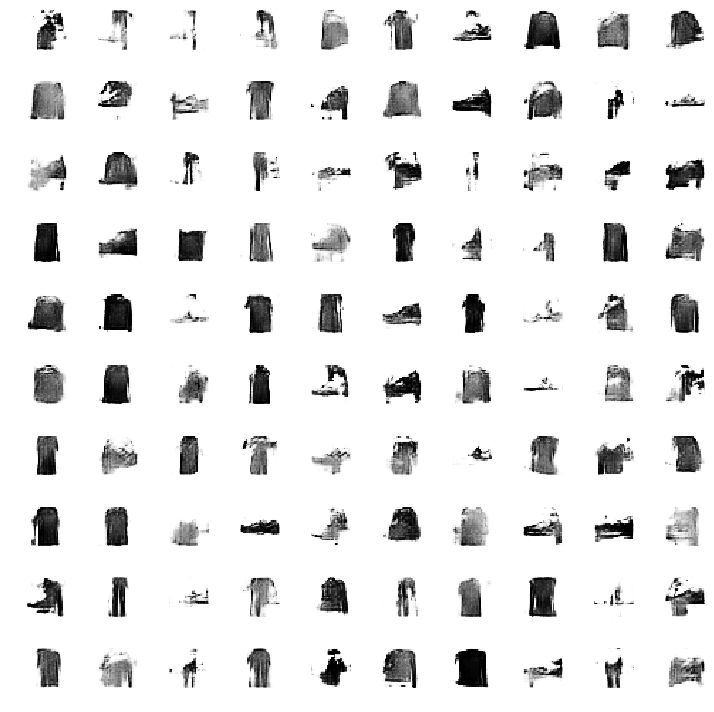

>Saved: wgan_generated_plot_0010.png and wgan_model_0010.h5
>11, 1/468, d1=-84.159, d2=4.825 g=49.271
>11, 2/468, d1=-92.352, d2=2.875 g=46.991
>11, 3/468, d1=-76.076, d2=6.459 g=56.051
>11, 4/468, d1=-77.312, d2=-1.917 g=64.653
>11, 5/468, d1=-76.548, d2=-4.883 g=56.891
>11, 6/468, d1=-76.528, d2=5.443 g=47.176
>11, 7/468, d1=-82.555, d2=0.185 g=59.906
>11, 8/468, d1=-77.642, d2=-0.604 g=55.374
>11, 9/468, d1=-92.277, d2=4.082 g=48.650
>11, 10/468, d1=-84.567, d2=-15.281 g=56.339
>11, 11/468, d1=-88.842, d2=8.492 g=56.560
>11, 12/468, d1=-85.382, d2=7.917 g=46.334
>11, 13/468, d1=-78.327, d2=0.993 g=54.720
>11, 14/468, d1=-88.042, d2=7.977 g=60.259
>11, 15/468, d1=-82.631, d2=5.559 g=53.053
>11, 16/468, d1=-76.927, d2=-1.945 g=71.053
>11, 17/468, d1=-76.411, d2=-3.399 g=66.195
>11, 18/468, d1=-68.336, d2=-3.891 g=64.341
>11, 19/468, d1=-68.434, d2=-7.199 g=62.006
>11, 20/468, d1=-74.407, d2=-13.789 g=68.385
>11, 21/468, d1=-73.629, d2=-4.091 g=67.986
>11, 22/468, d1=-77.534, d2=-15.10

>11, 185/468, d1=-97.143, d2=4.690 g=37.691
>11, 186/468, d1=-82.407, d2=21.427 g=52.963
>11, 187/468, d1=-88.906, d2=8.652 g=51.706
>11, 188/468, d1=-89.388, d2=8.962 g=42.288
>11, 189/468, d1=-91.877, d2=7.909 g=46.220
>11, 190/468, d1=-88.694, d2=19.071 g=39.014
>11, 191/468, d1=-91.816, d2=12.235 g=29.427
>11, 192/468, d1=-104.786, d2=20.235 g=37.014
>11, 193/468, d1=-86.940, d2=15.378 g=29.551
>11, 194/468, d1=-97.370, d2=21.316 g=43.573
>11, 195/468, d1=-83.054, d2=7.762 g=54.503
>11, 196/468, d1=-88.249, d2=13.224 g=45.149
>11, 197/468, d1=-97.508, d2=11.750 g=53.425
>11, 198/468, d1=-86.641, d2=7.033 g=42.311
>11, 199/468, d1=-96.198, d2=4.611 g=45.651
>11, 200/468, d1=-71.866, d2=5.080 g=58.139
>11, 201/468, d1=-87.978, d2=15.254 g=48.788
>11, 202/468, d1=-75.575, d2=6.058 g=50.999
>11, 203/468, d1=-92.984, d2=5.627 g=56.224
>11, 204/468, d1=-89.291, d2=12.755 g=36.484
>11, 205/468, d1=-93.716, d2=22.686 g=37.886
>11, 206/468, d1=-92.980, d2=6.452 g=52.084
>11, 207/468, d1=-89

>11, 368/468, d1=-112.070, d2=37.800 g=20.697
>11, 369/468, d1=-104.603, d2=32.356 g=30.452
>11, 370/468, d1=-100.355, d2=35.320 g=32.565
>11, 371/468, d1=-89.484, d2=19.290 g=31.218
>11, 372/468, d1=-97.021, d2=28.416 g=35.201
>11, 373/468, d1=-94.120, d2=14.153 g=30.478
>11, 374/468, d1=-92.177, d2=17.193 g=35.580
>11, 375/468, d1=-94.894, d2=27.408 g=41.383
>11, 376/468, d1=-92.658, d2=12.635 g=47.153
>11, 377/468, d1=-91.695, d2=9.407 g=48.908
>11, 378/468, d1=-88.614, d2=12.512 g=43.791
>11, 379/468, d1=-92.807, d2=17.931 g=41.662
>11, 380/468, d1=-91.081, d2=18.772 g=31.305
>11, 381/468, d1=-96.939, d2=15.148 g=13.125
>11, 382/468, d1=-91.969, d2=16.379 g=21.962
>11, 383/468, d1=-105.420, d2=26.126 g=23.992
>11, 384/468, d1=-93.291, d2=25.941 g=24.557
>11, 385/468, d1=-105.365, d2=31.431 g=33.206
>11, 386/468, d1=-119.187, d2=38.655 g=15.665
>11, 387/468, d1=-124.308, d2=42.362 g=13.796
>11, 388/468, d1=-130.836, d2=44.649 g=22.727
>11, 389/468, d1=-141.753, d2=49.462 g=23.770
>1

>12, 82/468, d1=-101.692, d2=35.606 g=18.271
>12, 83/468, d1=-109.905, d2=39.167 g=9.167
>12, 84/468, d1=-107.698, d2=33.878 g=14.331
>12, 85/468, d1=-111.324, d2=35.261 g=18.829
>12, 86/468, d1=-105.250, d2=37.706 g=16.349
>12, 87/468, d1=-114.040, d2=36.170 g=19.331
>12, 88/468, d1=-104.852, d2=34.358 g=16.546
>12, 89/468, d1=-105.612, d2=36.548 g=20.763
>12, 90/468, d1=-98.193, d2=27.375 g=28.040
>12, 91/468, d1=-99.670, d2=28.221 g=32.197
>12, 92/468, d1=-101.996, d2=20.458 g=22.793
>12, 93/468, d1=-106.227, d2=37.456 g=26.126
>12, 94/468, d1=-99.404, d2=22.798 g=33.630
>12, 95/468, d1=-100.076, d2=23.056 g=35.182
>12, 96/468, d1=-104.596, d2=35.267 g=21.194
>12, 97/468, d1=-98.702, d2=22.892 g=26.598
>12, 98/468, d1=-106.094, d2=29.181 g=15.751
>12, 99/468, d1=-104.683, d2=26.567 g=14.988
>12, 100/468, d1=-108.175, d2=33.074 g=22.043
>12, 101/468, d1=-102.548, d2=35.825 g=13.502
>12, 102/468, d1=-118.141, d2=41.359 g=15.457
>12, 103/468, d1=-133.793, d2=41.556 g=20.994
>12, 104/46

>12, 262/468, d1=-113.704, d2=42.502 g=-0.779
>12, 263/468, d1=-118.151, d2=60.661 g=2.820
>12, 264/468, d1=-112.771, d2=44.606 g=13.025
>12, 265/468, d1=-114.013, d2=37.966 g=3.902
>12, 266/468, d1=-103.682, d2=48.314 g=0.138
>12, 267/468, d1=-109.860, d2=51.887 g=8.532
>12, 268/468, d1=-110.175, d2=37.294 g=19.255
>12, 269/468, d1=-110.213, d2=42.381 g=4.588
>12, 270/468, d1=-104.469, d2=35.254 g=19.979
>12, 271/468, d1=-109.094, d2=38.012 g=4.488
>12, 272/468, d1=-104.531, d2=32.288 g=26.210
>12, 273/468, d1=-104.712, d2=34.174 g=18.856
>12, 274/468, d1=-108.397, d2=24.762 g=30.278
>12, 275/468, d1=-103.853, d2=27.316 g=44.194
>12, 276/468, d1=-112.542, d2=32.231 g=19.782
>12, 277/468, d1=-109.735, d2=28.132 g=12.440
>12, 278/468, d1=-106.202, d2=46.880 g=-1.203
>12, 279/468, d1=-104.848, d2=43.935 g=-3.722
>12, 280/468, d1=-110.490, d2=39.268 g=3.574
>12, 281/468, d1=-120.229, d2=45.394 g=5.490
>12, 282/468, d1=-125.503, d2=46.270 g=3.780
>12, 283/468, d1=-129.902, d2=58.190 g=-12.

>12, 442/468, d1=-103.440, d2=50.302 g=20.456
>12, 443/468, d1=-109.946, d2=42.777 g=0.175
>12, 444/468, d1=-114.020, d2=40.877 g=26.194
>12, 445/468, d1=-106.322, d2=42.312 g=8.676
>12, 446/468, d1=-113.220, d2=37.823 g=14.044
>12, 447/468, d1=-107.200, d2=43.019 g=22.006
>12, 448/468, d1=-105.350, d2=35.007 g=0.969
>12, 449/468, d1=-113.380, d2=39.299 g=20.213
>12, 450/468, d1=-111.499, d2=34.621 g=4.341
>12, 451/468, d1=-125.450, d2=44.515 g=5.332
>12, 452/468, d1=-103.006, d2=38.476 g=3.473
>12, 453/468, d1=-114.980, d2=40.109 g=-4.575
>12, 454/468, d1=-122.833, d2=48.106 g=-13.901
>12, 455/468, d1=-127.396, d2=49.093 g=-8.396
>12, 456/468, d1=-133.418, d2=60.177 g=-9.302
>12, 457/468, d1=-140.525, d2=61.667 g=-6.629
>12, 458/468, d1=-150.367, d2=72.946 g=-7.991
>12, 459/468, d1=-139.632, d2=70.517 g=-14.191
>12, 460/468, d1=-151.466, d2=77.250 g=-9.867
>12, 461/468, d1=-143.035, d2=77.201 g=-15.619
>12, 462/468, d1=-143.167, d2=73.575 g=-14.447
>12, 463/468, d1=-132.385, d2=69.641

>13, 154/468, d1=-125.527, d2=56.820 g=-8.096
>13, 155/468, d1=-122.139, d2=55.789 g=5.535
>13, 156/468, d1=-118.300, d2=53.142 g=4.867
>13, 157/468, d1=-120.312, d2=46.593 g=2.991
>13, 158/468, d1=-131.128, d2=56.375 g=3.067
>13, 159/468, d1=-120.845, d2=51.017 g=-13.081
>13, 160/468, d1=-113.245, d2=61.249 g=-12.753
>13, 161/468, d1=-123.174, d2=55.419 g=-13.749
>13, 162/468, d1=-129.915, d2=55.038 g=-6.830
>13, 163/468, d1=-128.461, d2=54.044 g=-1.600
>13, 164/468, d1=-127.952, d2=64.831 g=-4.604
>13, 165/468, d1=-128.162, d2=69.592 g=-17.486
>13, 166/468, d1=-127.162, d2=62.301 g=-12.486
>13, 167/468, d1=-125.323, d2=61.725 g=-13.411
>13, 168/468, d1=-135.376, d2=64.054 g=-22.835
>13, 169/468, d1=-123.230, d2=58.131 g=-10.539
>13, 170/468, d1=-127.686, d2=60.030 g=-14.014
>13, 171/468, d1=-118.995, d2=57.885 g=-1.281
>13, 172/468, d1=-125.487, d2=56.008 g=0.742
>13, 173/468, d1=-126.359, d2=61.521 g=-2.149
>13, 174/468, d1=-122.370, d2=53.905 g=-3.483
>13, 175/468, d1=-122.607, d2=

>13, 334/468, d1=-111.221, d2=40.118 g=-3.957
>13, 335/468, d1=-110.077, d2=47.596 g=17.218
>13, 336/468, d1=-110.883, d2=42.778 g=12.670
>13, 337/468, d1=-110.022, d2=51.969 g=7.044
>13, 338/468, d1=-115.606, d2=42.527 g=2.076
>13, 339/468, d1=-108.813, d2=56.049 g=13.496
>13, 340/468, d1=-111.969, d2=41.057 g=18.693
>13, 341/468, d1=-114.115, d2=38.571 g=13.995
>13, 342/468, d1=-103.460, d2=49.311 g=6.118
>13, 343/468, d1=-111.853, d2=47.177 g=8.311
>13, 344/468, d1=-113.998, d2=47.764 g=-9.217
>13, 345/468, d1=-104.370, d2=47.455 g=4.875
>13, 346/468, d1=-117.698, d2=46.504 g=-3.733
>13, 347/468, d1=-112.284, d2=42.381 g=-5.473
>13, 348/468, d1=-118.794, d2=52.508 g=-7.206
>13, 349/468, d1=-119.258, d2=56.018 g=-10.781
>13, 350/468, d1=-130.833, d2=52.291 g=2.125
>13, 351/468, d1=-126.470, d2=64.401 g=-2.726
>13, 352/468, d1=-130.996, d2=57.849 g=-13.427
>13, 353/468, d1=-123.625, d2=62.881 g=-15.352
>13, 354/468, d1=-128.089, d2=54.480 g=-5.836
>13, 355/468, d1=-122.418, d2=64.639 

>14, 46/468, d1=-114.986, d2=52.142 g=0.741
>14, 47/468, d1=-121.637, d2=59.322 g=-4.634
>14, 48/468, d1=-117.906, d2=59.431 g=-8.801
>14, 49/468, d1=-125.576, d2=73.719 g=-16.077
>14, 50/468, d1=-128.820, d2=56.370 g=-10.659
>14, 51/468, d1=-127.614, d2=65.651 g=-21.363
>14, 52/468, d1=-133.225, d2=62.692 g=-12.732
>14, 53/468, d1=-123.520, d2=60.718 g=-14.509
>14, 54/468, d1=-125.154, d2=67.988 g=-25.163
>14, 55/468, d1=-124.868, d2=59.920 g=-12.370
>14, 56/468, d1=-130.230, d2=64.544 g=-20.681
>14, 57/468, d1=-120.035, d2=46.397 g=-9.550
>14, 58/468, d1=-128.736, d2=58.704 g=-20.089
>14, 59/468, d1=-119.677, d2=60.434 g=-7.364
>14, 60/468, d1=-121.857, d2=59.168 g=-11.446
>14, 61/468, d1=-123.479, d2=52.477 g=-14.622
>14, 62/468, d1=-119.110, d2=63.401 g=-8.586
>14, 63/468, d1=-121.928, d2=56.073 g=-6.181
>14, 64/468, d1=-125.840, d2=61.714 g=-13.039
>14, 65/468, d1=-127.062, d2=61.629 g=-7.515
>14, 66/468, d1=-126.302, d2=59.046 g=-14.203
>14, 67/468, d1=-121.034, d2=59.032 g=-10.7

>14, 223/468, d1=-122.314, d2=66.725 g=-16.876
>14, 224/468, d1=-121.836, d2=62.752 g=-15.097
>14, 225/468, d1=-116.530, d2=62.074 g=-12.568
>14, 226/468, d1=-117.884, d2=55.266 g=-5.170
>14, 227/468, d1=-115.370, d2=57.897 g=-3.926
>14, 228/468, d1=-121.182, d2=55.115 g=9.953
>14, 229/468, d1=-104.848, d2=48.662 g=-1.880
>14, 230/468, d1=-108.681, d2=53.755 g=-6.437
>14, 231/468, d1=-113.397, d2=57.547 g=1.573
>14, 232/468, d1=-119.016, d2=58.044 g=-10.676
>14, 233/468, d1=-118.502, d2=55.162 g=-10.314
>14, 234/468, d1=-113.230, d2=50.971 g=-12.127
>14, 235/468, d1=-108.633, d2=51.759 g=-8.882
>14, 236/468, d1=-117.208, d2=57.188 g=-9.578
>14, 237/468, d1=-123.477, d2=56.857 g=-21.220
>14, 238/468, d1=-123.353, d2=58.943 g=-27.812
>14, 239/468, d1=-134.817, d2=66.677 g=-36.271
>14, 240/468, d1=-127.559, d2=69.998 g=-24.825
>14, 241/468, d1=-131.048, d2=67.342 g=-41.663
>14, 242/468, d1=-138.220, d2=76.524 g=-43.483
>14, 243/468, d1=-141.087, d2=78.356 g=-47.520
>14, 244/468, d1=-152.8

>14, 400/468, d1=-111.285, d2=59.156 g=-4.985
>14, 401/468, d1=-111.222, d2=52.062 g=-4.735
>14, 402/468, d1=-118.984, d2=60.419 g=3.695
>14, 403/468, d1=-114.867, d2=51.324 g=-5.541
>14, 404/468, d1=-115.736, d2=58.476 g=-14.566
>14, 405/468, d1=-118.619, d2=55.641 g=-11.294
>14, 406/468, d1=-111.863, d2=53.492 g=-8.325
>14, 407/468, d1=-115.359, d2=60.093 g=-24.129
>14, 408/468, d1=-115.396, d2=68.042 g=-17.044
>14, 409/468, d1=-118.755, d2=58.380 g=-3.208
>14, 410/468, d1=-120.568, d2=68.311 g=-8.583
>14, 411/468, d1=-104.231, d2=60.589 g=-10.645
>14, 412/468, d1=-106.481, d2=62.794 g=-6.567
>14, 413/468, d1=-116.110, d2=60.361 g=-8.829
>14, 414/468, d1=-110.863, d2=55.777 g=-5.661
>14, 415/468, d1=-114.629, d2=65.358 g=-4.360
>14, 416/468, d1=-119.747, d2=63.344 g=-9.071
>14, 417/468, d1=-125.260, d2=71.727 g=-24.745
>14, 418/468, d1=-117.662, d2=63.858 g=-20.409
>14, 419/468, d1=-118.600, d2=64.827 g=-23.014
>14, 420/468, d1=-126.231, d2=69.052 g=-20.263
>14, 421/468, d1=-142.718,

>15, 112/468, d1=-134.675, d2=70.932 g=-27.367
>15, 113/468, d1=-121.488, d2=66.618 g=-43.916
>15, 114/468, d1=-130.257, d2=73.778 g=-34.366
>15, 115/468, d1=-122.646, d2=75.707 g=-29.258
>15, 116/468, d1=-130.246, d2=67.238 g=-16.942
>15, 117/468, d1=-124.723, d2=72.599 g=-17.390
>15, 118/468, d1=-130.947, d2=66.952 g=-10.337
>15, 119/468, d1=-149.406, d2=69.322 g=-0.318
>15, 120/468, d1=-139.485, d2=66.863 g=4.722
>15, 121/468, d1=-161.206, d2=67.337 g=5.022
>15, 122/468, d1=-145.160, d2=76.771 g=-11.340
>15, 123/468, d1=-139.002, d2=86.549 g=-32.255
>15, 124/468, d1=-142.630, d2=97.364 g=-40.221
>15, 125/468, d1=-132.478, d2=78.530 g=-37.908
>15, 126/468, d1=-129.634, d2=75.924 g=-42.110
>15, 127/468, d1=-124.820, d2=82.125 g=-38.562
>15, 128/468, d1=-121.547, d2=71.492 g=-34.550
>15, 129/468, d1=-117.808, d2=74.845 g=-19.326
>15, 130/468, d1=-117.651, d2=64.806 g=-1.907
>15, 131/468, d1=-121.157, d2=68.098 g=-19.885
>15, 132/468, d1=-117.676, d2=67.333 g=-16.135
>15, 133/468, d1=-1

>15, 289/468, d1=-115.868, d2=68.405 g=-30.779
>15, 290/468, d1=-122.665, d2=72.366 g=-16.473
>15, 291/468, d1=-120.257, d2=73.198 g=-22.263
>15, 292/468, d1=-124.074, d2=69.418 g=-24.994
>15, 293/468, d1=-117.503, d2=65.509 g=-33.980
>15, 294/468, d1=-112.240, d2=65.125 g=-30.203
>15, 295/468, d1=-123.889, d2=60.501 g=-25.126
>15, 296/468, d1=-122.806, d2=66.256 g=-32.933
>15, 297/468, d1=-124.168, d2=72.396 g=-31.212
>15, 298/468, d1=-120.961, d2=74.641 g=-25.005
>15, 299/468, d1=-117.411, d2=68.872 g=-27.087
>15, 300/468, d1=-121.546, d2=69.552 g=-29.669
>15, 301/468, d1=-122.656, d2=67.410 g=-10.424
>15, 302/468, d1=-112.949, d2=60.939 g=-17.377
>15, 303/468, d1=-117.553, d2=68.832 g=-9.554
>15, 304/468, d1=-115.901, d2=66.443 g=-16.515
>15, 305/468, d1=-112.452, d2=63.825 g=-18.064
>15, 306/468, d1=-121.434, d2=67.064 g=-19.819
>15, 307/468, d1=-117.321, d2=67.636 g=-18.230
>15, 308/468, d1=-112.233, d2=66.521 g=-18.092
>15, 309/468, d1=-116.703, d2=63.995 g=-9.178
>15, 310/468, d

>15, 466/468, d1=-134.929, d2=86.210 g=-48.022
>15, 467/468, d1=-128.725, d2=83.668 g=-44.992
>15, 468/468, d1=-133.361, d2=84.564 g=-48.460


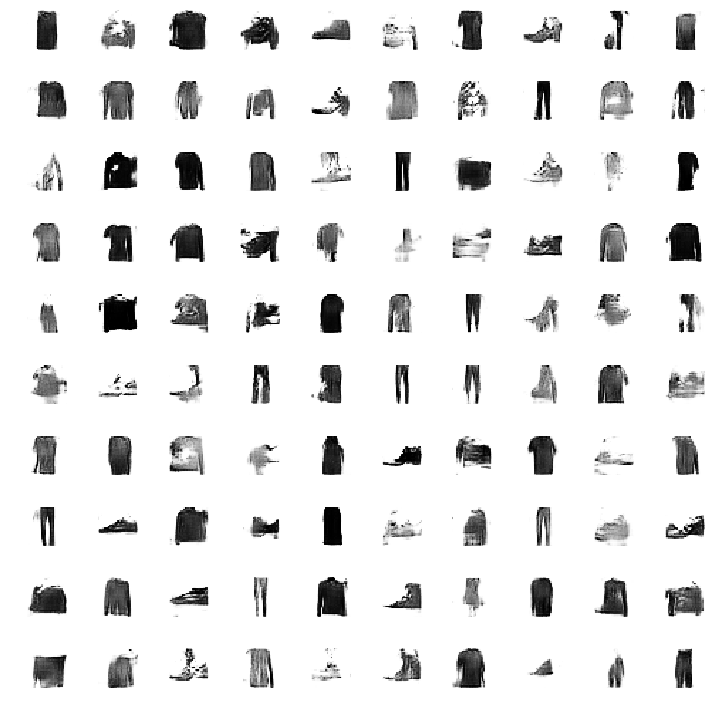

>Saved: wgan_generated_plot_0015.png and wgan_model_0015.h5
>16, 1/468, d1=-137.432, d2=86.044 g=-44.914
>16, 2/468, d1=-133.658, d2=90.100 g=-38.156
>16, 3/468, d1=-128.464, d2=82.619 g=-36.486
>16, 4/468, d1=-132.958, d2=76.450 g=-42.363
>16, 5/468, d1=-119.595, d2=76.041 g=-37.979
>16, 6/468, d1=-124.794, d2=83.163 g=-26.491
>16, 7/468, d1=-125.940, d2=80.493 g=-47.039
>16, 8/468, d1=-127.499, d2=74.747 g=-22.785
>16, 9/468, d1=-123.015, d2=82.694 g=-38.561
>16, 10/468, d1=-117.931, d2=82.471 g=-30.409
>16, 11/468, d1=-121.763, d2=75.668 g=-26.747
>16, 12/468, d1=-124.244, d2=74.276 g=-29.298
>16, 13/468, d1=-125.553, d2=73.717 g=-10.608
>16, 14/468, d1=-118.495, d2=69.335 g=-23.726
>16, 15/468, d1=-119.593, d2=70.273 g=-18.477
>16, 16/468, d1=-121.116, d2=71.367 g=-20.501
>16, 17/468, d1=-118.403, d2=68.392 g=-27.541
>16, 18/468, d1=-116.869, d2=75.556 g=-29.052
>16, 19/468, d1=-121.303, d2=72.248 g=-29.912
>16, 20/468, d1=-123.412, d2=79.712 g=-34.497
>16, 21/468, d1=-129.407, d2=

>16, 177/468, d1=-135.722, d2=90.219 g=-53.153
>16, 178/468, d1=-136.175, d2=93.679 g=-40.334
>16, 179/468, d1=-132.616, d2=82.495 g=-49.308
>16, 180/468, d1=-128.206, d2=86.105 g=-43.200
>16, 181/468, d1=-128.871, d2=84.964 g=-50.219
>16, 182/468, d1=-136.395, d2=86.485 g=-56.464
>16, 183/468, d1=-132.072, d2=80.271 g=-45.849
>16, 184/468, d1=-128.836, d2=84.116 g=-69.197
>16, 185/468, d1=-136.148, d2=86.447 g=-69.636
>16, 186/468, d1=-132.882, d2=86.869 g=-66.063
>16, 187/468, d1=-133.284, d2=86.335 g=-50.481
>16, 188/468, d1=-143.421, d2=86.792 g=-59.797
>16, 189/468, d1=-140.388, d2=88.720 g=-39.475
>16, 190/468, d1=-149.138, d2=91.722 g=-43.245
>16, 191/468, d1=-150.050, d2=92.700 g=-28.510
>16, 192/468, d1=-164.705, d2=95.417 g=-24.141
>16, 193/468, d1=-163.745, d2=91.424 g=-13.537
>16, 194/468, d1=-175.860, d2=93.752 g=-11.021
>16, 195/468, d1=-179.141, d2=89.108 g=1.736
>16, 196/468, d1=-180.735, d2=100.985 g=-24.544
>16, 197/468, d1=-175.389, d2=113.440 g=-48.641
>16, 198/468,

>16, 351/468, d1=-133.433, d2=93.965 g=-50.687
>16, 352/468, d1=-134.560, d2=80.752 g=-57.384
>16, 353/468, d1=-139.153, d2=96.844 g=-45.455
>16, 354/468, d1=-139.051, d2=94.222 g=-54.407
>16, 355/468, d1=-136.422, d2=90.187 g=-45.927
>16, 356/468, d1=-137.337, d2=92.504 g=-49.343
>16, 357/468, d1=-134.691, d2=86.851 g=-42.153
>16, 358/468, d1=-137.986, d2=92.583 g=-47.637
>16, 359/468, d1=-141.303, d2=95.413 g=-54.181
>16, 360/468, d1=-134.667, d2=85.912 g=-52.879
>16, 361/468, d1=-134.205, d2=91.887 g=-53.288
>16, 362/468, d1=-124.150, d2=89.320 g=-47.254
>16, 363/468, d1=-130.206, d2=83.529 g=-45.017
>16, 364/468, d1=-129.168, d2=83.126 g=-51.029
>16, 365/468, d1=-131.585, d2=88.655 g=-47.257
>16, 366/468, d1=-135.382, d2=90.768 g=-57.965
>16, 367/468, d1=-135.382, d2=88.017 g=-53.469
>16, 368/468, d1=-136.116, d2=88.650 g=-53.158
>16, 369/468, d1=-131.116, d2=91.414 g=-47.346
>16, 370/468, d1=-128.295, d2=90.350 g=-49.895
>16, 371/468, d1=-135.856, d2=90.569 g=-44.456
>16, 372/468,

>17, 60/468, d1=-139.827, d2=93.928 g=-54.317
>17, 61/468, d1=-142.042, d2=100.423 g=-65.610
>17, 62/468, d1=-142.100, d2=100.156 g=-77.176
>17, 63/468, d1=-147.668, d2=107.014 g=-66.617
>17, 64/468, d1=-145.833, d2=101.402 g=-56.823
>17, 65/468, d1=-145.181, d2=96.450 g=-49.114
>17, 66/468, d1=-138.833, d2=99.589 g=-52.318
>17, 67/468, d1=-133.797, d2=98.403 g=-58.318
>17, 68/468, d1=-137.221, d2=97.918 g=-47.615
>17, 69/468, d1=-133.020, d2=101.914 g=-54.661
>17, 70/468, d1=-133.092, d2=96.053 g=-45.107
>17, 71/468, d1=-133.902, d2=88.738 g=-54.939
>17, 72/468, d1=-135.957, d2=88.047 g=-52.128
>17, 73/468, d1=-131.349, d2=89.386 g=-51.653
>17, 74/468, d1=-129.316, d2=91.444 g=-49.569
>17, 75/468, d1=-136.072, d2=88.945 g=-61.068
>17, 76/468, d1=-139.805, d2=97.734 g=-58.300
>17, 77/468, d1=-138.439, d2=100.212 g=-54.316
>17, 78/468, d1=-137.777, d2=101.861 g=-54.104
>17, 79/468, d1=-139.791, d2=92.578 g=-42.191
>17, 80/468, d1=-147.075, d2=98.255 g=-57.810
>17, 81/468, d1=-138.488, d

>17, 237/468, d1=-141.549, d2=95.815 g=-57.991
>17, 238/468, d1=-133.905, d2=97.469 g=-60.884
>17, 239/468, d1=-132.709, d2=96.053 g=-58.724
>17, 240/468, d1=-128.750, d2=94.623 g=-53.632
>17, 241/468, d1=-128.484, d2=89.592 g=-50.106
>17, 242/468, d1=-130.026, d2=95.070 g=-51.902
>17, 243/468, d1=-131.029, d2=89.240 g=-53.713
>17, 244/468, d1=-134.182, d2=86.431 g=-45.054
>17, 245/468, d1=-137.472, d2=100.313 g=-56.845
>17, 246/468, d1=-135.774, d2=99.418 g=-58.255
>17, 247/468, d1=-135.119, d2=99.978 g=-56.020
>17, 248/468, d1=-137.363, d2=95.798 g=-52.019
>17, 249/468, d1=-143.069, d2=102.616 g=-58.761
>17, 250/468, d1=-146.112, d2=107.088 g=-56.749
>17, 251/468, d1=-148.438, d2=107.258 g=-72.800
>17, 252/468, d1=-141.959, d2=111.806 g=-62.356
>17, 253/468, d1=-146.270, d2=104.238 g=-60.517
>17, 254/468, d1=-149.372, d2=107.151 g=-53.298
>17, 255/468, d1=-139.438, d2=106.312 g=-63.402
>17, 256/468, d1=-142.379, d2=107.620 g=-58.994
>17, 257/468, d1=-140.275, d2=101.452 g=-64.957
>17

>17, 411/468, d1=-130.369, d2=90.827 g=-39.014
>17, 412/468, d1=-129.173, d2=94.704 g=-52.228
>17, 413/468, d1=-134.019, d2=93.241 g=-58.686
>17, 414/468, d1=-132.570, d2=94.454 g=-45.644
>17, 415/468, d1=-136.143, d2=93.008 g=-44.864
>17, 416/468, d1=-134.371, d2=95.324 g=-48.367
>17, 417/468, d1=-131.848, d2=87.493 g=-46.594
>17, 418/468, d1=-139.295, d2=91.813 g=-54.504
>17, 419/468, d1=-142.648, d2=96.243 g=-56.835
>17, 420/468, d1=-139.649, d2=103.410 g=-57.200
>17, 421/468, d1=-134.350, d2=100.227 g=-65.888
>17, 422/468, d1=-142.398, d2=96.066 g=-71.527
>17, 423/468, d1=-149.837, d2=103.585 g=-75.001
>17, 424/468, d1=-148.870, d2=109.240 g=-69.486
>17, 425/468, d1=-152.629, d2=114.242 g=-67.852
>17, 426/468, d1=-158.725, d2=122.416 g=-78.971
>17, 427/468, d1=-159.219, d2=125.254 g=-80.412
>17, 428/468, d1=-169.684, d2=122.773 g=-88.004
>17, 429/468, d1=-160.166, d2=123.012 g=-91.978
>17, 430/468, d1=-160.680, d2=115.855 g=-87.503
>17, 431/468, d1=-157.494, d2=120.290 g=-79.636
>1

>18, 117/468, d1=-159.318, d2=130.684 g=-110.381
>18, 118/468, d1=-146.227, d2=116.693 g=-89.365
>18, 119/468, d1=-152.906, d2=117.373 g=-105.164
>18, 120/468, d1=-161.166, d2=131.918 g=-91.378
>18, 121/468, d1=-150.196, d2=123.285 g=-87.208
>18, 122/468, d1=-148.855, d2=113.538 g=-72.523
>18, 123/468, d1=-140.334, d2=112.899 g=-71.479
>18, 124/468, d1=-146.781, d2=102.268 g=-66.985
>18, 125/468, d1=-144.217, d2=107.221 g=-75.972
>18, 126/468, d1=-144.237, d2=114.258 g=-56.100
>18, 127/468, d1=-151.071, d2=108.771 g=-64.311
>18, 128/468, d1=-147.672, d2=107.616 g=-59.279
>18, 129/468, d1=-146.020, d2=102.698 g=-66.586
>18, 130/468, d1=-146.841, d2=117.395 g=-69.889
>18, 131/468, d1=-156.857, d2=119.794 g=-79.019
>18, 132/468, d1=-163.380, d2=118.106 g=-85.077
>18, 133/468, d1=-157.145, d2=123.863 g=-82.173
>18, 134/468, d1=-157.544, d2=125.149 g=-83.600
>18, 135/468, d1=-167.151, d2=134.755 g=-94.882
>18, 136/468, d1=-172.934, d2=130.976 g=-88.306
>18, 137/468, d1=-172.383, d2=134.828 

>18, 288/468, d1=-161.866, d2=134.855 g=-87.305
>18, 289/468, d1=-166.731, d2=134.386 g=-89.450
>18, 290/468, d1=-166.392, d2=137.339 g=-85.712
>18, 291/468, d1=-166.222, d2=133.238 g=-88.607
>18, 292/468, d1=-165.191, d2=140.287 g=-91.388
>18, 293/468, d1=-167.743, d2=133.756 g=-95.272
>18, 294/468, d1=-172.075, d2=127.941 g=-104.993
>18, 295/468, d1=-172.405, d2=134.824 g=-108.840
>18, 296/468, d1=-174.486, d2=138.185 g=-117.871
>18, 297/468, d1=-173.129, d2=148.588 g=-110.459
>18, 298/468, d1=-185.181, d2=141.138 g=-121.475
>18, 299/468, d1=-181.896, d2=143.615 g=-129.818
>18, 300/468, d1=-186.005, d2=147.929 g=-119.016
>18, 301/468, d1=-192.598, d2=152.493 g=-122.228
>18, 302/468, d1=-195.751, d2=157.729 g=-127.375
>18, 303/468, d1=-187.603, d2=153.605 g=-119.787
>18, 304/468, d1=-189.414, d2=157.991 g=-106.824
>18, 305/468, d1=-190.685, d2=156.302 g=-97.120
>18, 306/468, d1=-187.426, d2=150.528 g=-99.093
>18, 307/468, d1=-186.597, d2=157.733 g=-100.248
>18, 308/468, d1=-178.683, d

>18, 459/468, d1=-152.668, d2=121.575 g=-89.745
>18, 460/468, d1=-145.140, d2=112.616 g=-64.154
>18, 461/468, d1=-155.317, d2=117.176 g=-64.805
>18, 462/468, d1=-156.784, d2=114.627 g=-57.862
>18, 463/468, d1=-153.977, d2=111.329 g=-67.257
>18, 464/468, d1=-157.910, d2=115.075 g=-77.067
>18, 465/468, d1=-171.693, d2=120.299 g=-98.965
>18, 466/468, d1=-165.514, d2=124.538 g=-114.916
>18, 467/468, d1=-167.086, d2=128.099 g=-124.887
>18, 468/468, d1=-177.843, d2=138.745 g=-115.698
>19, 1/468, d1=-179.133, d2=139.643 g=-115.101
>19, 2/468, d1=-177.514, d2=136.696 g=-136.788
>19, 3/468, d1=-185.213, d2=149.822 g=-126.696
>19, 4/468, d1=-182.928, d2=146.227 g=-120.536
>19, 5/468, d1=-194.267, d2=145.589 g=-98.973
>19, 6/468, d1=-212.491, d2=145.589 g=-79.269
>19, 7/468, d1=-201.879, d2=156.013 g=-78.474
>19, 8/468, d1=-234.026, d2=143.222 g=-64.465
>19, 9/468, d1=-225.198, d2=170.194 g=-79.892
>19, 10/468, d1=-218.560, d2=169.701 g=-107.251
>19, 11/468, d1=-198.722, d2=170.908 g=-111.822
>19

>19, 162/468, d1=-153.966, d2=119.567 g=-74.428
>19, 163/468, d1=-159.488, d2=126.928 g=-89.825
>19, 164/468, d1=-161.184, d2=128.598 g=-92.928
>19, 165/468, d1=-163.367, d2=135.081 g=-95.887
>19, 166/468, d1=-163.144, d2=133.030 g=-100.255
>19, 167/468, d1=-166.409, d2=130.352 g=-96.466
>19, 168/468, d1=-170.049, d2=133.999 g=-105.011
>19, 169/468, d1=-166.887, d2=137.061 g=-97.263
>19, 170/468, d1=-174.633, d2=143.637 g=-108.586
>19, 171/468, d1=-167.711, d2=138.625 g=-98.481
>19, 172/468, d1=-173.530, d2=139.936 g=-97.267
>19, 173/468, d1=-177.858, d2=140.719 g=-96.057
>19, 174/468, d1=-174.087, d2=136.496 g=-96.243
>19, 175/468, d1=-165.774, d2=143.453 g=-101.918
>19, 176/468, d1=-168.771, d2=140.828 g=-94.789
>19, 177/468, d1=-170.589, d2=139.845 g=-103.795
>19, 178/468, d1=-170.772, d2=139.803 g=-97.696
>19, 179/468, d1=-169.700, d2=137.377 g=-95.084
>19, 180/468, d1=-164.764, d2=137.206 g=-98.090
>19, 181/468, d1=-168.264, d2=138.386 g=-91.284
>19, 182/468, d1=-158.985, d2=132.9

>19, 333/468, d1=-164.926, d2=131.748 g=-95.962
>19, 334/468, d1=-170.277, d2=139.783 g=-93.322
>19, 335/468, d1=-171.761, d2=140.464 g=-96.315
>19, 336/468, d1=-174.858, d2=141.931 g=-95.496
>19, 337/468, d1=-171.598, d2=139.316 g=-109.881
>19, 338/468, d1=-181.182, d2=140.658 g=-114.275
>19, 339/468, d1=-181.201, d2=144.408 g=-126.510
>19, 340/468, d1=-176.799, d2=145.978 g=-110.039
>19, 341/468, d1=-179.709, d2=149.914 g=-112.402
>19, 342/468, d1=-180.834, d2=148.098 g=-120.512
>19, 343/468, d1=-181.663, d2=153.757 g=-121.266
>19, 344/468, d1=-186.655, d2=152.179 g=-104.449
>19, 345/468, d1=-182.987, d2=158.010 g=-108.554
>19, 346/468, d1=-186.375, d2=157.378 g=-98.085
>19, 347/468, d1=-190.717, d2=147.711 g=-104.735
>19, 348/468, d1=-191.569, d2=165.036 g=-109.639
>19, 349/468, d1=-182.391, d2=153.967 g=-108.786
>19, 350/468, d1=-175.487, d2=149.328 g=-109.196
>19, 351/468, d1=-175.721, d2=149.672 g=-111.028
>19, 352/468, d1=-178.827, d2=144.654 g=-103.302
>19, 353/468, d1=-172.871

>20, 36/468, d1=-175.871, d2=144.910 g=-122.603
>20, 37/468, d1=-175.122, d2=147.730 g=-106.759
>20, 38/468, d1=-171.608, d2=136.503 g=-103.150
>20, 39/468, d1=-165.369, d2=142.779 g=-106.299
>20, 40/468, d1=-170.372, d2=143.373 g=-100.850
>20, 41/468, d1=-169.279, d2=137.125 g=-103.351
>20, 42/468, d1=-160.500, d2=131.888 g=-100.282
>20, 43/468, d1=-161.106, d2=135.001 g=-93.733
>20, 44/468, d1=-159.513, d2=129.761 g=-89.362
>20, 45/468, d1=-162.704, d2=136.360 g=-89.118
>20, 46/468, d1=-159.988, d2=131.004 g=-81.891
>20, 47/468, d1=-163.670, d2=135.524 g=-100.881
>20, 48/468, d1=-162.244, d2=131.569 g=-92.617
>20, 49/468, d1=-156.595, d2=133.400 g=-101.144
>20, 50/468, d1=-168.120, d2=131.540 g=-105.289
>20, 51/468, d1=-165.327, d2=135.881 g=-102.091
>20, 52/468, d1=-157.604, d2=131.403 g=-97.681
>20, 53/468, d1=-162.001, d2=137.736 g=-95.285
>20, 54/468, d1=-165.035, d2=136.221 g=-91.987
>20, 55/468, d1=-169.923, d2=138.570 g=-84.248
>20, 56/468, d1=-168.693, d2=138.789 g=-91.717
>2

>20, 207/468, d1=-187.204, d2=166.625 g=-121.831
>20, 208/468, d1=-188.902, d2=159.872 g=-129.496
>20, 209/468, d1=-188.056, d2=158.351 g=-119.965
>20, 210/468, d1=-186.839, d2=161.773 g=-126.254
>20, 211/468, d1=-187.592, d2=156.492 g=-115.710
>20, 212/468, d1=-188.041, d2=161.629 g=-120.817
>20, 213/468, d1=-187.855, d2=158.625 g=-124.325
>20, 214/468, d1=-192.123, d2=156.650 g=-112.793
>20, 215/468, d1=-179.808, d2=156.251 g=-122.913
>20, 216/468, d1=-184.225, d2=155.724 g=-123.508
>20, 217/468, d1=-176.603, d2=154.716 g=-122.759
>20, 218/468, d1=-183.595, d2=159.630 g=-121.262
>20, 219/468, d1=-181.211, d2=161.904 g=-118.681
>20, 220/468, d1=-189.045, d2=162.453 g=-119.421
>20, 221/468, d1=-182.320, d2=153.878 g=-113.240
>20, 222/468, d1=-188.886, d2=157.476 g=-113.285
>20, 223/468, d1=-176.674, d2=153.216 g=-108.776
>20, 224/468, d1=-178.158, d2=155.209 g=-114.502
>20, 225/468, d1=-179.476, d2=151.477 g=-111.725
>20, 226/468, d1=-175.065, d2=148.351 g=-115.149
>20, 227/468, d1=-17

>20, 377/468, d1=-230.815, d2=188.362 g=-146.142
>20, 378/468, d1=-225.412, d2=190.735 g=-161.758
>20, 379/468, d1=-210.814, d2=182.729 g=-158.196
>20, 380/468, d1=-194.681, d2=172.264 g=-150.510
>20, 381/468, d1=-190.021, d2=166.321 g=-152.462
>20, 382/468, d1=-180.139, d2=162.987 g=-134.898
>20, 383/468, d1=-191.784, d2=156.545 g=-133.914
>20, 384/468, d1=-189.554, d2=155.919 g=-133.326
>20, 385/468, d1=-185.531, d2=160.092 g=-121.684
>20, 386/468, d1=-179.248, d2=159.387 g=-118.365
>20, 387/468, d1=-179.915, d2=153.118 g=-114.288
>20, 388/468, d1=-181.250, d2=152.025 g=-114.800
>20, 389/468, d1=-175.776, d2=153.647 g=-121.170
>20, 390/468, d1=-175.180, d2=150.354 g=-111.219
>20, 391/468, d1=-178.002, d2=154.251 g=-123.937
>20, 392/468, d1=-186.018, d2=153.799 g=-110.321
>20, 393/468, d1=-182.583, d2=155.074 g=-117.549
>20, 394/468, d1=-176.372, d2=148.395 g=-116.297
>20, 395/468, d1=-179.682, d2=152.221 g=-109.211
>20, 396/468, d1=-187.268, d2=155.434 g=-118.559
>20, 397/468, d1=-18

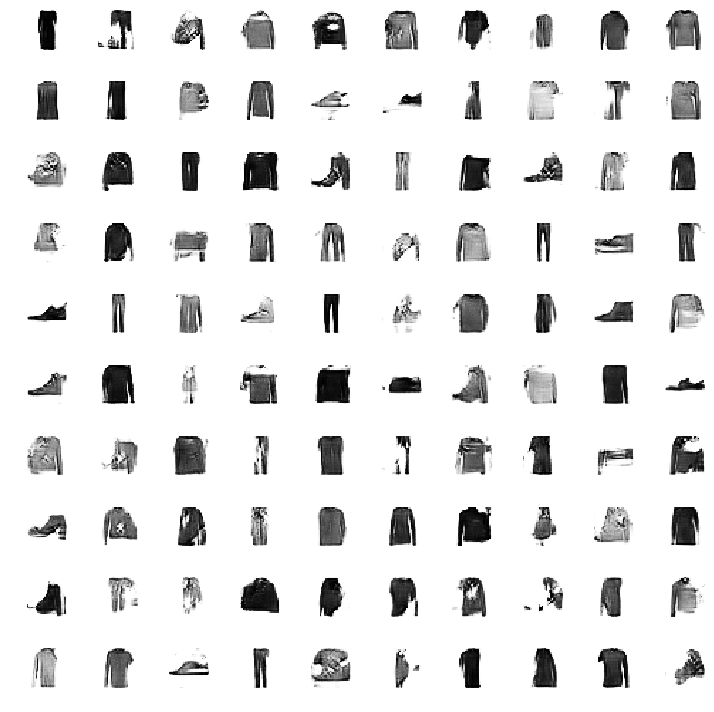

>Saved: wgan_generated_plot_0020.png and wgan_model_0020.h5
>21, 1/468, d1=-207.665, d2=181.060 g=-143.617
>21, 2/468, d1=-200.649, d2=179.969 g=-147.980
>21, 3/468, d1=-205.735, d2=182.483 g=-143.186
>21, 4/468, d1=-204.875, d2=181.903 g=-138.381
>21, 5/468, d1=-196.286, d2=173.902 g=-141.971
>21, 6/468, d1=-199.889, d2=180.100 g=-143.337
>21, 7/468, d1=-201.650, d2=174.218 g=-143.469
>21, 8/468, d1=-201.520, d2=177.504 g=-142.840
>21, 9/468, d1=-198.939, d2=170.992 g=-145.334
>21, 10/468, d1=-195.184, d2=175.512 g=-134.487
>21, 11/468, d1=-196.126, d2=168.546 g=-131.986
>21, 12/468, d1=-194.134, d2=172.801 g=-132.803
>21, 13/468, d1=-191.430, d2=170.709 g=-136.172
>21, 14/468, d1=-195.725, d2=169.941 g=-135.110
>21, 15/468, d1=-193.506, d2=169.885 g=-135.164
>21, 16/468, d1=-194.523, d2=170.063 g=-130.032
>21, 17/468, d1=-197.944, d2=162.990 g=-128.877
>21, 18/468, d1=-191.366, d2=168.919 g=-133.998
>21, 19/468, d1=-191.872, d2=168.731 g=-127.437
>21, 20/468, d1=-192.788, d2=165.182 

>21, 170/468, d1=-189.554, d2=161.254 g=-130.598
>21, 171/468, d1=-190.078, d2=171.881 g=-132.007
>21, 172/468, d1=-190.822, d2=166.721 g=-129.010
>21, 173/468, d1=-193.784, d2=165.494 g=-122.910
>21, 174/468, d1=-186.040, d2=161.500 g=-130.267
>21, 175/468, d1=-183.721, d2=159.501 g=-128.844
>21, 176/468, d1=-188.953, d2=157.116 g=-126.162
>21, 177/468, d1=-185.734, d2=156.697 g=-126.720
>21, 178/468, d1=-179.077, d2=162.247 g=-117.712
>21, 179/468, d1=-187.814, d2=157.490 g=-125.282
>21, 180/468, d1=-183.134, d2=158.225 g=-117.235
>21, 181/468, d1=-187.502, d2=161.680 g=-129.034
>21, 182/468, d1=-187.243, d2=158.853 g=-130.365
>21, 183/468, d1=-188.766, d2=167.894 g=-129.670
>21, 184/468, d1=-183.816, d2=163.403 g=-129.830
>21, 185/468, d1=-185.116, d2=159.266 g=-128.853
>21, 186/468, d1=-182.698, d2=153.687 g=-120.107
>21, 187/468, d1=-180.761, d2=157.274 g=-122.225
>21, 188/468, d1=-182.133, d2=153.247 g=-121.065
>21, 189/468, d1=-176.949, d2=153.725 g=-122.767
>21, 190/468, d1=-17

>21, 338/468, d1=-189.808, d2=167.560 g=-129.844
>21, 339/468, d1=-188.866, d2=165.858 g=-137.407
>21, 340/468, d1=-188.355, d2=166.755 g=-132.336
>21, 341/468, d1=-191.393, d2=163.519 g=-129.700
>21, 342/468, d1=-187.143, d2=165.924 g=-128.103
>21, 343/468, d1=-185.504, d2=162.591 g=-131.024
>21, 344/468, d1=-186.611, d2=162.290 g=-125.232
>21, 345/468, d1=-184.880, d2=163.012 g=-119.403
>21, 346/468, d1=-188.481, d2=166.311 g=-129.392
>21, 347/468, d1=-189.390, d2=160.319 g=-121.439
>21, 348/468, d1=-184.301, d2=166.677 g=-132.309
>21, 349/468, d1=-189.208, d2=159.945 g=-131.037
>21, 350/468, d1=-191.099, d2=163.578 g=-129.398
>21, 351/468, d1=-187.044, d2=166.558 g=-128.016
>21, 352/468, d1=-191.858, d2=163.553 g=-127.279
>21, 353/468, d1=-194.948, d2=167.310 g=-135.254
>21, 354/468, d1=-192.176, d2=165.463 g=-141.692
>21, 355/468, d1=-187.963, d2=159.329 g=-137.462
>21, 356/468, d1=-186.464, d2=154.170 g=-144.699
>21, 357/468, d1=-192.146, d2=167.172 g=-139.656
>21, 358/468, d1=-17

>22, 40/468, d1=-215.095, d2=181.095 g=-150.640
>22, 41/468, d1=-219.244, d2=189.987 g=-154.556
>22, 42/468, d1=-209.161, d2=190.564 g=-154.803
>22, 43/468, d1=-209.114, d2=169.851 g=-158.785
>22, 44/468, d1=-199.381, d2=171.713 g=-141.350
>22, 45/468, d1=-200.002, d2=167.010 g=-141.871
>22, 46/468, d1=-191.902, d2=170.538 g=-132.674
>22, 47/468, d1=-199.107, d2=175.010 g=-145.937
>22, 48/468, d1=-192.293, d2=170.739 g=-124.821
>22, 49/468, d1=-192.144, d2=170.155 g=-142.549
>22, 50/468, d1=-192.527, d2=169.944 g=-134.856
>22, 51/468, d1=-193.540, d2=177.732 g=-137.569
>22, 52/468, d1=-192.245, d2=171.284 g=-132.013
>22, 53/468, d1=-194.068, d2=171.181 g=-140.634
>22, 54/468, d1=-204.826, d2=166.981 g=-141.568
>22, 55/468, d1=-204.340, d2=170.581 g=-139.757
>22, 56/468, d1=-197.687, d2=172.787 g=-135.192
>22, 57/468, d1=-192.319, d2=168.472 g=-135.875
>22, 58/468, d1=-195.679, d2=171.929 g=-128.671
>22, 59/468, d1=-197.753, d2=168.828 g=-137.272
>22, 60/468, d1=-194.817, d2=168.810 g=-

>22, 211/468, d1=-192.591, d2=162.512 g=-132.989
>22, 212/468, d1=-196.842, d2=172.926 g=-138.515
>22, 213/468, d1=-191.689, d2=168.130 g=-141.353
>22, 214/468, d1=-193.234, d2=167.261 g=-137.288
>22, 215/468, d1=-193.308, d2=170.071 g=-142.304
>22, 216/468, d1=-194.185, d2=174.005 g=-140.629
>22, 217/468, d1=-194.627, d2=173.273 g=-139.957
>22, 218/468, d1=-195.285, d2=173.383 g=-136.493
>22, 219/468, d1=-196.040, d2=170.805 g=-134.451
>22, 220/468, d1=-193.091, d2=170.535 g=-142.558
>22, 221/468, d1=-199.987, d2=171.751 g=-138.899
>22, 222/468, d1=-194.110, d2=169.753 g=-137.686
>22, 223/468, d1=-191.655, d2=174.392 g=-134.144
>22, 224/468, d1=-196.084, d2=170.254 g=-133.927
>22, 225/468, d1=-195.670, d2=168.192 g=-138.969
>22, 226/468, d1=-191.956, d2=175.918 g=-134.399
>22, 227/468, d1=-191.286, d2=173.591 g=-140.511
>22, 228/468, d1=-195.210, d2=170.853 g=-144.604
>22, 229/468, d1=-187.360, d2=169.126 g=-132.225
>22, 230/468, d1=-188.838, d2=165.495 g=-133.458
>22, 231/468, d1=-18

>22, 379/468, d1=-193.549, d2=169.712 g=-135.483
>22, 380/468, d1=-189.138, d2=169.803 g=-142.341
>22, 381/468, d1=-197.481, d2=174.305 g=-145.725
>22, 382/468, d1=-198.737, d2=174.833 g=-139.054
>22, 383/468, d1=-197.664, d2=175.743 g=-138.786
>22, 384/468, d1=-196.544, d2=171.528 g=-147.738
>22, 385/468, d1=-201.737, d2=176.393 g=-150.095
>22, 386/468, d1=-197.203, d2=174.058 g=-140.216
>22, 387/468, d1=-198.593, d2=175.606 g=-147.785
>22, 388/468, d1=-195.106, d2=173.984 g=-137.064
>22, 389/468, d1=-194.080, d2=175.018 g=-146.232
>22, 390/468, d1=-185.430, d2=167.258 g=-141.209
>22, 391/468, d1=-190.112, d2=169.959 g=-138.566
>22, 392/468, d1=-198.761, d2=173.634 g=-144.300
>22, 393/468, d1=-199.169, d2=170.609 g=-130.871
>22, 394/468, d1=-196.095, d2=175.189 g=-136.873
>22, 395/468, d1=-200.129, d2=177.815 g=-139.265
>22, 396/468, d1=-197.948, d2=166.859 g=-141.580
>22, 397/468, d1=-196.905, d2=178.518 g=-138.398
>22, 398/468, d1=-192.266, d2=174.685 g=-137.610
>22, 399/468, d1=-19

>23, 81/468, d1=-223.916, d2=202.714 g=-175.104
>23, 82/468, d1=-221.021, d2=203.716 g=-179.012
>23, 83/468, d1=-225.720, d2=202.635 g=-168.858
>23, 84/468, d1=-220.841, d2=197.667 g=-171.029
>23, 85/468, d1=-225.214, d2=200.953 g=-165.139
>23, 86/468, d1=-225.297, d2=192.939 g=-167.621
>23, 87/468, d1=-223.601, d2=196.224 g=-179.626
>23, 88/468, d1=-225.859, d2=198.993 g=-194.016
>23, 89/468, d1=-236.758, d2=201.006 g=-195.415
>23, 90/468, d1=-231.118, d2=200.639 g=-194.013
>23, 91/468, d1=-231.530, d2=205.339 g=-183.992
>23, 92/468, d1=-231.564, d2=204.378 g=-190.302
>23, 93/468, d1=-231.000, d2=210.732 g=-183.702
>23, 94/468, d1=-242.366, d2=209.246 g=-161.685
>23, 95/468, d1=-241.062, d2=221.738 g=-158.253
>23, 96/468, d1=-250.146, d2=215.552 g=-159.234
>23, 97/468, d1=-250.396, d2=216.959 g=-161.902
>23, 98/468, d1=-238.159, d2=213.083 g=-157.725
>23, 99/468, d1=-239.587, d2=200.398 g=-166.620
>23, 100/468, d1=-230.221, d2=205.949 g=-168.166
>23, 101/468, d1=-238.919, d2=200.253 g

>23, 249/468, d1=-222.614, d2=197.451 g=-178.236
>23, 250/468, d1=-222.323, d2=197.450 g=-171.030
>23, 251/468, d1=-224.339, d2=202.103 g=-159.179
>23, 252/468, d1=-221.927, d2=199.138 g=-168.799
>23, 253/468, d1=-221.703, d2=200.552 g=-160.385
>23, 254/468, d1=-222.123, d2=203.931 g=-163.786
>23, 255/468, d1=-221.043, d2=201.414 g=-166.104
>23, 256/468, d1=-221.097, d2=192.811 g=-154.447
>23, 257/468, d1=-218.397, d2=197.032 g=-162.944
>23, 258/468, d1=-217.254, d2=194.744 g=-167.836
>23, 259/468, d1=-220.256, d2=193.228 g=-166.062
>23, 260/468, d1=-222.222, d2=191.088 g=-176.495
>23, 261/468, d1=-209.903, d2=190.959 g=-160.728
>23, 262/468, d1=-220.499, d2=193.777 g=-160.652
>23, 263/468, d1=-215.828, d2=189.328 g=-168.148
>23, 264/468, d1=-221.303, d2=196.518 g=-161.172
>23, 265/468, d1=-223.189, d2=195.423 g=-173.816
>23, 266/468, d1=-217.828, d2=187.610 g=-179.633
>23, 267/468, d1=-220.935, d2=194.761 g=-161.218
>23, 268/468, d1=-216.130, d2=192.125 g=-172.446
>23, 269/468, d1=-21

>23, 417/468, d1=-215.984, d2=191.718 g=-160.800
>23, 418/468, d1=-217.146, d2=192.251 g=-157.442
>23, 419/468, d1=-208.246, d2=189.494 g=-158.731
>23, 420/468, d1=-216.157, d2=192.473 g=-164.919
>23, 421/468, d1=-216.991, d2=190.092 g=-164.545
>23, 422/468, d1=-223.388, d2=192.361 g=-162.613
>23, 423/468, d1=-209.715, d2=192.679 g=-164.391
>23, 424/468, d1=-209.360, d2=192.180 g=-167.123
>23, 425/468, d1=-212.593, d2=186.976 g=-168.086
>23, 426/468, d1=-213.996, d2=187.299 g=-171.711
>23, 427/468, d1=-214.474, d2=195.162 g=-176.403
>23, 428/468, d1=-214.827, d2=190.532 g=-174.818
>23, 429/468, d1=-219.421, d2=194.571 g=-162.846
>23, 430/468, d1=-214.740, d2=194.113 g=-157.074
>23, 431/468, d1=-218.395, d2=188.695 g=-142.731
>23, 432/468, d1=-224.661, d2=191.283 g=-139.775
>23, 433/468, d1=-227.322, d2=190.381 g=-132.226
>23, 434/468, d1=-231.458, d2=190.087 g=-130.295
>23, 435/468, d1=-226.454, d2=198.130 g=-141.228
>23, 436/468, d1=-232.852, d2=203.876 g=-159.419
>23, 437/468, d1=-22

>24, 120/468, d1=-212.829, d2=192.702 g=-171.674
>24, 121/468, d1=-218.239, d2=191.827 g=-177.795
>24, 122/468, d1=-219.282, d2=193.842 g=-164.469
>24, 123/468, d1=-221.241, d2=193.518 g=-174.071
>24, 124/468, d1=-220.982, d2=199.245 g=-170.547
>24, 125/468, d1=-222.403, d2=202.068 g=-159.753
>24, 126/468, d1=-223.876, d2=204.728 g=-164.575
>24, 127/468, d1=-228.866, d2=204.365 g=-163.957
>24, 128/468, d1=-229.473, d2=199.693 g=-174.791
>24, 129/468, d1=-232.095, d2=201.861 g=-184.707
>24, 130/468, d1=-224.186, d2=209.949 g=-176.961
>24, 131/468, d1=-232.246, d2=199.976 g=-177.398
>24, 132/468, d1=-219.552, d2=203.773 g=-168.628
>24, 133/468, d1=-219.995, d2=196.128 g=-170.801
>24, 134/468, d1=-221.436, d2=195.228 g=-158.135
>24, 135/468, d1=-216.393, d2=196.223 g=-160.889
>24, 136/468, d1=-216.276, d2=199.076 g=-165.134
>24, 137/468, d1=-220.843, d2=197.047 g=-161.842
>24, 138/468, d1=-217.811, d2=188.691 g=-158.790
>24, 139/468, d1=-213.285, d2=192.612 g=-164.568
>24, 140/468, d1=-21

>24, 288/468, d1=-225.829, d2=214.453 g=-178.036
>24, 289/468, d1=-230.117, d2=207.720 g=-181.738
>24, 290/468, d1=-237.637, d2=209.616 g=-175.954
>24, 291/468, d1=-235.045, d2=211.011 g=-175.870
>24, 292/468, d1=-235.038, d2=210.492 g=-177.153
>24, 293/468, d1=-229.244, d2=207.423 g=-181.332
>24, 294/468, d1=-230.744, d2=210.641 g=-179.157
>24, 295/468, d1=-238.469, d2=209.057 g=-180.746
>24, 296/468, d1=-232.660, d2=208.267 g=-182.825
>24, 297/468, d1=-235.865, d2=216.330 g=-169.533
>24, 298/468, d1=-227.612, d2=207.881 g=-180.153
>24, 299/468, d1=-234.779, d2=214.908 g=-178.736
>24, 300/468, d1=-230.475, d2=212.118 g=-182.344
>24, 301/468, d1=-227.068, d2=206.547 g=-176.504
>24, 302/468, d1=-230.383, d2=206.573 g=-175.285
>24, 303/468, d1=-231.044, d2=205.603 g=-176.028
>24, 304/468, d1=-227.736, d2=205.372 g=-170.565
>24, 305/468, d1=-222.558, d2=202.299 g=-174.001
>24, 306/468, d1=-223.515, d2=208.813 g=-170.679
>24, 307/468, d1=-228.097, d2=203.927 g=-178.858
>24, 308/468, d1=-22

>24, 456/468, d1=-232.487, d2=205.979 g=-189.207
>24, 457/468, d1=-230.619, d2=211.904 g=-194.178
>24, 458/468, d1=-236.376, d2=214.932 g=-187.404
>24, 459/468, d1=-237.947, d2=212.252 g=-191.042
>24, 460/468, d1=-237.149, d2=208.811 g=-191.775
>24, 461/468, d1=-232.964, d2=214.209 g=-180.380
>24, 462/468, d1=-227.137, d2=209.352 g=-190.912
>24, 463/468, d1=-231.338, d2=210.523 g=-180.462
>24, 464/468, d1=-233.009, d2=201.462 g=-183.652
>24, 465/468, d1=-232.727, d2=198.565 g=-197.053
>24, 466/468, d1=-230.523, d2=211.316 g=-185.459
>24, 467/468, d1=-225.961, d2=209.027 g=-172.451
>24, 468/468, d1=-224.152, d2=201.849 g=-170.013
>25, 1/468, d1=-226.166, d2=201.398 g=-167.921
>25, 2/468, d1=-217.634, d2=205.676 g=-169.761
>25, 3/468, d1=-226.173, d2=197.163 g=-173.798
>25, 4/468, d1=-224.596, d2=202.948 g=-169.418
>25, 5/468, d1=-227.533, d2=201.870 g=-183.594
>25, 6/468, d1=-229.031, d2=200.713 g=-181.399
>25, 7/468, d1=-233.761, d2=208.391 g=-197.482
>25, 8/468, d1=-238.979, d2=202.77

>25, 159/468, d1=-241.413, d2=224.410 g=-181.030
>25, 160/468, d1=-245.232, d2=222.329 g=-183.767
>25, 161/468, d1=-247.760, d2=226.010 g=-193.643
>25, 162/468, d1=-244.200, d2=232.464 g=-190.828
>25, 163/468, d1=-239.874, d2=219.007 g=-194.062
>25, 164/468, d1=-241.167, d2=224.296 g=-193.818
>25, 165/468, d1=-239.788, d2=220.269 g=-187.067
>25, 166/468, d1=-242.366, d2=221.846 g=-193.916
>25, 167/468, d1=-242.764, d2=225.779 g=-200.631
>25, 168/468, d1=-243.564, d2=220.487 g=-191.176
>25, 169/468, d1=-236.958, d2=223.463 g=-192.352
>25, 170/468, d1=-238.307, d2=218.747 g=-183.582
>25, 171/468, d1=-238.133, d2=220.503 g=-191.952
>25, 172/468, d1=-239.246, d2=217.148 g=-192.128
>25, 173/468, d1=-239.305, d2=218.364 g=-187.632
>25, 174/468, d1=-236.808, d2=220.886 g=-193.349
>25, 175/468, d1=-238.328, d2=219.995 g=-188.713
>25, 176/468, d1=-239.893, d2=220.735 g=-189.717
>25, 177/468, d1=-244.688, d2=219.017 g=-190.073
>25, 178/468, d1=-237.454, d2=213.776 g=-196.340
>25, 179/468, d1=-24

>25, 327/468, d1=-231.323, d2=214.494 g=-178.461
>25, 328/468, d1=-233.252, d2=213.570 g=-194.819
>25, 329/468, d1=-234.174, d2=218.635 g=-185.737
>25, 330/468, d1=-231.749, d2=209.539 g=-174.328
>25, 331/468, d1=-224.760, d2=207.792 g=-180.275
>25, 332/468, d1=-224.820, d2=207.593 g=-178.435
>25, 333/468, d1=-230.628, d2=208.247 g=-183.066
>25, 334/468, d1=-234.021, d2=219.981 g=-183.429
>25, 335/468, d1=-230.891, d2=218.659 g=-182.897
>25, 336/468, d1=-237.382, d2=212.614 g=-189.297
>25, 337/468, d1=-234.733, d2=216.163 g=-186.016
>25, 338/468, d1=-237.222, d2=213.062 g=-185.785
>25, 339/468, d1=-234.565, d2=216.878 g=-188.525
>25, 340/468, d1=-234.675, d2=209.934 g=-192.652
>25, 341/468, d1=-237.846, d2=211.519 g=-190.467
>25, 342/468, d1=-235.054, d2=209.162 g=-187.983
>25, 343/468, d1=-239.414, d2=212.508 g=-185.403
>25, 344/468, d1=-227.053, d2=211.428 g=-188.310
>25, 345/468, d1=-231.526, d2=210.387 g=-176.008
>25, 346/468, d1=-226.175, d2=208.702 g=-184.975
>25, 347/468, d1=-22

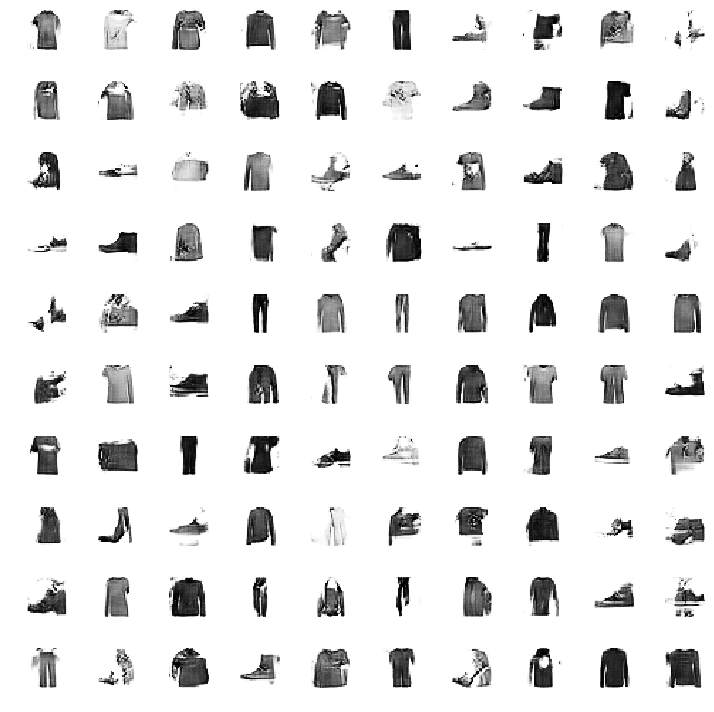

>Saved: wgan_generated_plot_0025.png and wgan_model_0025.h5
>26, 1/468, d1=-238.317, d2=221.194 g=-194.120
>26, 2/468, d1=-240.623, d2=221.301 g=-189.158
>26, 3/468, d1=-245.337, d2=220.448 g=-176.563
>26, 4/468, d1=-252.332, d2=224.102 g=-178.173
>26, 5/468, d1=-252.205, d2=226.390 g=-189.291
>26, 6/468, d1=-250.665, d2=225.766 g=-185.651
>26, 7/468, d1=-238.693, d2=220.225 g=-190.448
>26, 8/468, d1=-243.628, d2=219.513 g=-188.060
>26, 9/468, d1=-241.862, d2=220.810 g=-192.591
>26, 10/468, d1=-237.467, d2=215.558 g=-197.208
>26, 11/468, d1=-240.582, d2=223.670 g=-195.810
>26, 12/468, d1=-239.439, d2=222.857 g=-192.645
>26, 13/468, d1=-237.112, d2=219.072 g=-194.273
>26, 14/468, d1=-234.537, d2=217.325 g=-188.972
>26, 15/468, d1=-232.288, d2=213.403 g=-188.393
>26, 16/468, d1=-233.347, d2=223.181 g=-186.603
>26, 17/468, d1=-236.449, d2=217.318 g=-192.776
>26, 18/468, d1=-238.750, d2=221.585 g=-192.113
>26, 19/468, d1=-240.838, d2=218.880 g=-194.189
>26, 20/468, d1=-243.641, d2=215.253 

>26, 170/468, d1=-238.132, d2=218.877 g=-182.913
>26, 171/468, d1=-235.558, d2=219.756 g=-194.460
>26, 172/468, d1=-240.418, d2=217.314 g=-185.498
>26, 173/468, d1=-237.635, d2=218.377 g=-199.030
>26, 174/468, d1=-239.988, d2=219.124 g=-182.674
>26, 175/468, d1=-238.730, d2=216.437 g=-184.280
>26, 176/468, d1=-236.071, d2=219.585 g=-191.023
>26, 177/468, d1=-240.263, d2=218.225 g=-184.715
>26, 178/468, d1=-240.693, d2=224.724 g=-189.719
>26, 179/468, d1=-240.409, d2=217.583 g=-184.301
>26, 180/468, d1=-245.132, d2=217.270 g=-196.443
>26, 181/468, d1=-239.185, d2=223.295 g=-191.048
>26, 182/468, d1=-239.375, d2=219.220 g=-186.846
>26, 183/468, d1=-235.590, d2=217.263 g=-191.867
>26, 184/468, d1=-237.973, d2=218.919 g=-193.081
>26, 185/468, d1=-237.998, d2=212.608 g=-189.240
>26, 186/468, d1=-240.341, d2=218.972 g=-187.475
>26, 187/468, d1=-240.813, d2=219.356 g=-187.653
>26, 188/468, d1=-242.074, d2=221.643 g=-190.940
>26, 189/468, d1=-235.900, d2=219.728 g=-186.219
>26, 190/468, d1=-23

>26, 338/468, d1=-234.088, d2=217.130 g=-181.662
>26, 339/468, d1=-232.463, d2=213.982 g=-176.680
>26, 340/468, d1=-235.674, d2=210.091 g=-182.543
>26, 341/468, d1=-230.359, d2=210.690 g=-185.920
>26, 342/468, d1=-228.097, d2=207.544 g=-185.702
>26, 343/468, d1=-229.793, d2=207.701 g=-180.201
>26, 344/468, d1=-231.536, d2=215.063 g=-178.952
>26, 345/468, d1=-226.503, d2=208.045 g=-179.889
>26, 346/468, d1=-231.311, d2=212.460 g=-184.450
>26, 347/468, d1=-240.098, d2=211.584 g=-175.306
>26, 348/468, d1=-238.168, d2=215.068 g=-183.354
>26, 349/468, d1=-237.840, d2=214.008 g=-186.985
>26, 350/468, d1=-241.231, d2=215.080 g=-191.523
>26, 351/468, d1=-238.947, d2=215.942 g=-189.189
>26, 352/468, d1=-233.060, d2=216.436 g=-179.961
>26, 353/468, d1=-235.301, d2=207.688 g=-186.419
>26, 354/468, d1=-235.322, d2=213.403 g=-187.993
>26, 355/468, d1=-232.226, d2=210.993 g=-188.767
>26, 356/468, d1=-231.112, d2=214.219 g=-187.473
>26, 357/468, d1=-232.794, d2=215.478 g=-179.110
>26, 358/468, d1=-23

>27, 40/468, d1=-237.918, d2=213.926 g=-182.860
>27, 41/468, d1=-231.134, d2=217.864 g=-188.026
>27, 42/468, d1=-238.221, d2=208.732 g=-177.947
>27, 43/468, d1=-239.821, d2=211.619 g=-195.624
>27, 44/468, d1=-230.345, d2=217.091 g=-188.523
>27, 45/468, d1=-240.394, d2=224.037 g=-194.203
>27, 46/468, d1=-241.902, d2=219.428 g=-192.694
>27, 47/468, d1=-242.370, d2=221.561 g=-191.786
>27, 48/468, d1=-237.942, d2=219.575 g=-187.594
>27, 49/468, d1=-238.849, d2=216.253 g=-184.709
>27, 50/468, d1=-239.715, d2=220.276 g=-192.006
>27, 51/468, d1=-234.878, d2=223.784 g=-195.831
>27, 52/468, d1=-243.278, d2=222.291 g=-187.727
>27, 53/468, d1=-239.225, d2=221.820 g=-196.983
>27, 54/468, d1=-235.350, d2=213.411 g=-185.284
>27, 55/468, d1=-238.041, d2=218.784 g=-194.790
>27, 56/468, d1=-238.704, d2=217.518 g=-189.623
>27, 57/468, d1=-242.775, d2=218.004 g=-189.448
>27, 58/468, d1=-237.664, d2=216.983 g=-185.417
>27, 59/468, d1=-243.394, d2=216.272 g=-197.152
>27, 60/468, d1=-246.558, d2=222.584 g=-

>27, 211/468, d1=-241.093, d2=214.759 g=-197.745
>27, 212/468, d1=-230.282, d2=215.631 g=-192.807
>27, 213/468, d1=-238.596, d2=215.546 g=-198.892
>27, 214/468, d1=-234.959, d2=223.736 g=-196.787
>27, 215/468, d1=-242.951, d2=221.703 g=-201.346
>27, 216/468, d1=-242.297, d2=219.597 g=-202.346
>27, 217/468, d1=-241.639, d2=223.437 g=-198.406
>27, 218/468, d1=-244.796, d2=219.806 g=-185.263
>27, 219/468, d1=-249.644, d2=229.507 g=-192.920
>27, 220/468, d1=-250.717, d2=223.454 g=-193.014
>27, 221/468, d1=-250.326, d2=231.352 g=-187.292
>27, 222/468, d1=-243.352, d2=222.122 g=-192.952
>27, 223/468, d1=-240.048, d2=220.954 g=-202.504
>27, 224/468, d1=-240.189, d2=220.779 g=-197.863
>27, 225/468, d1=-236.694, d2=223.238 g=-190.630
>27, 226/468, d1=-236.171, d2=213.418 g=-186.472
>27, 227/468, d1=-244.948, d2=216.720 g=-189.668
>27, 228/468, d1=-238.450, d2=215.413 g=-189.506
>27, 229/468, d1=-241.035, d2=220.814 g=-192.256
>27, 230/468, d1=-234.724, d2=222.487 g=-186.443
>27, 231/468, d1=-23

>27, 379/468, d1=-234.728, d2=217.814 g=-189.258
>27, 380/468, d1=-236.596, d2=212.548 g=-192.428
>27, 381/468, d1=-236.609, d2=218.037 g=-188.436
>27, 382/468, d1=-231.220, d2=213.730 g=-179.790
>27, 383/468, d1=-228.771, d2=210.091 g=-179.310
>27, 384/468, d1=-227.726, d2=212.215 g=-181.070
>27, 385/468, d1=-237.879, d2=213.822 g=-177.748
>27, 386/468, d1=-239.359, d2=202.319 g=-190.032
>27, 387/468, d1=-235.149, d2=213.279 g=-191.453
>27, 388/468, d1=-238.771, d2=212.768 g=-193.951
>27, 389/468, d1=-240.142, d2=217.124 g=-194.265
>27, 390/468, d1=-246.244, d2=216.925 g=-201.542
>27, 391/468, d1=-243.665, d2=230.148 g=-198.622
>27, 392/468, d1=-246.212, d2=225.036 g=-188.475
>27, 393/468, d1=-247.963, d2=229.857 g=-195.656
>27, 394/468, d1=-239.870, d2=218.333 g=-200.033
>27, 395/468, d1=-236.306, d2=227.234 g=-190.516
>27, 396/468, d1=-240.522, d2=216.762 g=-182.767
>27, 397/468, d1=-242.801, d2=218.102 g=-191.426
>27, 398/468, d1=-234.585, d2=219.383 g=-184.669
>27, 399/468, d1=-23

>28, 82/468, d1=-240.500, d2=219.888 g=-189.099
>28, 83/468, d1=-241.246, d2=220.747 g=-198.256
>28, 84/468, d1=-240.119, d2=223.136 g=-194.200
>28, 85/468, d1=-247.350, d2=224.355 g=-198.286
>28, 86/468, d1=-244.422, d2=223.786 g=-195.747
>28, 87/468, d1=-242.257, d2=222.912 g=-191.662
>28, 88/468, d1=-238.402, d2=226.261 g=-194.606
>28, 89/468, d1=-246.686, d2=226.838 g=-190.458
>28, 90/468, d1=-239.778, d2=222.303 g=-193.322
>28, 91/468, d1=-242.188, d2=225.520 g=-195.614
>28, 92/468, d1=-244.847, d2=227.260 g=-207.503
>28, 93/468, d1=-244.651, d2=226.293 g=-197.062
>28, 94/468, d1=-245.829, d2=223.774 g=-199.512
>28, 95/468, d1=-237.658, d2=220.837 g=-197.208
>28, 96/468, d1=-241.617, d2=219.610 g=-199.676
>28, 97/468, d1=-240.931, d2=220.924 g=-189.358
>28, 98/468, d1=-241.696, d2=218.164 g=-187.601
>28, 99/468, d1=-239.118, d2=219.493 g=-183.551
>28, 100/468, d1=-239.381, d2=221.978 g=-186.707
>28, 101/468, d1=-243.840, d2=221.586 g=-192.752
>28, 102/468, d1=-248.194, d2=221.884 

>28, 250/468, d1=-244.577, d2=223.311 g=-195.846
>28, 251/468, d1=-240.122, d2=221.053 g=-191.086
>28, 252/468, d1=-245.154, d2=224.481 g=-203.008
>28, 253/468, d1=-243.743, d2=224.413 g=-194.055
>28, 254/468, d1=-238.969, d2=221.232 g=-200.550
>28, 255/468, d1=-236.228, d2=219.088 g=-205.675
>28, 256/468, d1=-244.633, d2=220.900 g=-202.088
>28, 257/468, d1=-248.503, d2=223.856 g=-198.547
>28, 258/468, d1=-239.282, d2=226.671 g=-198.983
>28, 259/468, d1=-246.052, d2=223.082 g=-201.419
>28, 260/468, d1=-241.080, d2=222.449 g=-182.557
>28, 261/468, d1=-238.769, d2=219.116 g=-194.405
>28, 262/468, d1=-246.759, d2=219.155 g=-193.154
>28, 263/468, d1=-244.816, d2=220.815 g=-201.262
>28, 264/468, d1=-245.188, d2=220.813 g=-203.389
>28, 265/468, d1=-243.656, d2=224.778 g=-211.144
>28, 266/468, d1=-253.355, d2=234.729 g=-204.721
>28, 267/468, d1=-251.755, d2=233.509 g=-211.334
>28, 268/468, d1=-253.799, d2=234.707 g=-203.892
>28, 269/468, d1=-254.979, d2=238.088 g=-209.384
>28, 270/468, d1=-25

>28, 418/468, d1=-248.467, d2=227.804 g=-204.485
>28, 419/468, d1=-247.662, d2=233.988 g=-205.123
>28, 420/468, d1=-250.461, d2=227.619 g=-206.010
>28, 421/468, d1=-251.228, d2=232.814 g=-205.585
>28, 422/468, d1=-252.845, d2=236.312 g=-206.963
>28, 423/468, d1=-254.577, d2=235.572 g=-208.542
>28, 424/468, d1=-256.545, d2=233.460 g=-209.989
>28, 425/468, d1=-259.962, d2=233.971 g=-210.273
>28, 426/468, d1=-255.896, d2=235.270 g=-212.370
>28, 427/468, d1=-254.179, d2=231.781 g=-219.394
>28, 428/468, d1=-259.388, d2=237.635 g=-210.021
>28, 429/468, d1=-251.393, d2=235.884 g=-209.481
>28, 430/468, d1=-250.225, d2=233.509 g=-199.626
>28, 431/468, d1=-253.163, d2=231.587 g=-199.552
>28, 432/468, d1=-247.431, d2=229.544 g=-195.076
>28, 433/468, d1=-255.392, d2=234.230 g=-206.673
>28, 434/468, d1=-250.757, d2=234.022 g=-208.400
>28, 435/468, d1=-255.462, d2=238.700 g=-207.531
>28, 436/468, d1=-254.639, d2=235.149 g=-206.427
>28, 437/468, d1=-253.136, d2=235.025 g=-208.021
>28, 438/468, d1=-25

>29, 121/468, d1=-256.289, d2=238.680 g=-206.816
>29, 122/468, d1=-256.616, d2=238.409 g=-210.784
>29, 123/468, d1=-262.330, d2=234.942 g=-208.391
>29, 124/468, d1=-258.441, d2=240.943 g=-219.032
>29, 125/468, d1=-255.138, d2=239.883 g=-216.711
>29, 126/468, d1=-255.641, d2=242.361 g=-208.859
>29, 127/468, d1=-254.618, d2=237.170 g=-216.746
>29, 128/468, d1=-256.294, d2=235.983 g=-213.425
>29, 129/468, d1=-255.327, d2=235.187 g=-206.971
>29, 130/468, d1=-247.100, d2=228.235 g=-207.095
>29, 131/468, d1=-249.341, d2=231.947 g=-208.507
>29, 132/468, d1=-253.587, d2=229.733 g=-201.680
>29, 133/468, d1=-253.295, d2=231.806 g=-201.770
>29, 134/468, d1=-249.063, d2=230.202 g=-202.995
>29, 135/468, d1=-251.118, d2=230.232 g=-206.899
>29, 136/468, d1=-250.795, d2=236.663 g=-198.053
>29, 137/468, d1=-247.988, d2=228.202 g=-203.652
>29, 138/468, d1=-245.400, d2=232.048 g=-202.473
>29, 139/468, d1=-250.126, d2=232.063 g=-209.292
>29, 140/468, d1=-253.299, d2=228.994 g=-204.907
>29, 141/468, d1=-25

>29, 289/468, d1=-256.229, d2=239.522 g=-207.060
>29, 290/468, d1=-257.549, d2=241.077 g=-207.641
>29, 291/468, d1=-261.121, d2=239.085 g=-202.763
>29, 292/468, d1=-264.315, d2=237.918 g=-212.475
>29, 293/468, d1=-262.048, d2=245.978 g=-215.833
>29, 294/468, d1=-257.859, d2=238.446 g=-216.658
>29, 295/468, d1=-263.177, d2=241.368 g=-205.938
>29, 296/468, d1=-256.038, d2=242.809 g=-206.455
>29, 297/468, d1=-254.442, d2=237.223 g=-210.194
>29, 298/468, d1=-255.378, d2=232.326 g=-198.427
>29, 299/468, d1=-254.656, d2=232.674 g=-206.204
>29, 300/468, d1=-256.503, d2=236.761 g=-212.581
>29, 301/468, d1=-256.691, d2=233.572 g=-199.708
>29, 302/468, d1=-254.731, d2=233.957 g=-217.854
>29, 303/468, d1=-252.629, d2=234.886 g=-204.809
>29, 304/468, d1=-252.526, d2=232.036 g=-204.277
>29, 305/468, d1=-246.569, d2=230.447 g=-199.549
>29, 306/468, d1=-248.136, d2=232.257 g=-202.434
>29, 307/468, d1=-254.282, d2=229.799 g=-205.821
>29, 308/468, d1=-252.811, d2=234.820 g=-212.343
>29, 309/468, d1=-25

>29, 457/468, d1=-254.488, d2=235.248 g=-214.771
>29, 458/468, d1=-255.523, d2=243.931 g=-213.579
>29, 459/468, d1=-256.895, d2=239.608 g=-215.068
>29, 460/468, d1=-254.340, d2=238.934 g=-213.809
>29, 461/468, d1=-258.923, d2=233.211 g=-206.750
>29, 462/468, d1=-252.554, d2=234.537 g=-213.581
>29, 463/468, d1=-247.634, d2=233.249 g=-212.245
>29, 464/468, d1=-255.954, d2=237.766 g=-208.411
>29, 465/468, d1=-259.070, d2=234.105 g=-210.645
>29, 466/468, d1=-258.620, d2=238.088 g=-215.498
>29, 467/468, d1=-259.010, d2=233.921 g=-202.674
>29, 468/468, d1=-249.005, d2=234.830 g=-205.965
>30, 1/468, d1=-265.124, d2=239.181 g=-209.236
>30, 2/468, d1=-253.998, d2=234.730 g=-219.374
>30, 3/468, d1=-251.691, d2=236.833 g=-204.533
>30, 4/468, d1=-256.251, d2=241.219 g=-211.126
>30, 5/468, d1=-254.922, d2=239.908 g=-213.433
>30, 6/468, d1=-259.252, d2=239.011 g=-215.475
>30, 7/468, d1=-257.844, d2=243.098 g=-210.180
>30, 8/468, d1=-259.862, d2=237.292 g=-206.750
>30, 9/468, d1=-257.343, d2=239.776 

>30, 160/468, d1=-256.785, d2=234.093 g=-217.671
>30, 161/468, d1=-251.950, d2=241.378 g=-213.144
>30, 162/468, d1=-260.315, d2=237.970 g=-214.600
>30, 163/468, d1=-258.636, d2=241.675 g=-209.662
>30, 164/468, d1=-259.633, d2=237.387 g=-212.018
>30, 165/468, d1=-260.723, d2=238.628 g=-206.132
>30, 166/468, d1=-260.965, d2=242.703 g=-210.563
>30, 167/468, d1=-262.423, d2=244.261 g=-214.383
>30, 168/468, d1=-260.596, d2=234.382 g=-215.645
>30, 169/468, d1=-257.975, d2=240.761 g=-220.152
>30, 170/468, d1=-255.428, d2=237.820 g=-216.168
>30, 171/468, d1=-257.114, d2=236.308 g=-211.208
>30, 172/468, d1=-251.326, d2=236.993 g=-212.069
>30, 173/468, d1=-258.621, d2=236.758 g=-205.974
>30, 174/468, d1=-254.697, d2=231.401 g=-210.799
>30, 175/468, d1=-256.706, d2=237.535 g=-212.277
>30, 176/468, d1=-257.608, d2=240.085 g=-215.018
>30, 177/468, d1=-253.240, d2=234.622 g=-212.143
>30, 178/468, d1=-256.764, d2=234.339 g=-215.823
>30, 179/468, d1=-258.301, d2=236.239 g=-211.012
>30, 180/468, d1=-26

>30, 328/468, d1=-258.198, d2=248.451 g=-215.618
>30, 329/468, d1=-260.359, d2=247.466 g=-218.529
>30, 330/468, d1=-265.556, d2=246.073 g=-215.641
>30, 331/468, d1=-256.332, d2=243.641 g=-211.257
>30, 332/468, d1=-258.812, d2=234.690 g=-214.904
>30, 333/468, d1=-259.872, d2=241.332 g=-220.042
>30, 334/468, d1=-257.173, d2=240.886 g=-216.799
>30, 335/468, d1=-256.013, d2=239.377 g=-215.098
>30, 336/468, d1=-254.732, d2=236.250 g=-213.304
>30, 337/468, d1=-255.217, d2=237.241 g=-219.127
>30, 338/468, d1=-256.101, d2=237.792 g=-214.923
>30, 339/468, d1=-256.771, d2=243.157 g=-205.377
>30, 340/468, d1=-265.107, d2=239.664 g=-210.295
>30, 341/468, d1=-262.846, d2=245.340 g=-214.764
>30, 342/468, d1=-263.799, d2=239.850 g=-219.372
>30, 343/468, d1=-267.178, d2=242.952 g=-222.162
>30, 344/468, d1=-265.803, d2=249.587 g=-226.694
>30, 345/468, d1=-262.254, d2=248.493 g=-214.453
>30, 346/468, d1=-257.203, d2=240.873 g=-220.240
>30, 347/468, d1=-263.011, d2=247.212 g=-222.903
>30, 348/468, d1=-25

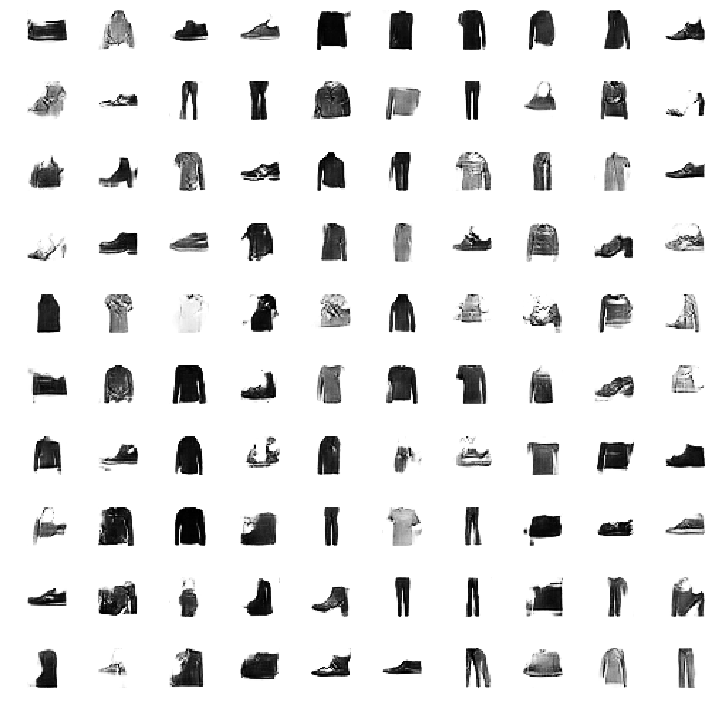

>Saved: wgan_generated_plot_0030.png and wgan_model_0030.h5
>31, 1/468, d1=-268.860, d2=245.871 g=-227.212
>31, 2/468, d1=-266.275, d2=250.773 g=-222.172
>31, 3/468, d1=-259.700, d2=245.487 g=-217.271
>31, 4/468, d1=-257.384, d2=239.412 g=-207.822
>31, 5/468, d1=-259.844, d2=243.553 g=-201.352
>31, 6/468, d1=-268.234, d2=236.700 g=-209.781
>31, 7/468, d1=-263.113, d2=241.719 g=-212.918
>31, 8/468, d1=-258.843, d2=241.588 g=-219.177
>31, 9/468, d1=-258.106, d2=244.263 g=-216.183
>31, 10/468, d1=-262.360, d2=250.208 g=-221.908
>31, 11/468, d1=-267.859, d2=251.285 g=-224.418
>31, 12/468, d1=-269.668, d2=253.257 g=-222.444
>31, 13/468, d1=-270.307, d2=253.359 g=-225.333
>31, 14/468, d1=-275.130, d2=253.456 g=-231.887
>31, 15/468, d1=-278.159, d2=260.344 g=-231.296
>31, 16/468, d1=-272.222, d2=251.355 g=-234.529
>31, 17/468, d1=-270.697, d2=249.910 g=-224.692
>31, 18/468, d1=-271.590, d2=249.802 g=-226.244
>31, 19/468, d1=-270.468, d2=252.906 g=-229.789
>31, 20/468, d1=-272.186, d2=253.161 

>31, 172/468, d1=-261.571, d2=246.648 g=-224.207
>31, 173/468, d1=-267.709, d2=249.341 g=-220.889
>31, 174/468, d1=-261.679, d2=240.916 g=-222.520
>31, 175/468, d1=-269.254, d2=245.272 g=-221.231
>31, 176/468, d1=-266.922, d2=244.135 g=-223.722
>31, 177/468, d1=-271.387, d2=246.031 g=-216.238
>31, 178/468, d1=-273.333, d2=245.157 g=-209.897
>31, 179/468, d1=-269.567, d2=252.811 g=-211.698
>31, 180/468, d1=-272.556, d2=252.174 g=-213.291
>31, 181/468, d1=-273.493, d2=250.480 g=-219.570
>31, 182/468, d1=-267.295, d2=251.862 g=-229.711
>31, 183/468, d1=-266.452, d2=254.578 g=-225.035
>31, 184/468, d1=-268.354, d2=249.219 g=-222.978
>31, 185/468, d1=-266.121, d2=246.923 g=-215.730
>31, 186/468, d1=-260.599, d2=244.751 g=-211.852
>31, 187/468, d1=-263.769, d2=246.985 g=-221.267
>31, 188/468, d1=-268.968, d2=246.244 g=-220.980
>31, 189/468, d1=-266.830, d2=247.882 g=-220.668
>31, 190/468, d1=-263.136, d2=247.402 g=-223.269
>31, 191/468, d1=-261.799, d2=244.407 g=-218.361
>31, 192/468, d1=-25

>31, 340/468, d1=-264.148, d2=251.385 g=-233.097
>31, 341/468, d1=-265.296, d2=245.724 g=-235.562
>31, 342/468, d1=-263.495, d2=249.830 g=-236.107
>31, 343/468, d1=-265.052, d2=251.045 g=-233.027
>31, 344/468, d1=-273.037, d2=252.039 g=-232.058
>31, 345/468, d1=-269.606, d2=250.757 g=-237.899
>31, 346/468, d1=-282.199, d2=254.674 g=-234.575
>31, 347/468, d1=-284.761, d2=259.510 g=-231.693
>31, 348/468, d1=-283.705, d2=265.391 g=-226.417
>31, 349/468, d1=-279.639, d2=267.485 g=-223.023
>31, 350/468, d1=-285.329, d2=264.857 g=-230.533
>31, 351/468, d1=-279.942, d2=265.052 g=-232.291
>31, 352/468, d1=-276.840, d2=259.290 g=-227.899
>31, 353/468, d1=-280.222, d2=264.713 g=-227.620
>31, 354/468, d1=-278.344, d2=256.324 g=-229.220
>31, 355/468, d1=-272.458, d2=259.003 g=-230.735
>31, 356/468, d1=-270.222, d2=260.525 g=-228.781
>31, 357/468, d1=-273.338, d2=250.059 g=-219.224
>31, 358/468, d1=-262.719, d2=250.429 g=-227.163
>31, 359/468, d1=-263.680, d2=248.852 g=-225.027
>31, 360/468, d1=-26

>32, 43/468, d1=-273.795, d2=251.838 g=-222.785
>32, 44/468, d1=-273.219, d2=248.366 g=-224.373
>32, 45/468, d1=-279.694, d2=257.088 g=-228.905
>32, 46/468, d1=-271.488, d2=250.374 g=-230.533
>32, 47/468, d1=-271.360, d2=257.766 g=-209.497
>32, 48/468, d1=-269.089, d2=249.541 g=-222.932
>32, 49/468, d1=-269.184, d2=251.735 g=-217.820
>32, 50/468, d1=-270.303, d2=255.455 g=-218.333
>32, 51/468, d1=-264.430, d2=253.595 g=-226.050
>32, 52/468, d1=-271.266, d2=252.224 g=-233.710
>32, 53/468, d1=-274.596, d2=257.768 g=-225.251
>32, 54/468, d1=-270.112, d2=255.266 g=-228.238
>32, 55/468, d1=-271.739, d2=253.145 g=-233.152
>32, 56/468, d1=-267.011, d2=252.308 g=-227.373
>32, 57/468, d1=-272.920, d2=252.090 g=-233.273
>32, 58/468, d1=-280.910, d2=252.950 g=-251.136
>32, 59/468, d1=-289.221, d2=266.507 g=-256.863
>32, 60/468, d1=-283.481, d2=260.696 g=-255.945
>32, 61/468, d1=-284.562, d2=256.729 g=-252.900
>32, 62/468, d1=-278.222, d2=262.970 g=-240.276
>32, 63/468, d1=-274.622, d2=260.689 g=-

>32, 214/468, d1=-278.067, d2=265.073 g=-236.368
>32, 215/468, d1=-275.405, d2=262.261 g=-239.378
>32, 216/468, d1=-279.637, d2=263.365 g=-234.127
>32, 217/468, d1=-286.038, d2=257.585 g=-238.248
>32, 218/468, d1=-274.902, d2=262.180 g=-237.070
>32, 219/468, d1=-282.803, d2=264.623 g=-240.554
>32, 220/468, d1=-279.634, d2=266.489 g=-242.315
>32, 221/468, d1=-282.146, d2=265.631 g=-238.286
>32, 222/468, d1=-276.101, d2=262.676 g=-242.232
>32, 223/468, d1=-271.922, d2=256.316 g=-237.052
>32, 224/468, d1=-278.096, d2=260.656 g=-238.994
>32, 225/468, d1=-278.051, d2=260.384 g=-237.666
>32, 226/468, d1=-287.354, d2=266.626 g=-242.676
>32, 227/468, d1=-276.993, d2=259.264 g=-233.817
>32, 228/468, d1=-279.426, d2=264.559 g=-233.281
>32, 229/468, d1=-276.272, d2=259.282 g=-230.072
>32, 230/468, d1=-271.558, d2=259.484 g=-226.069
>32, 231/468, d1=-270.545, d2=257.633 g=-231.186
>32, 232/468, d1=-276.219, d2=257.974 g=-231.114
>32, 233/468, d1=-278.084, d2=255.346 g=-232.156
>32, 234/468, d1=-27

>32, 382/468, d1=-285.003, d2=266.735 g=-239.581
>32, 383/468, d1=-286.439, d2=267.577 g=-238.432
>32, 384/468, d1=-286.334, d2=263.662 g=-243.618
>32, 385/468, d1=-291.371, d2=271.474 g=-242.578
>32, 386/468, d1=-284.434, d2=266.222 g=-241.741
>32, 387/468, d1=-285.466, d2=271.786 g=-242.195
>32, 388/468, d1=-290.126, d2=269.424 g=-243.064
>32, 389/468, d1=-286.520, d2=272.070 g=-245.393
>32, 390/468, d1=-287.080, d2=270.538 g=-251.239
>32, 391/468, d1=-286.284, d2=272.743 g=-248.363
>32, 392/468, d1=-285.480, d2=273.505 g=-249.090
>32, 393/468, d1=-296.820, d2=274.035 g=-256.709
>32, 394/468, d1=-291.945, d2=272.495 g=-250.676
>32, 395/468, d1=-291.644, d2=271.430 g=-246.623
>32, 396/468, d1=-289.633, d2=270.400 g=-236.869
>32, 397/468, d1=-281.362, d2=272.368 g=-246.582
>32, 398/468, d1=-286.021, d2=269.313 g=-239.951
>32, 399/468, d1=-280.863, d2=268.928 g=-242.269
>32, 400/468, d1=-288.160, d2=267.015 g=-252.008
>32, 401/468, d1=-290.268, d2=272.513 g=-248.319
>32, 402/468, d1=-28

>33, 85/468, d1=-294.862, d2=280.205 g=-258.059
>33, 86/468, d1=-291.652, d2=281.631 g=-243.720
>33, 87/468, d1=-299.021, d2=281.654 g=-250.320
>33, 88/468, d1=-295.426, d2=277.148 g=-255.354
>33, 89/468, d1=-293.550, d2=279.535 g=-249.927
>33, 90/468, d1=-293.781, d2=274.735 g=-239.711
>33, 91/468, d1=-291.887, d2=275.824 g=-255.633
>33, 92/468, d1=-290.142, d2=274.489 g=-248.583
>33, 93/468, d1=-289.964, d2=271.934 g=-244.906
>33, 94/468, d1=-290.443, d2=273.047 g=-243.525
>33, 95/468, d1=-287.497, d2=270.509 g=-248.345
>33, 96/468, d1=-286.673, d2=268.936 g=-242.055
>33, 97/468, d1=-285.386, d2=269.180 g=-243.020
>33, 98/468, d1=-281.277, d2=265.351 g=-238.957
>33, 99/468, d1=-284.424, d2=265.058 g=-239.961
>33, 100/468, d1=-286.964, d2=268.321 g=-245.179
>33, 101/468, d1=-281.096, d2=266.855 g=-244.060
>33, 102/468, d1=-289.694, d2=269.695 g=-242.963
>33, 103/468, d1=-284.846, d2=274.483 g=-243.838
>33, 104/468, d1=-288.635, d2=273.093 g=-242.557
>33, 105/468, d1=-284.237, d2=270.8

>33, 253/468, d1=-290.193, d2=270.666 g=-248.499
>33, 254/468, d1=-289.008, d2=267.998 g=-249.833
>33, 255/468, d1=-284.053, d2=264.635 g=-239.209
>33, 256/468, d1=-282.341, d2=266.633 g=-241.761
>33, 257/468, d1=-280.167, d2=261.962 g=-242.004
>33, 258/468, d1=-283.094, d2=267.616 g=-246.878
>33, 259/468, d1=-283.104, d2=271.793 g=-247.741
>33, 260/468, d1=-286.984, d2=272.029 g=-248.122
>33, 261/468, d1=-287.819, d2=270.612 g=-241.364
>33, 262/468, d1=-285.801, d2=269.845 g=-251.050
>33, 263/468, d1=-288.687, d2=268.833 g=-249.760
>33, 264/468, d1=-288.888, d2=269.485 g=-245.253
>33, 265/468, d1=-289.618, d2=275.068 g=-241.983
>33, 266/468, d1=-284.663, d2=274.986 g=-242.019
>33, 267/468, d1=-287.312, d2=270.623 g=-244.789
>33, 268/468, d1=-284.969, d2=267.951 g=-236.385
>33, 269/468, d1=-283.253, d2=269.827 g=-233.076
>33, 270/468, d1=-283.324, d2=268.401 g=-240.026
>33, 271/468, d1=-283.526, d2=269.109 g=-246.464
>33, 272/468, d1=-288.967, d2=263.118 g=-245.309
>33, 273/468, d1=-28

>33, 421/468, d1=-294.853, d2=275.991 g=-245.100
>33, 422/468, d1=-289.149, d2=275.213 g=-248.347
>33, 423/468, d1=-286.645, d2=276.556 g=-247.230
>33, 424/468, d1=-289.383, d2=273.720 g=-252.981
>33, 425/468, d1=-288.015, d2=270.750 g=-251.808
>33, 426/468, d1=-292.540, d2=270.838 g=-249.065
>33, 427/468, d1=-288.924, d2=273.278 g=-250.375
>33, 428/468, d1=-291.981, d2=276.394 g=-249.600
>33, 429/468, d1=-297.654, d2=277.249 g=-256.674
>33, 430/468, d1=-292.245, d2=272.585 g=-248.532
>33, 431/468, d1=-291.577, d2=271.416 g=-249.888
>33, 432/468, d1=-289.984, d2=276.276 g=-244.680
>33, 433/468, d1=-289.033, d2=276.284 g=-251.907
>33, 434/468, d1=-289.975, d2=270.993 g=-239.973
>33, 435/468, d1=-285.979, d2=272.352 g=-246.713
>33, 436/468, d1=-291.279, d2=267.964 g=-246.494
>33, 437/468, d1=-292.137, d2=274.401 g=-243.741
>33, 438/468, d1=-291.723, d2=282.174 g=-249.266
>33, 439/468, d1=-290.698, d2=272.147 g=-259.236
>33, 440/468, d1=-291.861, d2=279.813 g=-254.717
>33, 441/468, d1=-29

>34, 124/468, d1=-291.274, d2=283.165 g=-250.218
>34, 125/468, d1=-293.705, d2=279.527 g=-246.537
>34, 126/468, d1=-295.686, d2=272.128 g=-244.384
>34, 127/468, d1=-296.315, d2=274.061 g=-241.463
>34, 128/468, d1=-289.834, d2=279.092 g=-251.768
>34, 129/468, d1=-294.204, d2=279.846 g=-251.719
>34, 130/468, d1=-294.744, d2=281.913 g=-253.548
>34, 131/468, d1=-297.059, d2=285.251 g=-257.306
>34, 132/468, d1=-298.267, d2=281.351 g=-256.200
>34, 133/468, d1=-301.692, d2=274.746 g=-255.538
>34, 134/468, d1=-295.478, d2=279.368 g=-254.921
>34, 135/468, d1=-298.216, d2=286.259 g=-259.583
>34, 136/468, d1=-293.263, d2=276.799 g=-243.773
>34, 137/468, d1=-293.546, d2=280.716 g=-249.489
>34, 138/468, d1=-294.360, d2=277.548 g=-258.386
>34, 139/468, d1=-293.749, d2=279.851 g=-254.198
>34, 140/468, d1=-296.699, d2=282.814 g=-255.158
>34, 141/468, d1=-298.765, d2=279.502 g=-254.156
>34, 142/468, d1=-296.258, d2=282.150 g=-257.832
>34, 143/468, d1=-297.084, d2=279.187 g=-258.966
>34, 144/468, d1=-29

>34, 292/468, d1=-298.334, d2=278.860 g=-256.158
>34, 293/468, d1=-295.690, d2=280.628 g=-258.185
>34, 294/468, d1=-298.697, d2=283.383 g=-258.863
>34, 295/468, d1=-299.308, d2=282.836 g=-253.903
>34, 296/468, d1=-304.550, d2=287.492 g=-267.652
>34, 297/468, d1=-307.419, d2=292.540 g=-259.065
>34, 298/468, d1=-306.019, d2=296.911 g=-261.232
>34, 299/468, d1=-302.023, d2=289.087 g=-255.802
>34, 300/468, d1=-296.260, d2=280.317 g=-253.496
>34, 301/468, d1=-292.482, d2=274.422 g=-246.699
>34, 302/468, d1=-295.580, d2=274.607 g=-251.263
>34, 303/468, d1=-292.525, d2=274.990 g=-255.311
>34, 304/468, d1=-297.619, d2=279.351 g=-249.841
>34, 305/468, d1=-297.777, d2=283.221 g=-250.927
>34, 306/468, d1=-297.764, d2=281.192 g=-256.626
>34, 307/468, d1=-301.040, d2=282.506 g=-252.989
>34, 308/468, d1=-302.337, d2=284.703 g=-266.929
>34, 309/468, d1=-300.899, d2=287.886 g=-262.291
>34, 310/468, d1=-300.804, d2=286.553 g=-254.015
>34, 311/468, d1=-297.522, d2=286.971 g=-259.757
>34, 312/468, d1=-29

>34, 460/468, d1=-300.063, d2=286.194 g=-260.118
>34, 461/468, d1=-298.616, d2=282.920 g=-259.535
>34, 462/468, d1=-297.957, d2=283.937 g=-261.573
>34, 463/468, d1=-301.999, d2=283.085 g=-259.906
>34, 464/468, d1=-295.590, d2=282.610 g=-258.872
>34, 465/468, d1=-300.578, d2=284.533 g=-257.603
>34, 466/468, d1=-297.012, d2=282.315 g=-257.069
>34, 467/468, d1=-298.142, d2=282.345 g=-250.978
>34, 468/468, d1=-297.831, d2=281.909 g=-251.439
>35, 1/468, d1=-292.988, d2=279.897 g=-250.416
>35, 2/468, d1=-288.494, d2=276.256 g=-253.659
>35, 3/468, d1=-291.512, d2=276.758 g=-253.434
>35, 4/468, d1=-292.904, d2=277.298 g=-254.670
>35, 5/468, d1=-294.554, d2=278.781 g=-260.388
>35, 6/468, d1=-292.577, d2=276.909 g=-266.100
>35, 7/468, d1=-294.559, d2=280.762 g=-261.470
>35, 8/468, d1=-299.140, d2=284.992 g=-258.467
>35, 9/468, d1=-297.194, d2=287.085 g=-259.346
>35, 10/468, d1=-300.854, d2=285.827 g=-258.955
>35, 11/468, d1=-303.934, d2=285.284 g=-259.896
>35, 12/468, d1=-300.413, d2=287.570 g=-

>35, 163/468, d1=-301.529, d2=284.650 g=-265.225
>35, 164/468, d1=-296.300, d2=280.139 g=-269.671
>35, 165/468, d1=-301.301, d2=282.282 g=-276.690
>35, 166/468, d1=-305.560, d2=288.344 g=-272.675
>35, 167/468, d1=-302.037, d2=290.420 g=-265.031
>35, 168/468, d1=-309.035, d2=283.610 g=-273.041
>35, 169/468, d1=-299.972, d2=287.558 g=-262.327
>35, 170/468, d1=-301.415, d2=282.809 g=-248.293
>35, 171/468, d1=-299.877, d2=282.693 g=-247.400
>35, 172/468, d1=-303.279, d2=285.462 g=-253.582
>35, 173/468, d1=-302.237, d2=280.551 g=-250.808
>35, 174/468, d1=-305.971, d2=274.987 g=-261.177
>35, 175/468, d1=-301.019, d2=281.662 g=-271.927
>35, 176/468, d1=-317.071, d2=297.856 g=-284.916
>35, 177/468, d1=-319.313, d2=292.348 g=-283.163
>35, 178/468, d1=-322.009, d2=299.758 g=-290.894
>35, 179/468, d1=-320.898, d2=302.598 g=-272.223
>35, 180/468, d1=-316.916, d2=310.208 g=-276.134
>35, 181/468, d1=-317.831, d2=302.012 g=-281.405
>35, 182/468, d1=-322.571, d2=305.648 g=-277.984
>35, 183/468, d1=-32

>35, 331/468, d1=-302.037, d2=288.578 g=-271.491
>35, 332/468, d1=-311.787, d2=288.788 g=-271.343
>35, 333/468, d1=-307.776, d2=290.598 g=-267.094
>35, 334/468, d1=-312.009, d2=291.347 g=-265.806
>35, 335/468, d1=-309.589, d2=291.883 g=-259.726
>35, 336/468, d1=-305.472, d2=291.268 g=-259.820
>35, 337/468, d1=-306.649, d2=290.467 g=-267.220
>35, 338/468, d1=-307.725, d2=291.830 g=-270.368
>35, 339/468, d1=-304.020, d2=288.919 g=-268.178
>35, 340/468, d1=-305.934, d2=290.091 g=-264.879
>35, 341/468, d1=-306.518, d2=288.187 g=-269.532
>35, 342/468, d1=-305.816, d2=288.591 g=-274.164
>35, 343/468, d1=-305.770, d2=292.288 g=-264.991
>35, 344/468, d1=-302.491, d2=291.958 g=-271.125
>35, 345/468, d1=-307.787, d2=290.627 g=-266.100
>35, 346/468, d1=-305.791, d2=291.142 g=-264.565
>35, 347/468, d1=-309.184, d2=292.300 g=-271.425
>35, 348/468, d1=-310.548, d2=292.765 g=-269.214
>35, 349/468, d1=-310.363, d2=293.214 g=-265.745
>35, 350/468, d1=-306.709, d2=294.330 g=-259.657
>35, 351/468, d1=-30

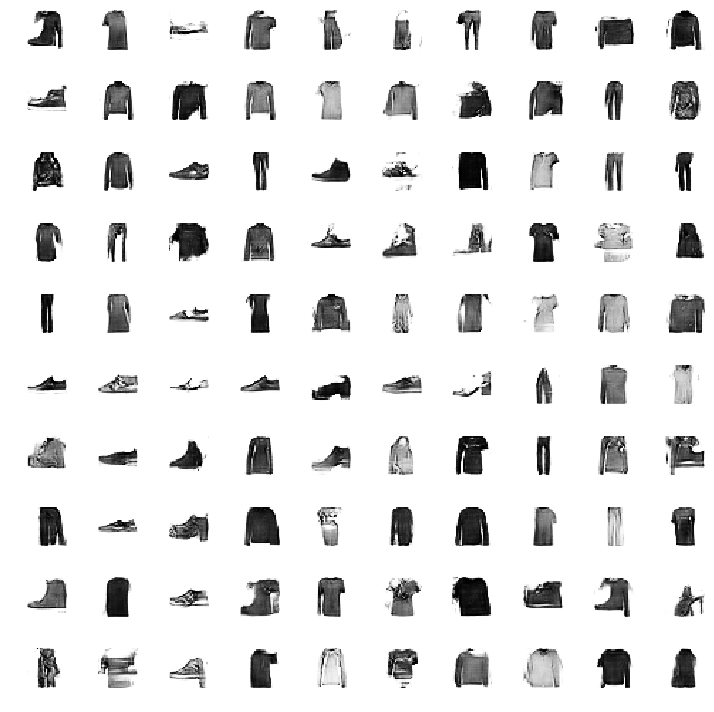

>Saved: wgan_generated_plot_0035.png and wgan_model_0035.h5
>36, 1/468, d1=-306.617, d2=290.198 g=-276.603
>36, 2/468, d1=-308.913, d2=289.235 g=-275.094
>36, 3/468, d1=-308.198, d2=293.657 g=-262.482
>36, 4/468, d1=-311.092, d2=294.677 g=-267.556
>36, 5/468, d1=-308.354, d2=296.294 g=-271.484
>36, 6/468, d1=-304.060, d2=291.154 g=-267.846
>36, 7/468, d1=-310.156, d2=295.253 g=-268.894
>36, 8/468, d1=-305.853, d2=294.517 g=-257.685
>36, 9/468, d1=-308.214, d2=292.105 g=-260.669
>36, 10/468, d1=-306.343, d2=295.396 g=-270.350
>36, 11/468, d1=-307.404, d2=292.026 g=-266.272
>36, 12/468, d1=-302.893, d2=295.270 g=-270.102
>36, 13/468, d1=-311.099, d2=293.320 g=-274.572
>36, 14/468, d1=-304.766, d2=290.859 g=-270.690
>36, 15/468, d1=-309.438, d2=292.885 g=-274.584
>36, 16/468, d1=-306.507, d2=291.712 g=-276.152
>36, 17/468, d1=-308.503, d2=296.542 g=-269.981
>36, 18/468, d1=-308.419, d2=293.933 g=-274.182
>36, 19/468, d1=-309.451, d2=296.527 g=-273.712
>36, 20/468, d1=-311.393, d2=292.627 

>36, 171/468, d1=-308.085, d2=288.133 g=-276.703
>36, 172/468, d1=-310.181, d2=292.583 g=-277.046
>36, 173/468, d1=-310.173, d2=282.908 g=-269.012
>36, 174/468, d1=-307.451, d2=294.149 g=-262.772
>36, 175/468, d1=-315.007, d2=293.611 g=-272.839
>36, 176/468, d1=-308.859, d2=293.085 g=-271.174
>36, 177/468, d1=-312.462, d2=301.007 g=-264.710
>36, 178/468, d1=-310.727, d2=297.520 g=-268.110
>36, 179/468, d1=-318.977, d2=297.116 g=-278.987
>36, 180/468, d1=-307.590, d2=299.294 g=-269.808
>36, 181/468, d1=-320.561, d2=296.313 g=-260.297
>36, 182/468, d1=-312.674, d2=298.006 g=-277.277
>36, 183/468, d1=-298.053, d2=289.104 g=-268.285
>36, 184/468, d1=-309.458, d2=294.746 g=-267.283
>36, 185/468, d1=-311.051, d2=298.014 g=-277.778
>36, 186/468, d1=-312.204, d2=296.679 g=-276.742
>36, 187/468, d1=-308.873, d2=298.144 g=-273.437
>36, 188/468, d1=-309.166, d2=294.932 g=-272.800
>36, 189/468, d1=-310.409, d2=291.991 g=-266.648
>36, 190/468, d1=-308.592, d2=291.406 g=-266.081
>36, 191/468, d1=-30

>36, 339/468, d1=-312.928, d2=299.166 g=-278.809
>36, 340/468, d1=-315.268, d2=301.165 g=-270.258
>36, 341/468, d1=-317.304, d2=293.499 g=-280.088
>36, 342/468, d1=-308.874, d2=298.491 g=-270.151
>36, 343/468, d1=-310.311, d2=297.873 g=-267.568
>36, 344/468, d1=-309.845, d2=294.144 g=-262.906
>36, 345/468, d1=-313.207, d2=296.514 g=-275.251
>36, 346/468, d1=-311.489, d2=293.803 g=-275.982
>36, 347/468, d1=-312.852, d2=293.766 g=-278.539
>36, 348/468, d1=-313.221, d2=293.804 g=-280.429
>36, 349/468, d1=-313.288, d2=293.765 g=-288.315
>36, 350/468, d1=-324.906, d2=302.672 g=-280.854
>36, 351/468, d1=-324.611, d2=304.875 g=-289.126
>36, 352/468, d1=-321.324, d2=302.279 g=-281.500
>36, 353/468, d1=-318.053, d2=305.718 g=-291.054
>36, 354/468, d1=-318.695, d2=308.851 g=-280.954
>36, 355/468, d1=-319.939, d2=300.476 g=-283.296
>36, 356/468, d1=-316.899, d2=300.004 g=-276.580
>36, 357/468, d1=-314.270, d2=300.714 g=-270.473
>36, 358/468, d1=-315.647, d2=298.398 g=-274.207
>36, 359/468, d1=-31

>37, 42/468, d1=-348.726, d2=320.708 g=-272.490
>37, 43/468, d1=-337.080, d2=327.184 g=-277.031
>37, 44/468, d1=-337.172, d2=328.060 g=-282.385
>37, 45/468, d1=-337.868, d2=324.697 g=-297.204
>37, 46/468, d1=-333.410, d2=330.406 g=-296.934
>37, 47/468, d1=-339.250, d2=328.479 g=-295.757
>37, 48/468, d1=-335.334, d2=323.452 g=-291.493
>37, 49/468, d1=-330.452, d2=320.264 g=-293.764
>37, 50/468, d1=-332.652, d2=314.997 g=-289.548
>37, 51/468, d1=-332.951, d2=315.436 g=-292.240
>37, 52/468, d1=-328.737, d2=313.541 g=-287.756
>37, 53/468, d1=-326.885, d2=315.184 g=-295.117
>37, 54/468, d1=-327.482, d2=309.283 g=-291.746
>37, 55/468, d1=-322.939, d2=304.961 g=-284.528
>37, 56/468, d1=-323.007, d2=309.543 g=-282.474
>37, 57/468, d1=-321.707, d2=308.308 g=-275.942
>37, 58/468, d1=-325.247, d2=304.621 g=-279.800
>37, 59/468, d1=-323.407, d2=306.598 g=-281.195
>37, 60/468, d1=-318.040, d2=305.091 g=-281.357
>37, 61/468, d1=-315.456, d2=309.059 g=-283.309
>37, 62/468, d1=-320.422, d2=308.513 g=-

>37, 213/468, d1=-326.939, d2=308.124 g=-287.390
>37, 214/468, d1=-320.764, d2=313.272 g=-289.421
>37, 215/468, d1=-326.299, d2=311.421 g=-288.305
>37, 216/468, d1=-322.694, d2=308.489 g=-288.359
>37, 217/468, d1=-321.710, d2=313.822 g=-285.360
>37, 218/468, d1=-322.767, d2=305.362 g=-282.252
>37, 219/468, d1=-319.496, d2=306.182 g=-273.222
>37, 220/468, d1=-321.336, d2=305.127 g=-280.720
>37, 221/468, d1=-320.919, d2=304.555 g=-286.293
>37, 222/468, d1=-320.703, d2=307.674 g=-287.617
>37, 223/468, d1=-322.302, d2=308.996 g=-285.994
>37, 224/468, d1=-318.457, d2=308.240 g=-282.432
>37, 225/468, d1=-323.329, d2=309.761 g=-289.145
>37, 226/468, d1=-323.793, d2=311.042 g=-285.162
>37, 227/468, d1=-324.469, d2=308.938 g=-285.044
>37, 228/468, d1=-325.732, d2=311.983 g=-288.380
>37, 229/468, d1=-325.278, d2=312.851 g=-281.024
>37, 230/468, d1=-326.210, d2=311.780 g=-283.304
>37, 231/468, d1=-325.778, d2=311.698 g=-288.864
>37, 232/468, d1=-326.090, d2=313.540 g=-279.403
>37, 233/468, d1=-33

>37, 381/468, d1=-327.686, d2=318.306 g=-293.732
>37, 382/468, d1=-328.084, d2=311.766 g=-297.891
>37, 383/468, d1=-329.926, d2=315.482 g=-296.820
>37, 384/468, d1=-333.143, d2=317.943 g=-284.369
>37, 385/468, d1=-328.392, d2=317.604 g=-295.426
>37, 386/468, d1=-335.784, d2=317.289 g=-293.709
>37, 387/468, d1=-332.051, d2=317.990 g=-292.005
>37, 388/468, d1=-333.263, d2=314.885 g=-290.707
>37, 389/468, d1=-329.472, d2=318.490 g=-294.644
>37, 390/468, d1=-331.114, d2=316.863 g=-299.826
>37, 391/468, d1=-330.270, d2=312.606 g=-291.935
>37, 392/468, d1=-328.553, d2=319.166 g=-293.127
>37, 393/468, d1=-326.184, d2=316.372 g=-300.211
>37, 394/468, d1=-328.397, d2=311.044 g=-290.493
>37, 395/468, d1=-327.889, d2=315.209 g=-289.810
>37, 396/468, d1=-327.433, d2=314.899 g=-291.745
>37, 397/468, d1=-327.324, d2=311.608 g=-290.371
>37, 398/468, d1=-324.277, d2=311.929 g=-275.741
>37, 399/468, d1=-322.787, d2=308.023 g=-275.250
>37, 400/468, d1=-325.682, d2=309.759 g=-280.481
>37, 401/468, d1=-32

>38, 84/468, d1=-333.891, d2=321.913 g=-296.817
>38, 85/468, d1=-336.424, d2=317.682 g=-292.948
>38, 86/468, d1=-328.135, d2=319.432 g=-295.581
>38, 87/468, d1=-338.305, d2=322.012 g=-295.431
>38, 88/468, d1=-337.216, d2=323.294 g=-293.852
>38, 89/468, d1=-337.515, d2=320.500 g=-301.417
>38, 90/468, d1=-331.284, d2=324.838 g=-298.600
>38, 91/468, d1=-337.076, d2=321.657 g=-291.087
>38, 92/468, d1=-335.275, d2=322.815 g=-287.932
>38, 93/468, d1=-334.341, d2=321.079 g=-288.695
>38, 94/468, d1=-325.043, d2=319.430 g=-292.680
>38, 95/468, d1=-332.310, d2=319.930 g=-290.232
>38, 96/468, d1=-331.551, d2=313.174 g=-295.734
>38, 97/468, d1=-336.416, d2=319.731 g=-290.587
>38, 98/468, d1=-327.885, d2=318.449 g=-298.292
>38, 99/468, d1=-336.096, d2=322.202 g=-298.704
>38, 100/468, d1=-331.794, d2=320.801 g=-295.182
>38, 101/468, d1=-331.462, d2=321.654 g=-296.044
>38, 102/468, d1=-335.075, d2=322.246 g=-296.426
>38, 103/468, d1=-335.570, d2=321.603 g=-294.511
>38, 104/468, d1=-334.947, d2=318.48

>38, 252/468, d1=-346.246, d2=332.529 g=-301.991
>38, 253/468, d1=-342.498, d2=329.017 g=-301.273
>38, 254/468, d1=-340.351, d2=328.042 g=-306.408
>38, 255/468, d1=-338.695, d2=322.505 g=-295.075
>38, 256/468, d1=-336.029, d2=326.732 g=-303.066
>38, 257/468, d1=-340.730, d2=327.963 g=-304.813
>38, 258/468, d1=-340.332, d2=325.383 g=-296.758
>38, 259/468, d1=-338.744, d2=323.652 g=-304.325
>38, 260/468, d1=-335.173, d2=322.534 g=-310.801
>38, 261/468, d1=-334.710, d2=322.822 g=-303.548
>38, 262/468, d1=-337.466, d2=327.463 g=-310.509
>38, 263/468, d1=-337.495, d2=325.848 g=-297.886
>38, 264/468, d1=-340.468, d2=322.705 g=-309.453
>38, 265/468, d1=-337.335, d2=325.904 g=-297.595
>38, 266/468, d1=-341.758, d2=321.502 g=-302.681
>38, 267/468, d1=-337.380, d2=324.441 g=-299.976
>38, 268/468, d1=-337.839, d2=323.352 g=-298.499
>38, 269/468, d1=-335.934, d2=322.069 g=-296.888
>38, 270/468, d1=-334.779, d2=326.715 g=-297.307
>38, 271/468, d1=-333.835, d2=320.569 g=-292.889
>38, 272/468, d1=-33

>38, 420/468, d1=-333.221, d2=324.113 g=-299.683
>38, 421/468, d1=-330.283, d2=324.333 g=-297.258
>38, 422/468, d1=-334.246, d2=324.820 g=-299.892
>38, 423/468, d1=-335.600, d2=324.113 g=-290.581
>38, 424/468, d1=-335.806, d2=322.624 g=-299.679
>38, 425/468, d1=-338.641, d2=323.083 g=-299.194
>38, 426/468, d1=-339.119, d2=323.955 g=-302.032
>38, 427/468, d1=-339.831, d2=327.527 g=-308.986
>38, 428/468, d1=-335.139, d2=323.578 g=-293.273
>38, 429/468, d1=-333.235, d2=316.742 g=-294.530
>38, 430/468, d1=-331.287, d2=317.463 g=-293.118
>38, 431/468, d1=-327.395, d2=318.069 g=-293.103
>38, 432/468, d1=-325.801, d2=314.888 g=-288.761
>38, 433/468, d1=-330.909, d2=320.844 g=-290.114
>38, 434/468, d1=-330.095, d2=318.385 g=-301.642
>38, 435/468, d1=-335.110, d2=318.331 g=-301.151
>38, 436/468, d1=-337.341, d2=320.376 g=-298.475
>38, 437/468, d1=-330.825, d2=322.486 g=-293.585
>38, 438/468, d1=-335.030, d2=323.703 g=-304.729
>38, 439/468, d1=-336.207, d2=320.916 g=-285.123
>38, 440/468, d1=-33

>39, 123/468, d1=-346.049, d2=328.929 g=-301.647
>39, 124/468, d1=-343.902, d2=329.878 g=-308.250
>39, 125/468, d1=-343.195, d2=329.159 g=-302.664
>39, 126/468, d1=-338.157, d2=323.809 g=-304.342
>39, 127/468, d1=-344.567, d2=330.292 g=-312.951
>39, 128/468, d1=-336.625, d2=332.472 g=-298.078
>39, 129/468, d1=-338.625, d2=330.547 g=-305.543
>39, 130/468, d1=-335.940, d2=324.766 g=-301.059
>39, 131/468, d1=-342.857, d2=325.781 g=-299.516
>39, 132/468, d1=-343.063, d2=327.262 g=-305.775
>39, 133/468, d1=-342.332, d2=330.057 g=-309.452
>39, 134/468, d1=-340.754, d2=330.349 g=-303.366
>39, 135/468, d1=-336.745, d2=328.040 g=-307.717
>39, 136/468, d1=-346.008, d2=326.110 g=-298.121
>39, 137/468, d1=-339.034, d2=322.704 g=-301.566
>39, 138/468, d1=-338.835, d2=325.313 g=-307.671
>39, 139/468, d1=-339.085, d2=323.807 g=-301.127
>39, 140/468, d1=-338.942, d2=327.706 g=-304.219
>39, 141/468, d1=-342.685, d2=324.318 g=-307.302
>39, 142/468, d1=-345.395, d2=328.631 g=-313.784
>39, 143/468, d1=-34

>39, 291/468, d1=-338.641, d2=324.924 g=-303.320
>39, 292/468, d1=-333.585, d2=324.105 g=-306.488
>39, 293/468, d1=-329.487, d2=318.681 g=-304.942
>39, 294/468, d1=-336.843, d2=323.406 g=-293.837
>39, 295/468, d1=-334.505, d2=325.543 g=-301.305
>39, 296/468, d1=-335.722, d2=321.133 g=-297.323
>39, 297/468, d1=-337.972, d2=324.588 g=-298.702
>39, 298/468, d1=-333.326, d2=321.324 g=-304.144
>39, 299/468, d1=-335.994, d2=321.599 g=-301.561
>39, 300/468, d1=-334.778, d2=323.102 g=-295.039
>39, 301/468, d1=-338.043, d2=325.693 g=-298.650
>39, 302/468, d1=-340.305, d2=321.543 g=-300.678
>39, 303/468, d1=-337.957, d2=325.471 g=-301.626
>39, 304/468, d1=-343.172, d2=327.022 g=-294.280
>39, 305/468, d1=-341.354, d2=327.709 g=-306.001
>39, 306/468, d1=-345.249, d2=326.446 g=-307.007
>39, 307/468, d1=-338.440, d2=328.770 g=-306.157
>39, 308/468, d1=-339.160, d2=324.835 g=-297.482
>39, 309/468, d1=-338.983, d2=323.609 g=-299.540
>39, 310/468, d1=-336.646, d2=322.019 g=-305.008
>39, 311/468, d1=-33

>39, 459/468, d1=-344.275, d2=326.993 g=-309.153
>39, 460/468, d1=-337.827, d2=333.900 g=-309.181
>39, 461/468, d1=-347.789, d2=337.823 g=-310.481
>39, 462/468, d1=-342.139, d2=335.450 g=-314.080
>39, 463/468, d1=-346.598, d2=328.863 g=-309.101
>39, 464/468, d1=-346.212, d2=330.531 g=-307.198
>39, 465/468, d1=-345.425, d2=332.334 g=-309.319
>39, 466/468, d1=-344.975, d2=335.520 g=-307.136
>39, 467/468, d1=-342.064, d2=330.839 g=-305.319
>39, 468/468, d1=-341.454, d2=328.004 g=-297.943
>40, 1/468, d1=-342.062, d2=329.405 g=-296.292
>40, 2/468, d1=-339.116, d2=323.290 g=-308.536
>40, 3/468, d1=-341.357, d2=334.403 g=-308.889
>40, 4/468, d1=-347.334, d2=336.534 g=-307.787
>40, 5/468, d1=-352.410, d2=332.770 g=-314.048
>40, 6/468, d1=-345.703, d2=334.991 g=-308.649
>40, 7/468, d1=-345.720, d2=330.347 g=-311.396
>40, 8/468, d1=-354.481, d2=331.881 g=-309.947
>40, 9/468, d1=-345.557, d2=337.176 g=-309.864
>40, 10/468, d1=-344.225, d2=331.475 g=-309.893
>40, 11/468, d1=-351.249, d2=330.798 g=

>40, 162/468, d1=-351.415, d2=334.102 g=-317.565
>40, 163/468, d1=-347.608, d2=336.726 g=-313.917
>40, 164/468, d1=-346.648, d2=336.011 g=-308.615
>40, 165/468, d1=-341.605, d2=333.950 g=-311.710
>40, 166/468, d1=-348.541, d2=332.979 g=-302.208
>40, 167/468, d1=-353.175, d2=329.155 g=-310.946
>40, 168/468, d1=-342.293, d2=329.504 g=-305.817
>40, 169/468, d1=-346.286, d2=336.844 g=-304.568
>40, 170/468, d1=-339.193, d2=332.627 g=-314.110
>40, 171/468, d1=-347.827, d2=336.109 g=-309.352
>40, 172/468, d1=-346.364, d2=332.950 g=-313.027
>40, 173/468, d1=-352.501, d2=334.498 g=-315.233
>40, 174/468, d1=-341.918, d2=330.397 g=-316.397
>40, 175/468, d1=-343.186, d2=334.344 g=-304.450
>40, 176/468, d1=-348.537, d2=331.465 g=-316.927
>40, 177/468, d1=-347.240, d2=334.009 g=-319.631
>40, 178/468, d1=-346.518, d2=336.404 g=-315.578
>40, 179/468, d1=-349.561, d2=334.694 g=-322.484
>40, 180/468, d1=-347.981, d2=332.936 g=-321.385
>40, 181/468, d1=-345.561, d2=332.964 g=-319.013
>40, 182/468, d1=-34

>40, 330/468, d1=-346.963, d2=334.957 g=-313.419
>40, 331/468, d1=-351.338, d2=341.871 g=-314.959
>40, 332/468, d1=-355.139, d2=337.137 g=-314.726
>40, 333/468, d1=-349.561, d2=341.455 g=-309.699
>40, 334/468, d1=-352.510, d2=338.949 g=-314.454
>40, 335/468, d1=-348.606, d2=338.432 g=-311.915
>40, 336/468, d1=-353.800, d2=338.129 g=-310.004
>40, 337/468, d1=-351.697, d2=340.575 g=-314.085
>40, 338/468, d1=-347.395, d2=336.014 g=-320.372
>40, 339/468, d1=-351.884, d2=341.380 g=-318.558
>40, 340/468, d1=-350.547, d2=339.246 g=-319.023
>40, 341/468, d1=-352.214, d2=342.881 g=-313.746
>40, 342/468, d1=-350.346, d2=337.965 g=-319.766
>40, 343/468, d1=-356.859, d2=344.154 g=-317.112
>40, 344/468, d1=-355.062, d2=345.681 g=-327.559
>40, 345/468, d1=-353.672, d2=346.483 g=-320.852
>40, 346/468, d1=-357.141, d2=348.714 g=-318.028
>40, 347/468, d1=-357.348, d2=340.875 g=-320.625
>40, 348/468, d1=-355.406, d2=346.049 g=-316.811
>40, 349/468, d1=-356.007, d2=339.763 g=-311.429
>40, 350/468, d1=-35

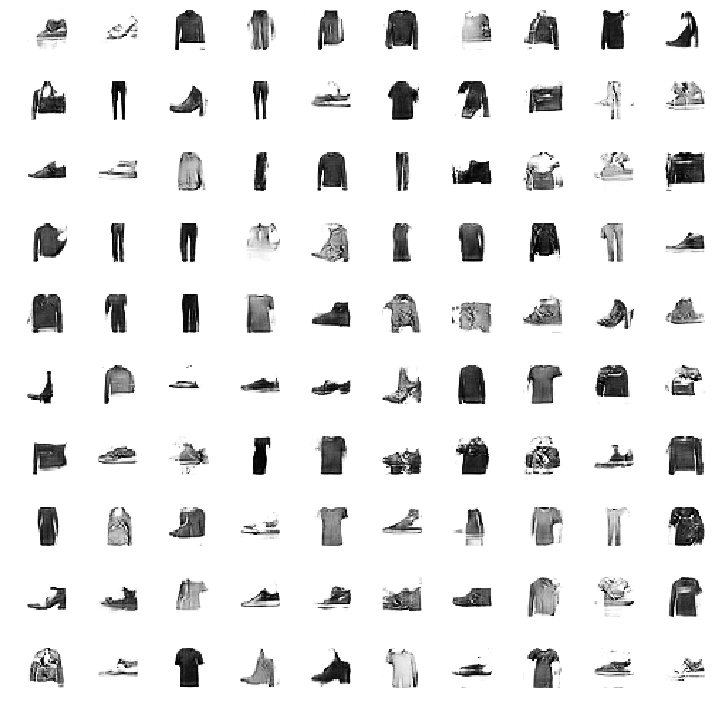

>Saved: wgan_generated_plot_0040.png and wgan_model_0040.h5
>41, 1/468, d1=-362.165, d2=350.892 g=-331.844
>41, 2/468, d1=-363.579, d2=348.938 g=-325.510
>41, 3/468, d1=-362.046, d2=351.315 g=-324.828
>41, 4/468, d1=-360.546, d2=347.434 g=-317.841
>41, 5/468, d1=-363.161, d2=348.026 g=-309.019
>41, 6/468, d1=-363.970, d2=345.828 g=-322.866
>41, 7/468, d1=-362.164, d2=345.976 g=-320.946
>41, 8/468, d1=-358.951, d2=344.009 g=-321.215
>41, 9/468, d1=-360.506, d2=343.573 g=-322.617
>41, 10/468, d1=-359.764, d2=346.714 g=-324.359
>41, 11/468, d1=-358.821, d2=348.379 g=-334.466
>41, 12/468, d1=-358.155, d2=346.385 g=-323.556
>41, 13/468, d1=-353.178, d2=344.368 g=-324.917
>41, 14/468, d1=-361.291, d2=347.160 g=-316.678
>41, 15/468, d1=-361.354, d2=346.364 g=-321.484
>41, 16/468, d1=-364.202, d2=346.797 g=-323.574
>41, 17/468, d1=-357.334, d2=353.560 g=-319.334
>41, 18/468, d1=-358.581, d2=349.813 g=-324.407
>41, 19/468, d1=-357.317, d2=348.777 g=-320.811
>41, 20/468, d1=-361.183, d2=344.075 

>41, 172/468, d1=-362.549, d2=350.045 g=-331.223
>41, 173/468, d1=-354.828, d2=345.755 g=-313.555
>41, 174/468, d1=-355.418, d2=339.546 g=-314.672
>41, 175/468, d1=-359.556, d2=339.575 g=-309.342
>41, 176/468, d1=-354.412, d2=347.921 g=-315.142
>41, 177/468, d1=-361.488, d2=337.462 g=-310.169
>41, 178/468, d1=-355.071, d2=350.047 g=-323.281
>41, 179/468, d1=-356.201, d2=350.288 g=-328.646
>41, 180/468, d1=-360.563, d2=352.233 g=-325.498
>41, 181/468, d1=-359.148, d2=345.860 g=-330.222
>41, 182/468, d1=-366.606, d2=346.444 g=-337.153
>41, 183/468, d1=-366.476, d2=349.587 g=-328.678
>41, 184/468, d1=-364.494, d2=349.785 g=-327.156
>41, 185/468, d1=-365.409, d2=355.573 g=-325.610
>41, 186/468, d1=-372.606, d2=360.039 g=-322.541
>41, 187/468, d1=-365.016, d2=352.210 g=-320.063
>41, 188/468, d1=-365.385, d2=354.981 g=-335.710
>41, 189/468, d1=-367.760, d2=353.763 g=-330.743
>41, 190/468, d1=-371.814, d2=355.804 g=-338.268
>41, 191/468, d1=-361.668, d2=356.541 g=-330.392
>41, 192/468, d1=-36

>41, 340/468, d1=-362.064, d2=350.731 g=-322.972
>41, 341/468, d1=-362.682, d2=343.504 g=-327.912
>41, 342/468, d1=-358.280, d2=349.985 g=-326.986
>41, 343/468, d1=-363.977, d2=351.301 g=-329.909
>41, 344/468, d1=-363.048, d2=350.546 g=-327.810
>41, 345/468, d1=-366.415, d2=343.436 g=-332.230
>41, 346/468, d1=-359.372, d2=347.023 g=-336.090
>41, 347/468, d1=-355.835, d2=346.567 g=-334.741
>41, 348/468, d1=-357.464, d2=349.610 g=-320.890
>41, 349/468, d1=-358.335, d2=344.196 g=-313.907
>41, 350/468, d1=-358.768, d2=345.528 g=-313.568
>41, 351/468, d1=-357.469, d2=345.571 g=-319.025
>41, 352/468, d1=-359.835, d2=346.304 g=-319.098
>41, 353/468, d1=-353.893, d2=342.564 g=-323.562
>41, 354/468, d1=-355.890, d2=345.132 g=-324.565
>41, 355/468, d1=-359.385, d2=349.892 g=-325.277
>41, 356/468, d1=-361.934, d2=349.519 g=-330.851
>41, 357/468, d1=-363.940, d2=347.484 g=-321.046
>41, 358/468, d1=-358.429, d2=343.453 g=-313.924
>41, 359/468, d1=-358.337, d2=347.125 g=-323.714
>41, 360/468, d1=-35

>42, 43/468, d1=-363.911, d2=352.219 g=-328.502
>42, 44/468, d1=-362.870, d2=349.592 g=-330.739
>42, 45/468, d1=-368.211, d2=353.068 g=-329.079
>42, 46/468, d1=-366.272, d2=348.068 g=-342.680
>42, 47/468, d1=-358.999, d2=348.766 g=-334.221
>42, 48/468, d1=-367.269, d2=346.883 g=-335.119
>42, 49/468, d1=-355.023, d2=343.400 g=-333.378
>42, 50/468, d1=-358.241, d2=349.313 g=-333.276
>42, 51/468, d1=-357.147, d2=343.583 g=-331.802
>42, 52/468, d1=-357.469, d2=344.995 g=-327.801
>42, 53/468, d1=-354.350, d2=344.940 g=-320.791
>42, 54/468, d1=-357.156, d2=339.432 g=-317.840
>42, 55/468, d1=-353.803, d2=338.709 g=-320.530
>42, 56/468, d1=-353.823, d2=340.848 g=-324.689
>42, 57/468, d1=-347.948, d2=339.357 g=-321.032
>42, 58/468, d1=-351.248, d2=337.050 g=-325.928
>42, 59/468, d1=-349.320, d2=338.231 g=-319.231
>42, 60/468, d1=-348.846, d2=338.539 g=-312.643
>42, 61/468, d1=-355.457, d2=337.751 g=-321.774
>42, 62/468, d1=-351.414, d2=340.803 g=-324.752
>42, 63/468, d1=-357.368, d2=338.738 g=-

>42, 214/468, d1=-366.195, d2=351.788 g=-329.303
>42, 215/468, d1=-363.230, d2=355.927 g=-335.167
>42, 216/468, d1=-366.856, d2=349.594 g=-336.400
>42, 217/468, d1=-364.389, d2=352.946 g=-333.989
>42, 218/468, d1=-367.725, d2=354.900 g=-333.022
>42, 219/468, d1=-367.243, d2=352.201 g=-331.576
>42, 220/468, d1=-368.526, d2=350.800 g=-345.703
>42, 221/468, d1=-374.074, d2=357.566 g=-335.445
>42, 222/468, d1=-369.212, d2=357.583 g=-335.177
>42, 223/468, d1=-366.041, d2=356.267 g=-334.268
>42, 224/468, d1=-368.252, d2=353.305 g=-332.107
>42, 225/468, d1=-365.566, d2=353.729 g=-326.604
>42, 226/468, d1=-363.005, d2=352.495 g=-334.070
>42, 227/468, d1=-363.979, d2=352.243 g=-318.576
>42, 228/468, d1=-360.738, d2=352.445 g=-328.230
>42, 229/468, d1=-360.955, d2=354.579 g=-328.372
>42, 230/468, d1=-365.047, d2=351.985 g=-326.340
>42, 231/468, d1=-364.052, d2=350.801 g=-334.306
>42, 232/468, d1=-363.828, d2=353.216 g=-333.529
>42, 233/468, d1=-362.567, d2=352.473 g=-334.937
>42, 234/468, d1=-36

>42, 382/468, d1=-366.717, d2=353.814 g=-333.998
>42, 383/468, d1=-367.385, d2=358.179 g=-334.681
>42, 384/468, d1=-368.231, d2=356.371 g=-337.202
>42, 385/468, d1=-363.981, d2=355.989 g=-331.464
>42, 386/468, d1=-366.911, d2=356.381 g=-332.142
>42, 387/468, d1=-370.596, d2=351.158 g=-323.415
>42, 388/468, d1=-370.554, d2=355.647 g=-333.003
>42, 389/468, d1=-363.590, d2=353.672 g=-331.169
>42, 390/468, d1=-362.989, d2=356.490 g=-331.942
>42, 391/468, d1=-368.069, d2=356.620 g=-333.147
>42, 392/468, d1=-365.348, d2=360.628 g=-334.577
>42, 393/468, d1=-366.664, d2=356.402 g=-327.846
>42, 394/468, d1=-368.992, d2=354.938 g=-330.597
>42, 395/468, d1=-369.806, d2=357.559 g=-330.110
>42, 396/468, d1=-368.887, d2=354.390 g=-335.336
>42, 397/468, d1=-372.027, d2=358.660 g=-338.387
>42, 398/468, d1=-367.977, d2=361.782 g=-335.900
>42, 399/468, d1=-369.718, d2=358.120 g=-336.872
>42, 400/468, d1=-363.620, d2=355.807 g=-332.133
>42, 401/468, d1=-365.562, d2=355.169 g=-330.165
>42, 402/468, d1=-36

>43, 85/468, d1=-370.342, d2=352.180 g=-343.598
>43, 86/468, d1=-369.354, d2=353.022 g=-338.385
>43, 87/468, d1=-366.396, d2=355.711 g=-345.597
>43, 88/468, d1=-367.143, d2=355.314 g=-342.720
>43, 89/468, d1=-368.098, d2=357.617 g=-345.479
>43, 90/468, d1=-366.209, d2=354.479 g=-343.160
>43, 91/468, d1=-370.785, d2=353.263 g=-336.632
>43, 92/468, d1=-365.664, d2=353.482 g=-337.315
>43, 93/468, d1=-365.198, d2=349.845 g=-331.437
>43, 94/468, d1=-369.711, d2=355.039 g=-338.411
>43, 95/468, d1=-360.725, d2=358.328 g=-332.573
>43, 96/468, d1=-370.066, d2=359.503 g=-327.240
>43, 97/468, d1=-370.897, d2=359.671 g=-322.771
>43, 98/468, d1=-370.900, d2=357.506 g=-330.160
>43, 99/468, d1=-370.146, d2=355.341 g=-332.771
>43, 100/468, d1=-368.348, d2=351.896 g=-335.703
>43, 101/468, d1=-368.343, d2=354.542 g=-335.793
>43, 102/468, d1=-371.806, d2=356.357 g=-337.024
>43, 103/468, d1=-373.879, d2=354.594 g=-337.845
>43, 104/468, d1=-363.169, d2=358.077 g=-329.475
>43, 105/468, d1=-367.165, d2=355.9

>43, 253/468, d1=-372.762, d2=356.083 g=-329.356
>43, 254/468, d1=-366.691, d2=357.590 g=-324.038
>43, 255/468, d1=-369.126, d2=355.193 g=-323.866
>43, 256/468, d1=-363.733, d2=350.786 g=-331.449
>43, 257/468, d1=-369.411, d2=349.094 g=-331.255
>43, 258/468, d1=-371.829, d2=347.478 g=-342.831
>43, 259/468, d1=-367.496, d2=349.774 g=-348.394
>43, 260/468, d1=-376.801, d2=355.572 g=-355.912
>43, 261/468, d1=-375.540, d2=358.868 g=-347.617
>43, 262/468, d1=-376.794, d2=363.602 g=-337.147
>43, 263/468, d1=-383.699, d2=370.658 g=-340.277
>43, 264/468, d1=-380.941, d2=373.473 g=-341.830
>43, 265/468, d1=-384.170, d2=371.229 g=-345.526
>43, 266/468, d1=-386.166, d2=372.408 g=-342.368
>43, 267/468, d1=-375.552, d2=367.053 g=-341.666
>43, 268/468, d1=-375.957, d2=362.181 g=-335.036
>43, 269/468, d1=-373.782, d2=359.550 g=-336.998
>43, 270/468, d1=-374.548, d2=356.005 g=-345.441
>43, 271/468, d1=-371.387, d2=356.722 g=-349.348
>43, 272/468, d1=-375.052, d2=357.448 g=-344.485
>43, 273/468, d1=-37

>43, 421/468, d1=-380.051, d2=370.317 g=-347.738
>43, 422/468, d1=-380.321, d2=371.968 g=-349.356
>43, 423/468, d1=-390.499, d2=373.422 g=-352.476
>43, 424/468, d1=-385.605, d2=374.148 g=-350.352
>43, 425/468, d1=-382.795, d2=374.105 g=-346.497
>43, 426/468, d1=-387.256, d2=376.698 g=-351.140
>43, 427/468, d1=-380.810, d2=374.527 g=-350.654
>43, 428/468, d1=-383.183, d2=373.695 g=-349.202
>43, 429/468, d1=-377.917, d2=371.232 g=-349.608
>43, 430/468, d1=-383.943, d2=371.936 g=-342.595
>43, 431/468, d1=-378.525, d2=367.542 g=-352.079
>43, 432/468, d1=-381.182, d2=373.849 g=-345.941
>43, 433/468, d1=-381.758, d2=369.722 g=-346.889
>43, 434/468, d1=-384.200, d2=373.564 g=-343.656
>43, 435/468, d1=-379.992, d2=367.731 g=-346.448
>43, 436/468, d1=-378.857, d2=365.453 g=-347.631
>43, 437/468, d1=-377.306, d2=368.645 g=-347.501
>43, 438/468, d1=-379.039, d2=370.667 g=-354.221
>43, 439/468, d1=-376.908, d2=367.892 g=-344.660
>43, 440/468, d1=-379.727, d2=372.579 g=-343.025
>43, 441/468, d1=-37

>44, 124/468, d1=-381.770, d2=369.696 g=-343.409
>44, 125/468, d1=-379.496, d2=364.609 g=-341.470
>44, 126/468, d1=-378.005, d2=362.059 g=-339.330
>44, 127/468, d1=-372.754, d2=361.356 g=-337.263
>44, 128/468, d1=-376.163, d2=366.740 g=-341.657
>44, 129/468, d1=-369.681, d2=361.178 g=-338.031
>44, 130/468, d1=-373.014, d2=359.556 g=-334.939
>44, 131/468, d1=-373.755, d2=362.831 g=-348.276
>44, 132/468, d1=-373.809, d2=358.612 g=-335.109
>44, 133/468, d1=-372.143, d2=362.344 g=-339.305
>44, 134/468, d1=-371.634, d2=364.378 g=-347.679
>44, 135/468, d1=-372.865, d2=367.663 g=-342.365
>44, 136/468, d1=-373.085, d2=361.914 g=-338.507
>44, 137/468, d1=-374.929, d2=361.457 g=-331.539
>44, 138/468, d1=-373.380, d2=360.030 g=-336.076
>44, 139/468, d1=-371.066, d2=360.852 g=-341.225
>44, 140/468, d1=-371.253, d2=360.965 g=-336.554
>44, 141/468, d1=-368.952, d2=361.452 g=-344.453
>44, 142/468, d1=-370.994, d2=359.457 g=-341.242
>44, 143/468, d1=-377.015, d2=358.448 g=-344.239
>44, 144/468, d1=-37

>44, 292/468, d1=-385.958, d2=374.675 g=-354.060
>44, 293/468, d1=-392.285, d2=376.682 g=-354.211
>44, 294/468, d1=-391.802, d2=376.358 g=-358.650
>44, 295/468, d1=-388.357, d2=376.370 g=-357.301
>44, 296/468, d1=-392.456, d2=374.056 g=-354.449
>44, 297/468, d1=-386.528, d2=377.286 g=-352.527
>44, 298/468, d1=-382.635, d2=372.122 g=-355.041
>44, 299/468, d1=-385.572, d2=376.206 g=-351.433
>44, 300/468, d1=-381.208, d2=370.085 g=-350.245
>44, 301/468, d1=-382.488, d2=370.022 g=-344.827
>44, 302/468, d1=-379.780, d2=366.751 g=-348.856
>44, 303/468, d1=-379.256, d2=369.255 g=-339.936
>44, 304/468, d1=-382.908, d2=371.534 g=-346.986
>44, 305/468, d1=-385.094, d2=367.733 g=-345.531
>44, 306/468, d1=-381.537, d2=370.402 g=-348.748
>44, 307/468, d1=-383.379, d2=373.349 g=-347.613
>44, 308/468, d1=-383.856, d2=370.406 g=-343.955
>44, 309/468, d1=-379.949, d2=370.901 g=-344.405
>44, 310/468, d1=-380.941, d2=366.883 g=-343.010
>44, 311/468, d1=-378.178, d2=367.103 g=-340.293
>44, 312/468, d1=-38

>44, 460/468, d1=-400.216, d2=388.181 g=-349.043
>44, 461/468, d1=-397.156, d2=381.980 g=-346.976
>44, 462/468, d1=-397.045, d2=388.564 g=-355.052
>44, 463/468, d1=-391.637, d2=376.803 g=-354.051
>44, 464/468, d1=-391.900, d2=378.301 g=-345.935
>44, 465/468, d1=-393.078, d2=378.145 g=-348.788
>44, 466/468, d1=-390.360, d2=382.643 g=-353.408
>44, 467/468, d1=-390.162, d2=374.879 g=-351.893
>44, 468/468, d1=-386.191, d2=371.346 g=-347.190
>45, 1/468, d1=-383.754, d2=372.789 g=-346.328
>45, 2/468, d1=-384.776, d2=379.953 g=-361.499
>45, 3/468, d1=-386.908, d2=380.194 g=-350.800
>45, 4/468, d1=-387.933, d2=379.773 g=-358.927
>45, 5/468, d1=-389.545, d2=379.901 g=-357.700
>45, 6/468, d1=-394.284, d2=376.770 g=-365.002
>45, 7/468, d1=-396.248, d2=378.483 g=-366.830
>45, 8/468, d1=-389.056, d2=380.415 g=-359.800
>45, 9/468, d1=-394.849, d2=371.863 g=-364.117
>45, 10/468, d1=-392.550, d2=377.002 g=-363.565
>45, 11/468, d1=-395.254, d2=373.302 g=-371.645
>45, 12/468, d1=-400.904, d2=385.057 g=-

>45, 163/468, d1=-388.359, d2=377.815 g=-371.091
>45, 164/468, d1=-389.565, d2=381.414 g=-366.531
>45, 165/468, d1=-392.894, d2=380.551 g=-358.482
>45, 166/468, d1=-393.134, d2=379.343 g=-352.493
>45, 167/468, d1=-395.217, d2=375.382 g=-357.104
>45, 168/468, d1=-391.137, d2=384.821 g=-361.505
>45, 169/468, d1=-392.847, d2=381.989 g=-359.662
>45, 170/468, d1=-391.026, d2=383.658 g=-354.504
>45, 171/468, d1=-392.614, d2=383.499 g=-353.422
>45, 172/468, d1=-387.237, d2=376.752 g=-351.871
>45, 173/468, d1=-387.675, d2=377.945 g=-352.261
>45, 174/468, d1=-387.805, d2=376.967 g=-358.585
>45, 175/468, d1=-390.484, d2=381.266 g=-354.608
>45, 176/468, d1=-384.151, d2=377.417 g=-352.230
>45, 177/468, d1=-386.687, d2=379.057 g=-347.898
>45, 178/468, d1=-394.784, d2=375.277 g=-356.656
>45, 179/468, d1=-381.724, d2=380.957 g=-350.459
>45, 180/468, d1=-384.778, d2=376.044 g=-357.466
>45, 181/468, d1=-390.193, d2=376.429 g=-357.975
>45, 182/468, d1=-385.411, d2=377.503 g=-351.799
>45, 183/468, d1=-38

>45, 331/468, d1=-381.871, d2=369.601 g=-345.058
>45, 332/468, d1=-388.534, d2=374.140 g=-351.424
>45, 333/468, d1=-389.622, d2=376.915 g=-361.037
>45, 334/468, d1=-383.462, d2=371.237 g=-358.910
>45, 335/468, d1=-385.018, d2=370.618 g=-349.961
>45, 336/468, d1=-383.088, d2=372.404 g=-346.129
>45, 337/468, d1=-384.963, d2=370.204 g=-359.865
>45, 338/468, d1=-389.772, d2=374.984 g=-347.405
>45, 339/468, d1=-381.627, d2=371.686 g=-356.848
>45, 340/468, d1=-388.181, d2=368.237 g=-352.826
>45, 341/468, d1=-382.489, d2=361.625 g=-368.219
>45, 342/468, d1=-385.367, d2=364.727 g=-368.582
>45, 343/468, d1=-380.835, d2=367.846 g=-361.004
>45, 344/468, d1=-384.599, d2=369.098 g=-366.411
>45, 345/468, d1=-379.179, d2=371.974 g=-358.452
>45, 346/468, d1=-384.609, d2=369.555 g=-367.672
>45, 347/468, d1=-381.473, d2=368.443 g=-356.566
>45, 348/468, d1=-386.485, d2=377.472 g=-351.909
>45, 349/468, d1=-386.321, d2=371.821 g=-352.302
>45, 350/468, d1=-383.491, d2=375.592 g=-335.613
>45, 351/468, d1=-40

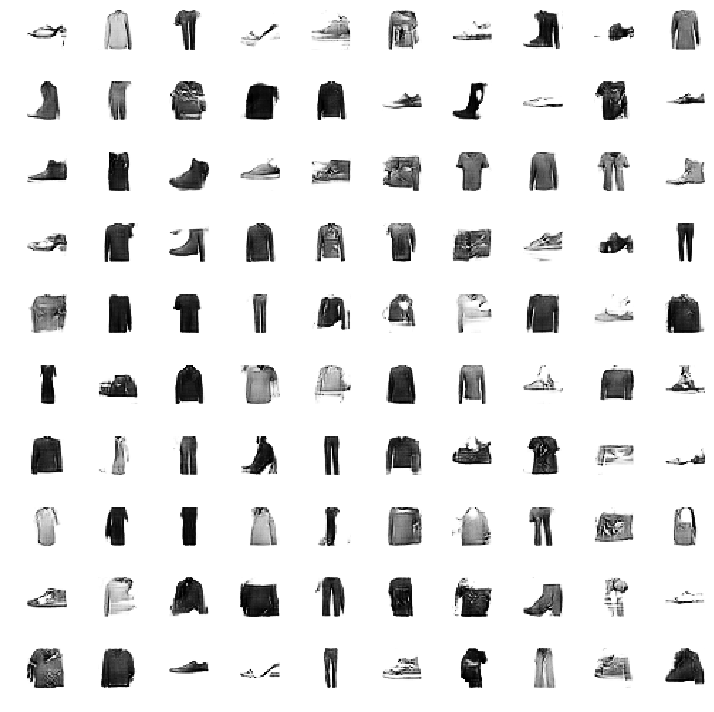

>Saved: wgan_generated_plot_0045.png and wgan_model_0045.h5
>46, 1/468, d1=-399.962, d2=391.704 g=-372.178
>46, 2/468, d1=-404.416, d2=394.943 g=-370.729
>46, 3/468, d1=-401.031, d2=393.567 g=-363.463
>46, 4/468, d1=-403.370, d2=389.670 g=-358.569
>46, 5/468, d1=-403.559, d2=388.983 g=-352.618
>46, 6/468, d1=-401.577, d2=389.068 g=-363.421
>46, 7/468, d1=-404.315, d2=387.438 g=-368.580
>46, 8/468, d1=-396.991, d2=383.722 g=-368.039
>46, 9/468, d1=-406.395, d2=388.005 g=-358.815
>46, 10/468, d1=-401.603, d2=389.823 g=-373.557
>46, 11/468, d1=-398.621, d2=396.391 g=-379.955
>46, 12/468, d1=-397.112, d2=388.147 g=-366.764
>46, 13/468, d1=-406.230, d2=393.622 g=-367.284
>46, 14/468, d1=-394.332, d2=391.884 g=-367.794
>46, 15/468, d1=-405.967, d2=392.310 g=-373.460
>46, 16/468, d1=-404.322, d2=390.130 g=-378.390
>46, 17/468, d1=-400.497, d2=396.598 g=-371.182
>46, 18/468, d1=-402.134, d2=392.517 g=-370.151
>46, 19/468, d1=-396.802, d2=392.461 g=-358.383
>46, 20/468, d1=-398.137, d2=390.996 

>46, 170/468, d1=-401.147, d2=384.476 g=-365.461
>46, 171/468, d1=-393.581, d2=386.381 g=-368.460
>46, 172/468, d1=-398.907, d2=391.077 g=-368.476
>46, 173/468, d1=-397.148, d2=392.429 g=-368.378
>46, 174/468, d1=-401.637, d2=384.278 g=-364.025
>46, 175/468, d1=-395.635, d2=394.031 g=-368.692
>46, 176/468, d1=-401.472, d2=387.117 g=-363.354
>46, 177/468, d1=-392.250, d2=387.627 g=-363.992
>46, 178/468, d1=-394.609, d2=388.504 g=-363.740
>46, 179/468, d1=-400.479, d2=384.821 g=-364.957
>46, 180/468, d1=-395.637, d2=384.957 g=-365.922
>46, 181/468, d1=-394.516, d2=386.304 g=-364.145
>46, 182/468, d1=-399.122, d2=388.288 g=-365.643
>46, 183/468, d1=-397.562, d2=384.831 g=-357.855
>46, 184/468, d1=-392.472, d2=384.521 g=-360.380
>46, 185/468, d1=-389.283, d2=376.952 g=-359.333
>46, 186/468, d1=-388.177, d2=382.322 g=-360.659
>46, 187/468, d1=-393.141, d2=381.572 g=-363.494
>46, 188/468, d1=-393.119, d2=383.740 g=-359.269
>46, 189/468, d1=-396.388, d2=385.378 g=-351.036
>46, 190/468, d1=-39

>46, 338/468, d1=-395.497, d2=382.466 g=-364.079
>46, 339/468, d1=-396.432, d2=377.032 g=-367.238
>46, 340/468, d1=-393.149, d2=381.180 g=-362.919
>46, 341/468, d1=-393.872, d2=380.190 g=-361.556
>46, 342/468, d1=-393.388, d2=379.734 g=-360.120
>46, 343/468, d1=-393.962, d2=381.832 g=-361.883
>46, 344/468, d1=-388.369, d2=382.999 g=-355.955
>46, 345/468, d1=-393.491, d2=381.274 g=-362.793
>46, 346/468, d1=-391.991, d2=382.560 g=-366.587
>46, 347/468, d1=-393.416, d2=379.502 g=-362.717
>46, 348/468, d1=-395.797, d2=386.483 g=-361.176
>46, 349/468, d1=-389.880, d2=377.953 g=-354.880
>46, 350/468, d1=-390.875, d2=378.741 g=-357.902
>46, 351/468, d1=-387.480, d2=378.460 g=-355.590
>46, 352/468, d1=-391.565, d2=376.460 g=-356.178
>46, 353/468, d1=-389.458, d2=380.209 g=-360.355
>46, 354/468, d1=-391.211, d2=380.187 g=-358.221
>46, 355/468, d1=-394.685, d2=385.705 g=-365.997
>46, 356/468, d1=-388.630, d2=382.933 g=-363.605
>46, 357/468, d1=-390.687, d2=382.627 g=-361.536
>46, 358/468, d1=-39

>47, 40/468, d1=-402.677, d2=391.793 g=-368.532
>47, 41/468, d1=-398.935, d2=398.350 g=-375.157
>47, 42/468, d1=-402.961, d2=393.118 g=-378.526
>47, 43/468, d1=-400.526, d2=393.886 g=-382.733
>47, 44/468, d1=-408.659, d2=397.793 g=-382.851
>47, 45/468, d1=-398.378, d2=392.111 g=-367.633
>47, 46/468, d1=-400.406, d2=385.952 g=-371.302
>47, 47/468, d1=-396.202, d2=387.773 g=-365.628
>47, 48/468, d1=-400.995, d2=391.381 g=-369.156
>47, 49/468, d1=-399.115, d2=389.851 g=-361.481
>47, 50/468, d1=-402.119, d2=390.275 g=-366.706
>47, 51/468, d1=-395.305, d2=390.922 g=-369.174
>47, 52/468, d1=-398.839, d2=386.261 g=-371.256
>47, 53/468, d1=-398.647, d2=386.527 g=-358.924
>47, 54/468, d1=-399.223, d2=381.234 g=-365.843
>47, 55/468, d1=-393.293, d2=392.988 g=-365.370
>47, 56/468, d1=-397.520, d2=387.571 g=-365.322
>47, 57/468, d1=-400.065, d2=386.503 g=-365.770
>47, 58/468, d1=-396.707, d2=387.499 g=-366.985
>47, 59/468, d1=-395.930, d2=389.849 g=-363.836
>47, 60/468, d1=-394.757, d2=386.033 g=-

>47, 211/468, d1=-387.704, d2=372.949 g=-351.350
>47, 212/468, d1=-385.985, d2=373.249 g=-344.031
>47, 213/468, d1=-388.964, d2=368.934 g=-347.682
>47, 214/468, d1=-389.029, d2=378.901 g=-342.297
>47, 215/468, d1=-383.839, d2=377.294 g=-350.150
>47, 216/468, d1=-382.747, d2=376.281 g=-356.016
>47, 217/468, d1=-383.378, d2=374.938 g=-352.532
>47, 218/468, d1=-391.981, d2=377.325 g=-354.739
>47, 219/468, d1=-392.274, d2=377.209 g=-359.889
>47, 220/468, d1=-396.897, d2=385.182 g=-363.514
>47, 221/468, d1=-392.727, d2=380.577 g=-366.138
>47, 222/468, d1=-390.982, d2=377.449 g=-354.402
>47, 223/468, d1=-381.183, d2=373.180 g=-346.014
>47, 224/468, d1=-387.107, d2=374.328 g=-349.227
>47, 225/468, d1=-394.608, d2=374.974 g=-358.136
>47, 226/468, d1=-388.166, d2=375.074 g=-353.086
>47, 227/468, d1=-390.106, d2=374.141 g=-351.667
>47, 228/468, d1=-384.619, d2=375.732 g=-364.445
>47, 229/468, d1=-392.105, d2=379.579 g=-364.297
>47, 230/468, d1=-392.905, d2=369.788 g=-364.632
>47, 231/468, d1=-38

>47, 379/468, d1=-401.097, d2=392.938 g=-362.341
>47, 380/468, d1=-399.595, d2=393.258 g=-368.146
>47, 381/468, d1=-401.480, d2=386.099 g=-356.810
>47, 382/468, d1=-397.525, d2=393.520 g=-357.821
>47, 383/468, d1=-395.044, d2=390.516 g=-363.537
>47, 384/468, d1=-405.340, d2=386.372 g=-359.207
>47, 385/468, d1=-402.766, d2=383.618 g=-363.371
>47, 386/468, d1=-396.237, d2=385.198 g=-366.728
>47, 387/468, d1=-403.365, d2=391.412 g=-380.722
>47, 388/468, d1=-399.511, d2=388.507 g=-369.800
>47, 389/468, d1=-394.934, d2=384.179 g=-372.096
>47, 390/468, d1=-398.096, d2=386.139 g=-366.191
>47, 391/468, d1=-393.103, d2=383.030 g=-352.256
>47, 392/468, d1=-396.404, d2=377.957 g=-362.722
>47, 393/468, d1=-396.647, d2=387.711 g=-356.878
>47, 394/468, d1=-399.193, d2=383.997 g=-354.812
>47, 395/468, d1=-394.914, d2=383.485 g=-359.232
>47, 396/468, d1=-388.121, d2=386.549 g=-357.480
>47, 397/468, d1=-396.434, d2=379.539 g=-358.262
>47, 398/468, d1=-395.526, d2=377.208 g=-362.360
>47, 399/468, d1=-39

>48, 82/468, d1=-400.948, d2=387.471 g=-366.175
>48, 83/468, d1=-405.675, d2=392.586 g=-355.752
>48, 84/468, d1=-400.420, d2=392.383 g=-348.977
>48, 85/468, d1=-414.766, d2=395.820 g=-352.061
>48, 86/468, d1=-406.623, d2=392.261 g=-363.982
>48, 87/468, d1=-407.859, d2=393.285 g=-373.702
>48, 88/468, d1=-403.838, d2=394.122 g=-378.205
>48, 89/468, d1=-409.828, d2=398.897 g=-369.466
>48, 90/468, d1=-402.918, d2=394.549 g=-370.556
>48, 91/468, d1=-403.362, d2=388.448 g=-379.568
>48, 92/468, d1=-402.356, d2=391.959 g=-385.278
>48, 93/468, d1=-395.249, d2=394.349 g=-377.674
>48, 94/468, d1=-407.359, d2=399.653 g=-374.885
>48, 95/468, d1=-400.380, d2=393.859 g=-367.756
>48, 96/468, d1=-402.525, d2=394.520 g=-373.035
>48, 97/468, d1=-403.489, d2=387.883 g=-357.304
>48, 98/468, d1=-396.344, d2=390.982 g=-367.011
>48, 99/468, d1=-400.135, d2=391.550 g=-366.703
>48, 100/468, d1=-402.199, d2=385.600 g=-369.041
>48, 101/468, d1=-396.568, d2=389.916 g=-368.742
>48, 102/468, d1=-395.699, d2=389.885 

>48, 250/468, d1=-400.475, d2=388.294 g=-364.298
>48, 251/468, d1=-400.530, d2=392.275 g=-367.760
>48, 252/468, d1=-400.890, d2=383.871 g=-369.416
>48, 253/468, d1=-408.054, d2=394.556 g=-366.973
>48, 254/468, d1=-404.549, d2=391.757 g=-375.796
>48, 255/468, d1=-405.090, d2=398.064 g=-380.380
>48, 256/468, d1=-402.828, d2=387.962 g=-378.130
>48, 257/468, d1=-403.702, d2=390.639 g=-371.189
>48, 258/468, d1=-399.669, d2=394.633 g=-363.211
>48, 259/468, d1=-398.762, d2=390.837 g=-373.573
>48, 260/468, d1=-407.865, d2=390.385 g=-372.608
>48, 261/468, d1=-394.277, d2=395.121 g=-369.106
>48, 262/468, d1=-406.980, d2=392.994 g=-363.178
>48, 263/468, d1=-403.233, d2=392.464 g=-376.473
>48, 264/468, d1=-403.363, d2=393.629 g=-374.122
>48, 265/468, d1=-405.590, d2=393.738 g=-370.851
>48, 266/468, d1=-401.733, d2=390.981 g=-372.054
>48, 267/468, d1=-403.894, d2=392.381 g=-377.626
>48, 268/468, d1=-402.533, d2=396.800 g=-375.364
>48, 269/468, d1=-402.102, d2=397.642 g=-369.942
>48, 270/468, d1=-40

>48, 418/468, d1=-419.942, d2=409.986 g=-376.518
>48, 419/468, d1=-419.668, d2=406.896 g=-370.845
>48, 420/468, d1=-414.801, d2=407.152 g=-369.627
>48, 421/468, d1=-410.845, d2=408.070 g=-369.376
>48, 422/468, d1=-414.966, d2=403.761 g=-368.263
>48, 423/468, d1=-406.131, d2=398.753 g=-371.696
>48, 424/468, d1=-409.786, d2=391.464 g=-373.656
>48, 425/468, d1=-405.760, d2=401.334 g=-381.105
>48, 426/468, d1=-406.174, d2=400.426 g=-380.206
>48, 427/468, d1=-411.698, d2=399.559 g=-379.869
>48, 428/468, d1=-414.280, d2=394.201 g=-377.348
>48, 429/468, d1=-412.846, d2=397.124 g=-382.791
>48, 430/468, d1=-412.174, d2=397.163 g=-369.823
>48, 431/468, d1=-406.084, d2=401.468 g=-374.413
>48, 432/468, d1=-406.728, d2=393.835 g=-379.279
>48, 433/468, d1=-406.468, d2=399.293 g=-376.470
>48, 434/468, d1=-407.732, d2=398.347 g=-375.186
>48, 435/468, d1=-405.477, d2=397.327 g=-373.335
>48, 436/468, d1=-405.104, d2=398.411 g=-369.473
>48, 437/468, d1=-407.308, d2=393.344 g=-370.813
>48, 438/468, d1=-40

>49, 121/468, d1=-403.334, d2=392.854 g=-373.125
>49, 122/468, d1=-398.124, d2=391.875 g=-371.792
>49, 123/468, d1=-398.927, d2=388.982 g=-369.069
>49, 124/468, d1=-397.410, d2=387.727 g=-366.801
>49, 125/468, d1=-396.913, d2=389.108 g=-360.499
>49, 126/468, d1=-401.408, d2=386.301 g=-364.910
>49, 127/468, d1=-400.906, d2=388.759 g=-370.841
>49, 128/468, d1=-404.046, d2=391.779 g=-360.782
>49, 129/468, d1=-403.761, d2=390.923 g=-374.358
>49, 130/468, d1=-406.236, d2=397.460 g=-381.202
>49, 131/468, d1=-402.959, d2=393.807 g=-373.192
>49, 132/468, d1=-404.906, d2=396.512 g=-374.426
>49, 133/468, d1=-400.630, d2=394.183 g=-370.801
>49, 134/468, d1=-401.011, d2=391.339 g=-372.734
>49, 135/468, d1=-402.784, d2=393.162 g=-370.371
>49, 136/468, d1=-406.762, d2=395.732 g=-374.174
>49, 137/468, d1=-405.829, d2=391.430 g=-375.169
>49, 138/468, d1=-400.525, d2=396.552 g=-372.810
>49, 139/468, d1=-401.136, d2=393.069 g=-376.692
>49, 140/468, d1=-406.574, d2=398.748 g=-372.790
>49, 141/468, d1=-40

>49, 289/468, d1=-401.976, d2=394.656 g=-372.432
>49, 290/468, d1=-401.363, d2=392.039 g=-367.993
>49, 291/468, d1=-401.669, d2=391.961 g=-371.597
>49, 292/468, d1=-406.099, d2=389.662 g=-373.910
>49, 293/468, d1=-404.415, d2=395.754 g=-370.282
>49, 294/468, d1=-396.824, d2=392.099 g=-375.530
>49, 295/468, d1=-402.492, d2=394.038 g=-363.221
>49, 296/468, d1=-399.038, d2=385.994 g=-361.792
>49, 297/468, d1=-406.702, d2=391.238 g=-368.582
>49, 298/468, d1=-395.845, d2=393.262 g=-368.932
>49, 299/468, d1=-397.313, d2=388.086 g=-369.909
>49, 300/468, d1=-400.827, d2=388.333 g=-366.454
>49, 301/468, d1=-394.833, d2=385.605 g=-365.262
>49, 302/468, d1=-398.938, d2=387.843 g=-365.245
>49, 303/468, d1=-400.005, d2=386.127 g=-368.510
>49, 304/468, d1=-394.070, d2=387.545 g=-365.109
>49, 305/468, d1=-395.619, d2=387.847 g=-365.191
>49, 306/468, d1=-405.332, d2=387.176 g=-365.309
>49, 307/468, d1=-399.025, d2=390.304 g=-366.756
>49, 308/468, d1=-403.057, d2=397.498 g=-371.360
>49, 309/468, d1=-40

>49, 457/468, d1=-395.076, d2=393.821 g=-373.091
>49, 458/468, d1=-404.562, d2=387.083 g=-368.220
>49, 459/468, d1=-394.012, d2=385.390 g=-364.269
>49, 460/468, d1=-408.981, d2=392.291 g=-360.811
>49, 461/468, d1=-400.884, d2=391.236 g=-367.933
>49, 462/468, d1=-401.748, d2=395.734 g=-361.594
>49, 463/468, d1=-397.680, d2=391.492 g=-367.655
>49, 464/468, d1=-398.475, d2=387.434 g=-367.679
>49, 465/468, d1=-400.309, d2=384.877 g=-366.147
>49, 466/468, d1=-401.502, d2=395.407 g=-368.048
>49, 467/468, d1=-400.384, d2=388.063 g=-370.465
>49, 468/468, d1=-407.699, d2=394.422 g=-371.389
>50, 1/468, d1=-404.022, d2=394.747 g=-374.753
>50, 2/468, d1=-406.590, d2=394.892 g=-372.079
>50, 3/468, d1=-401.734, d2=393.010 g=-368.568
>50, 4/468, d1=-403.852, d2=392.219 g=-379.575
>50, 5/468, d1=-403.224, d2=392.206 g=-384.539
>50, 6/468, d1=-400.342, d2=393.841 g=-379.180
>50, 7/468, d1=-404.666, d2=392.471 g=-375.949
>50, 8/468, d1=-401.359, d2=392.326 g=-377.048
>50, 9/468, d1=-405.743, d2=389.966 

>50, 160/468, d1=-409.299, d2=398.022 g=-386.775
>50, 161/468, d1=-417.195, d2=393.676 g=-395.768
>50, 162/468, d1=-410.471, d2=398.604 g=-385.141
>50, 163/468, d1=-408.911, d2=393.258 g=-390.982
>50, 164/468, d1=-400.749, d2=393.327 g=-388.459
>50, 165/468, d1=-399.624, d2=396.049 g=-367.307
>50, 166/468, d1=-400.392, d2=390.697 g=-364.451
>50, 167/468, d1=-399.764, d2=387.006 g=-353.593
>50, 168/468, d1=-402.241, d2=391.394 g=-359.354
>50, 169/468, d1=-403.383, d2=391.838 g=-359.376
>50, 170/468, d1=-405.122, d2=389.318 g=-364.921
>50, 171/468, d1=-404.108, d2=388.593 g=-374.128
>50, 172/468, d1=-409.986, d2=393.375 g=-383.383
>50, 173/468, d1=-400.669, d2=396.607 g=-379.366
>50, 174/468, d1=-405.775, d2=404.223 g=-376.251
>50, 175/468, d1=-413.540, d2=407.143 g=-370.519
>50, 176/468, d1=-409.964, d2=402.948 g=-379.980
>50, 177/468, d1=-411.873, d2=402.379 g=-378.983
>50, 178/468, d1=-411.584, d2=400.111 g=-383.114
>50, 179/468, d1=-408.944, d2=402.247 g=-361.214
>50, 180/468, d1=-40

>50, 328/468, d1=-409.563, d2=399.352 g=-364.252
>50, 329/468, d1=-403.387, d2=392.819 g=-365.861
>50, 330/468, d1=-398.031, d2=396.732 g=-369.815
>50, 331/468, d1=-404.882, d2=399.047 g=-366.729
>50, 332/468, d1=-407.609, d2=392.140 g=-374.949
>50, 333/468, d1=-407.672, d2=402.053 g=-379.523
>50, 334/468, d1=-408.047, d2=401.398 g=-372.808
>50, 335/468, d1=-413.758, d2=395.220 g=-374.024
>50, 336/468, d1=-414.261, d2=398.278 g=-373.511
>50, 337/468, d1=-401.324, d2=390.757 g=-373.807
>50, 338/468, d1=-405.972, d2=386.048 g=-382.691
>50, 339/468, d1=-401.454, d2=386.079 g=-393.465
>50, 340/468, d1=-396.012, d2=393.706 g=-388.829
>50, 341/468, d1=-405.764, d2=391.575 g=-389.795
>50, 342/468, d1=-406.839, d2=390.727 g=-386.925
>50, 343/468, d1=-416.054, d2=392.458 g=-377.414
>50, 344/468, d1=-412.074, d2=400.135 g=-370.331
>50, 345/468, d1=-407.851, d2=401.444 g=-373.903
>50, 346/468, d1=-420.822, d2=399.640 g=-386.273
>50, 347/468, d1=-417.149, d2=411.329 g=-375.938
>50, 348/468, d1=-41

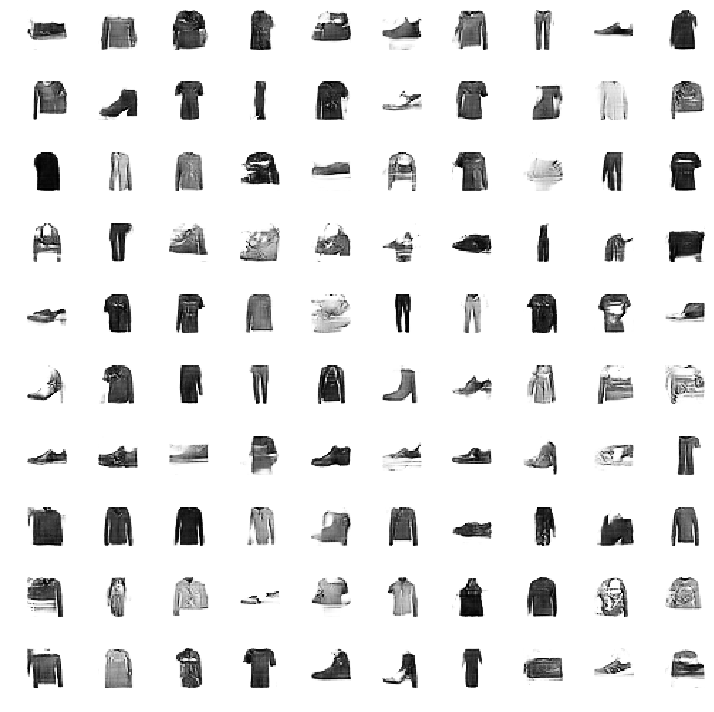

>Saved: wgan_generated_plot_0050.png and wgan_model_0050.h5


In [29]:
# train model
fashion_wgan.train(X, n_epochs=50, reporting_period=5)

Plot metrics out. The Wasserstein loss seeks scores for real and fake that are more different during training.

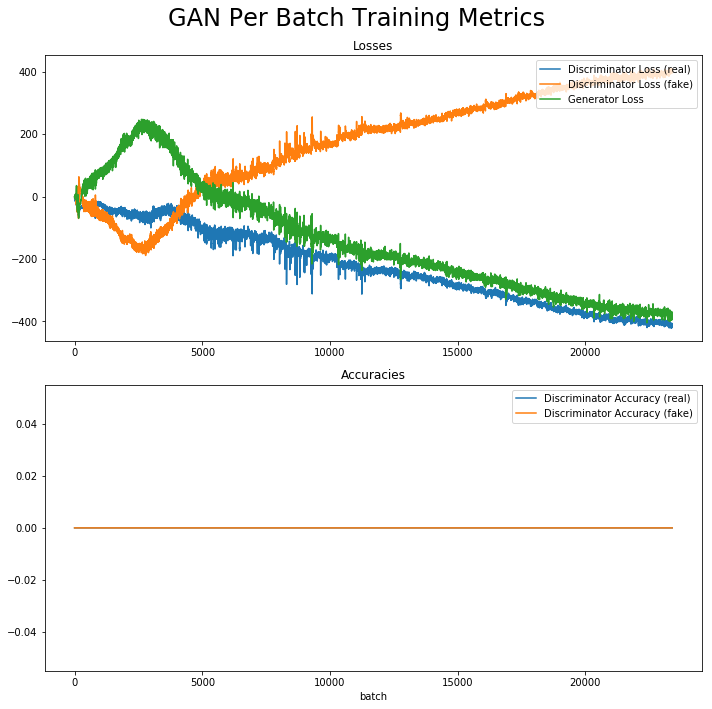

In [30]:
fashion_wgan.plot_training_metrics()

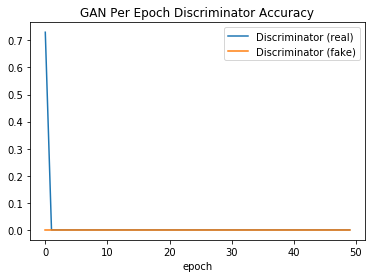

In [31]:
fashion_wgan.plot_discriminator_accuracies()